In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import imageio
from tqdm import tqdm_notebook

In [2]:
u = 1
chi = 1 / 2
dx = 0.1
dt = (dx ** 2) / (1.1 * (dx + 1))

s = u * dt / dx
r = chi * dt / (dx ** 2)

dt

0.008264462809917356

In [3]:
teta = 5
a = 0
b = 10

In [4]:
K = int((b - a) / dx) + 1
K

101

In [5]:
prev = np.zeros(K, dtype=np.float64)
for i in range(K // 2):
    prev[i] = 1.0

In [6]:
def left_border(t):
    return math.sqrt(t)

def right_border(t):
    return math.exp(-(t ** 2))

In [7]:
t = 0

Ts = []
Ts.append(prev)

while (t < teta):
    t += dt
    cur = np.zeros(K, dtype=np.float64)
    
    for i in range(K):
        prev_t = prev[i - 1] if i > 0 else left_border(t)
        next_t = prev[i + 1] if i < K - 1 else right_border(t)
        cur_t = prev[i]
        
        cur[i] = cur_t - s * (cur_t - prev_t) + r * (prev_t + next_t - 2 * cur_t)
    
    Ts.append(cur)
    prev = cur

/anaconda3/envs/computational_methods/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


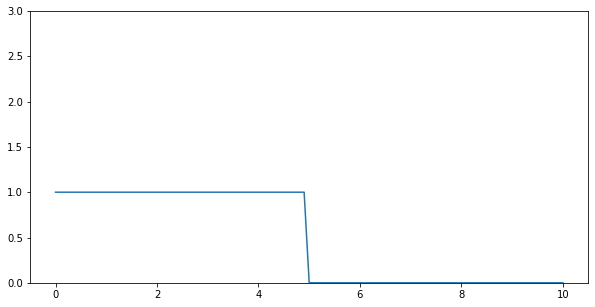

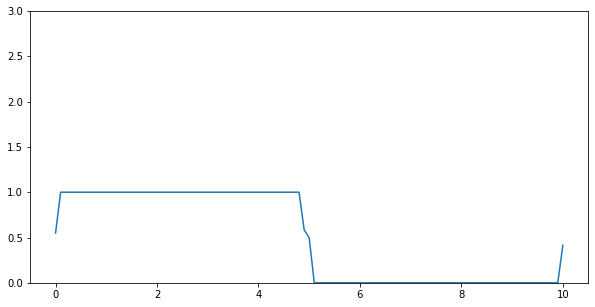

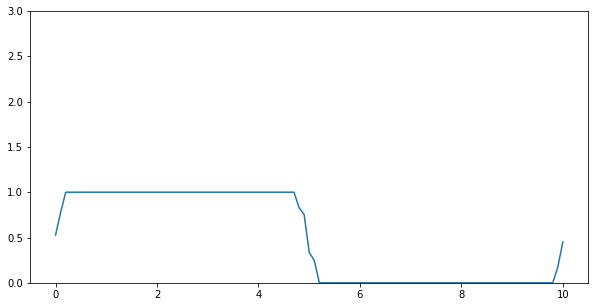

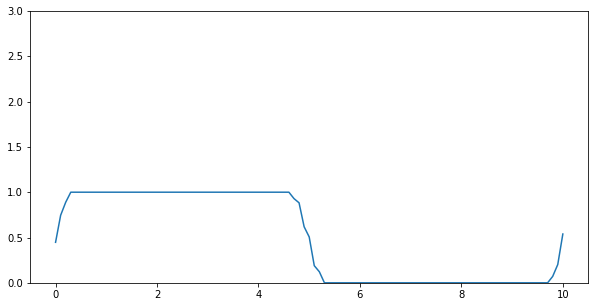

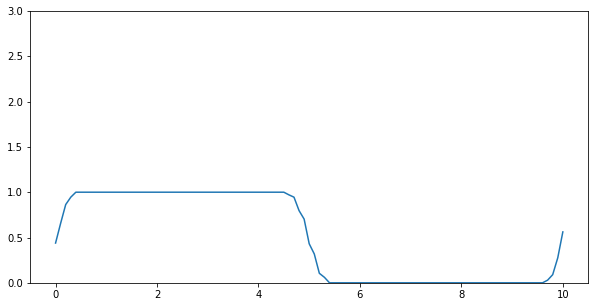

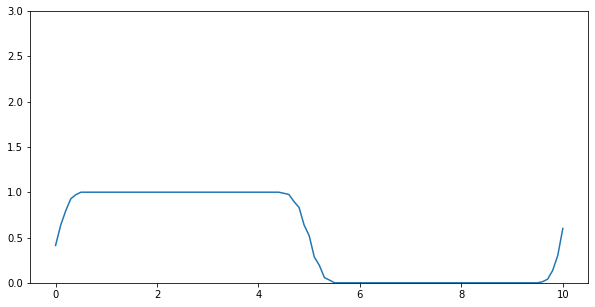

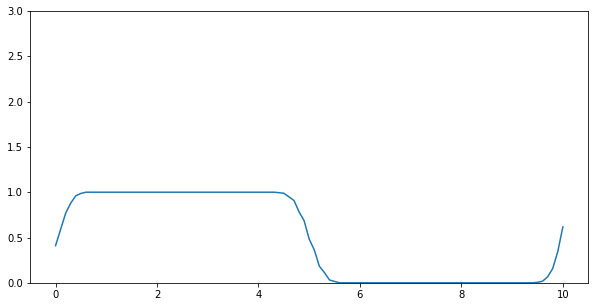

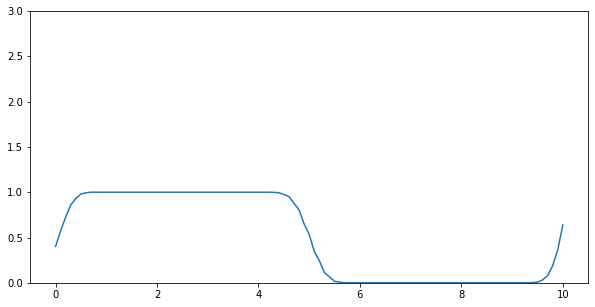

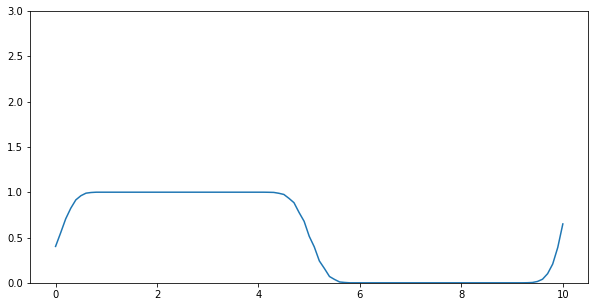

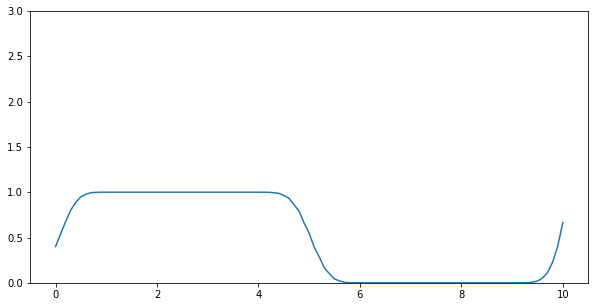

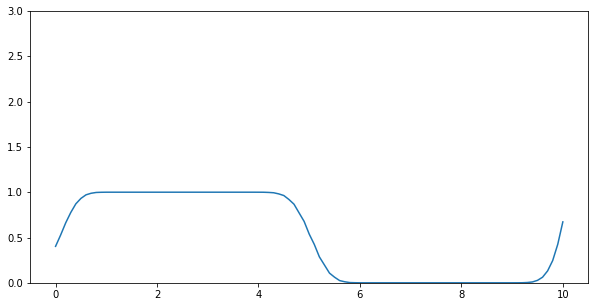

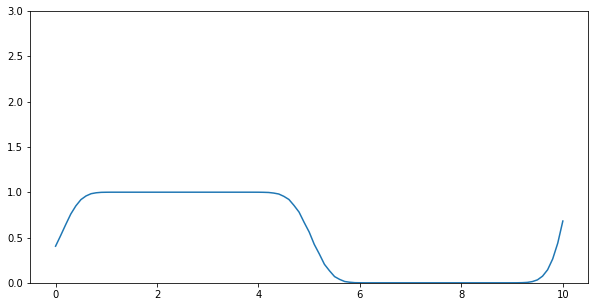

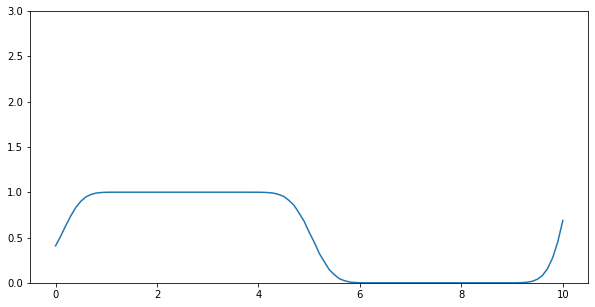

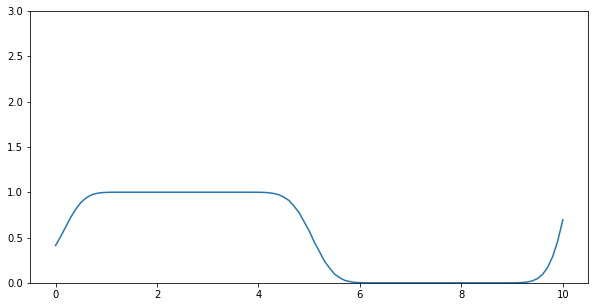

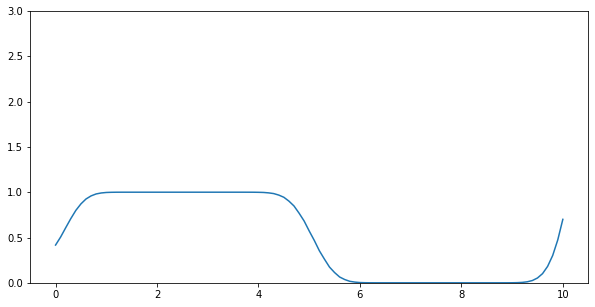

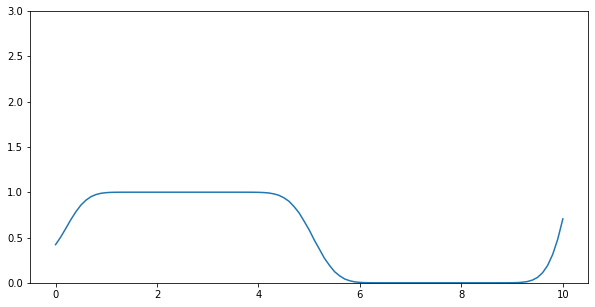

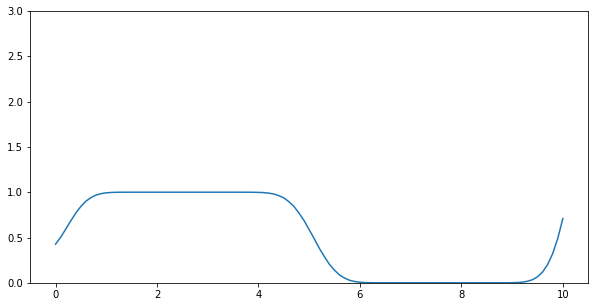

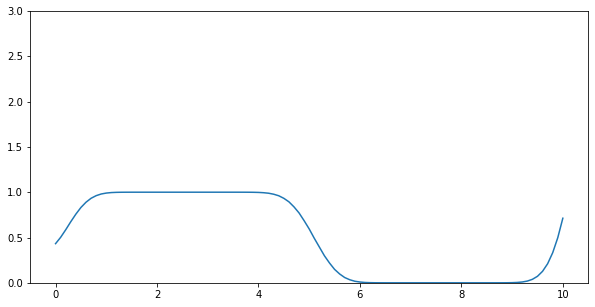

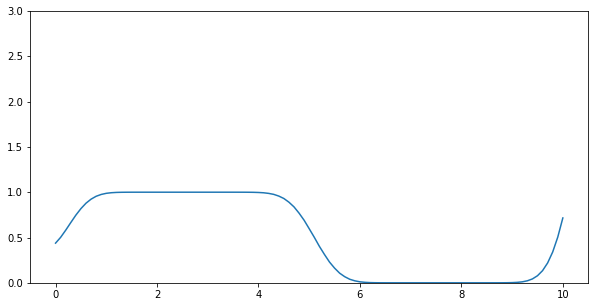

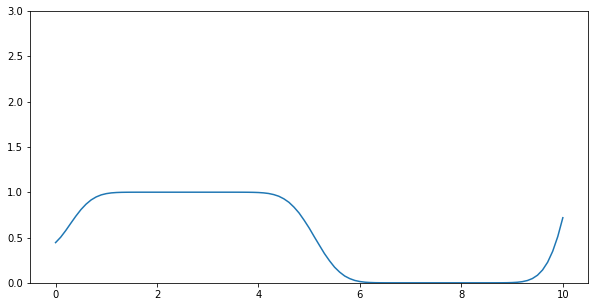

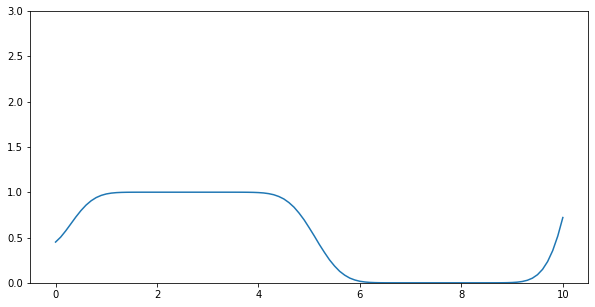

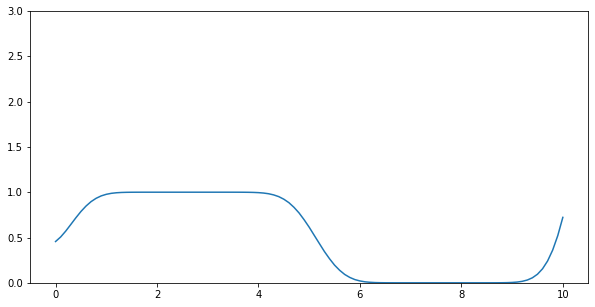

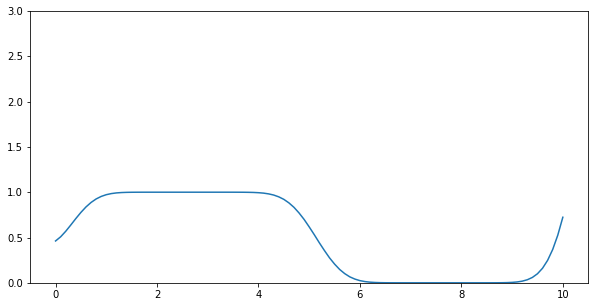

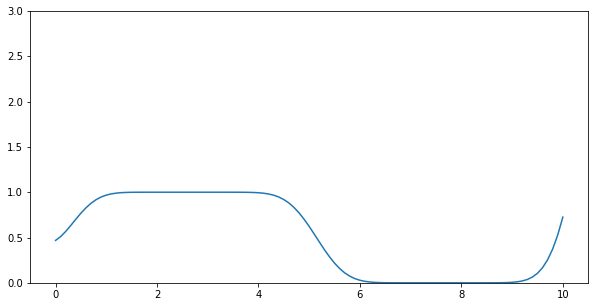

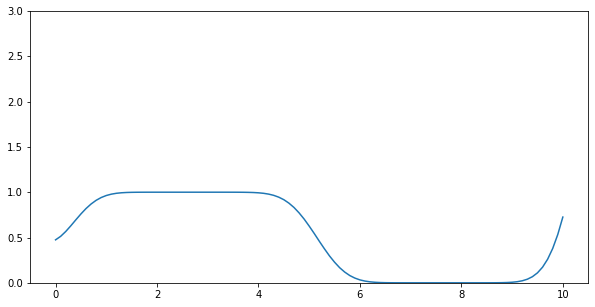

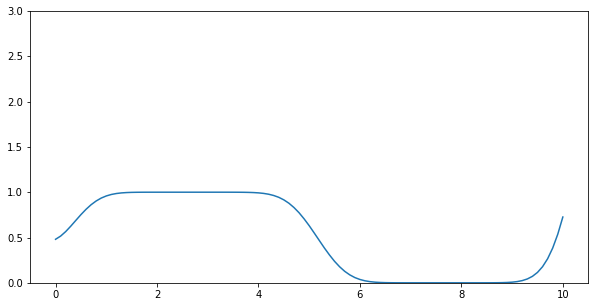

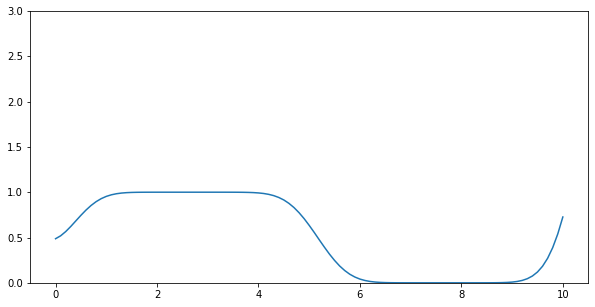

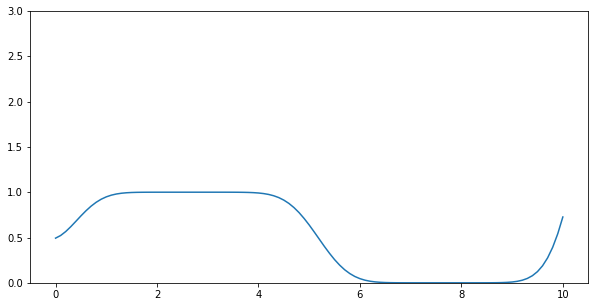

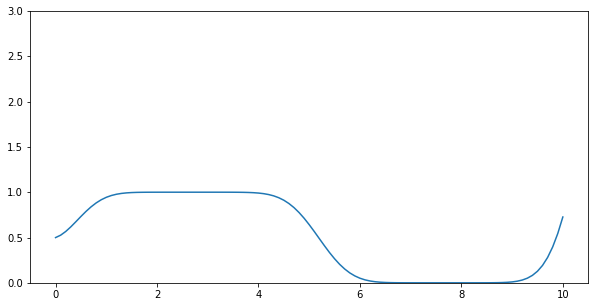

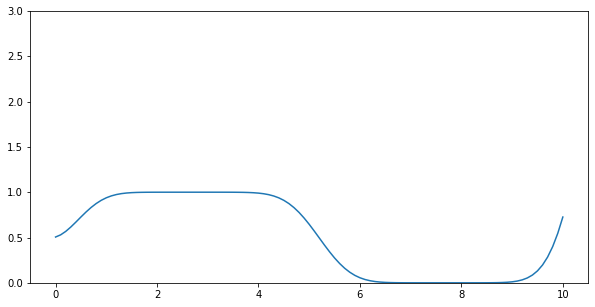

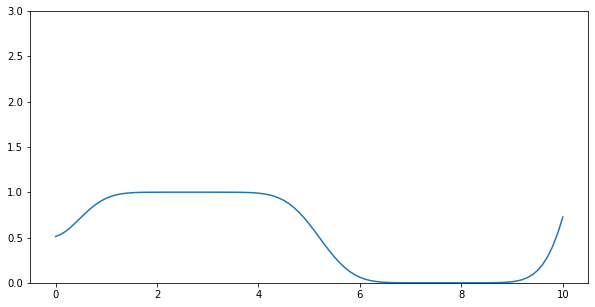

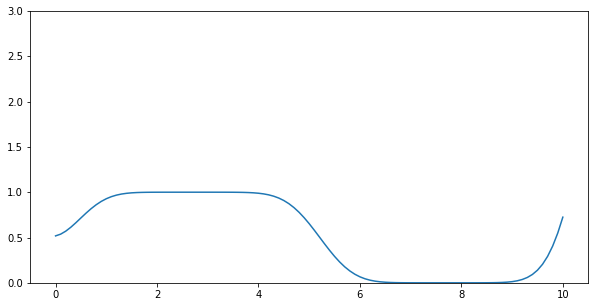

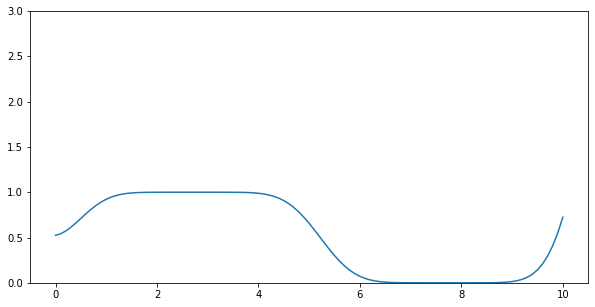

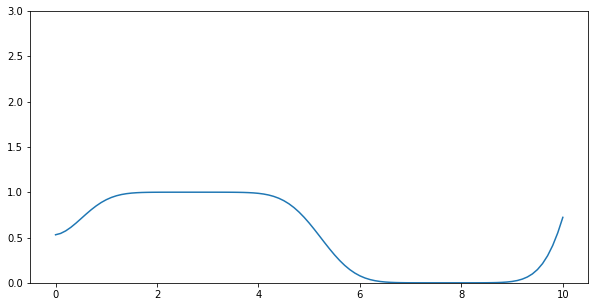

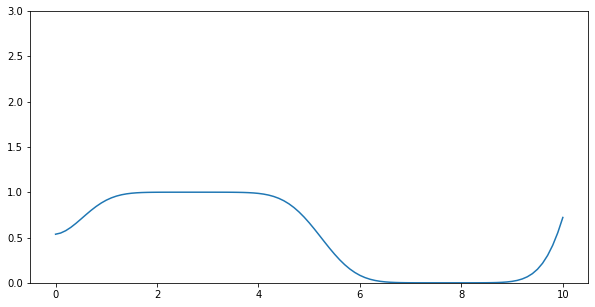

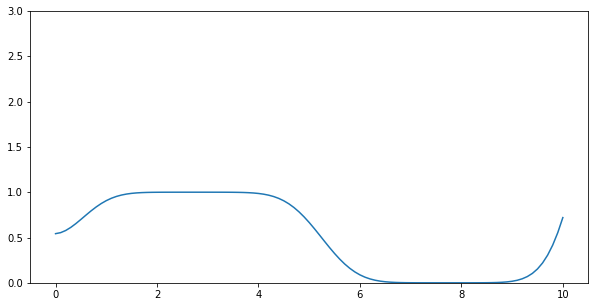

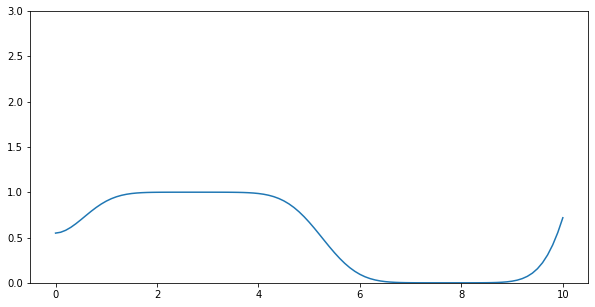

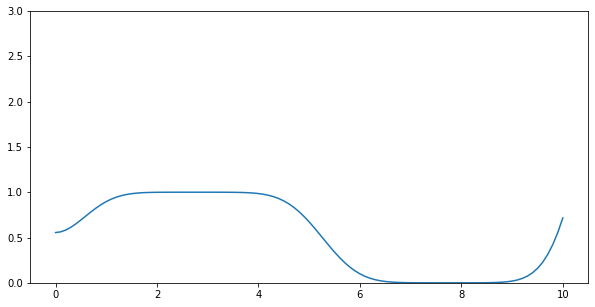

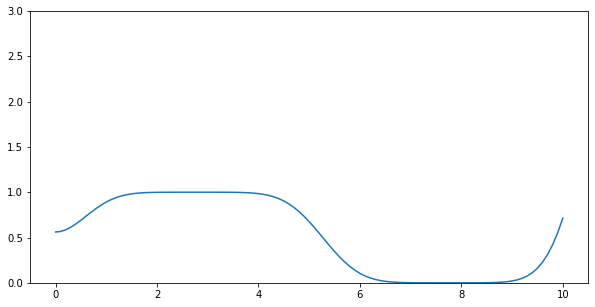

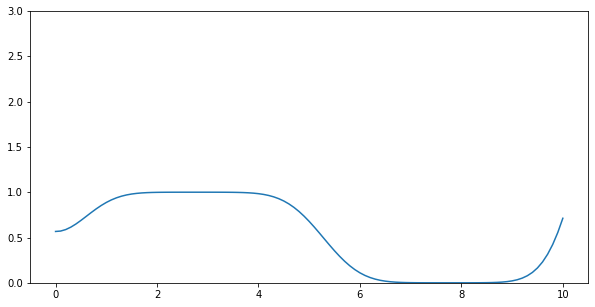

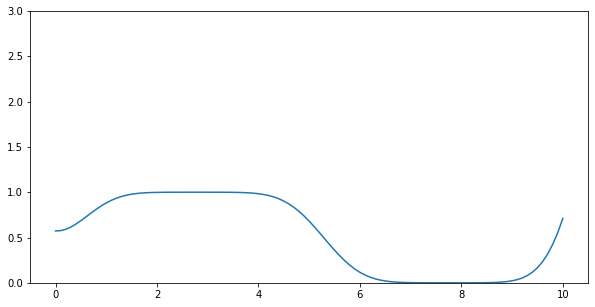

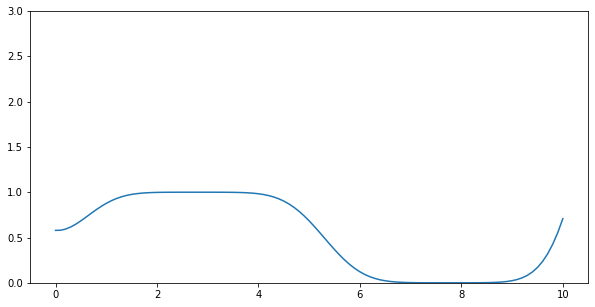

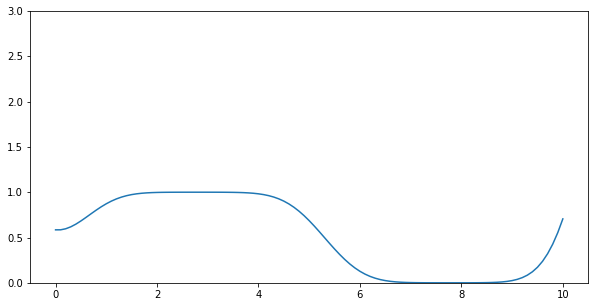

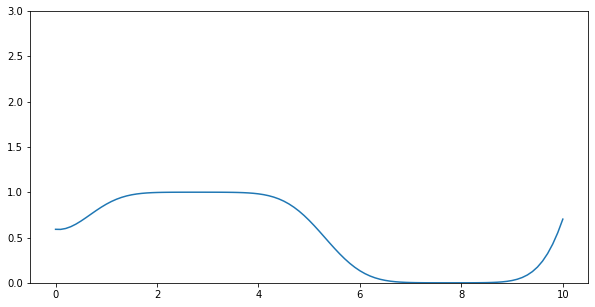

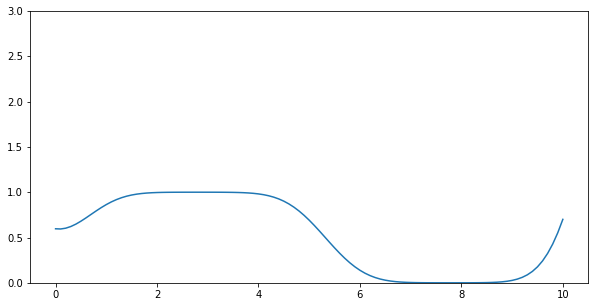

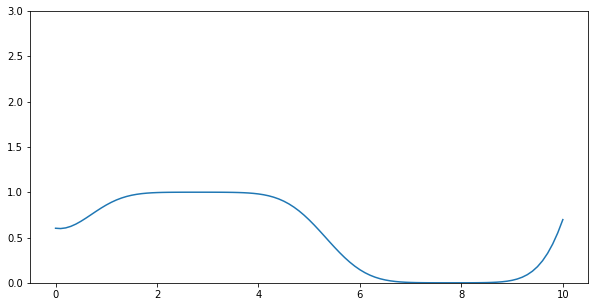

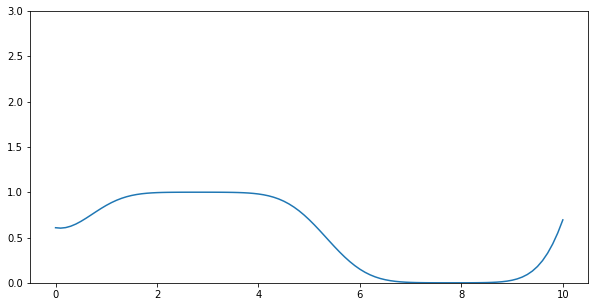

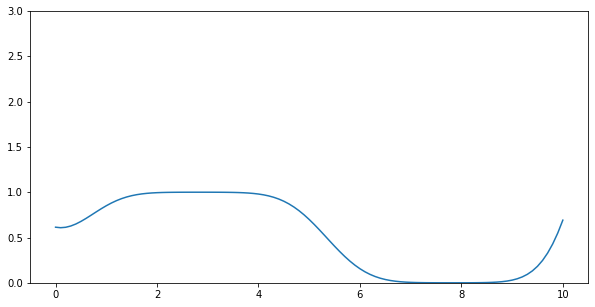

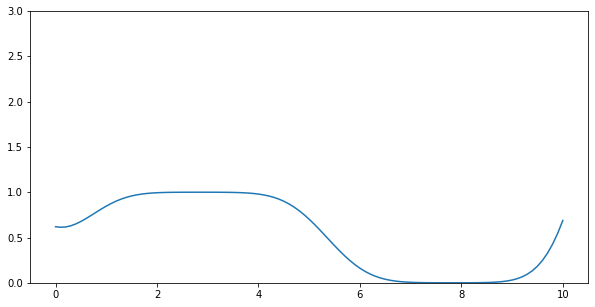

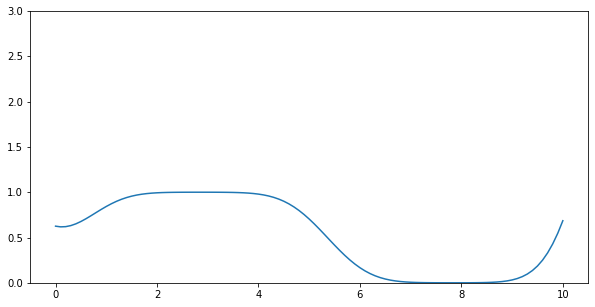

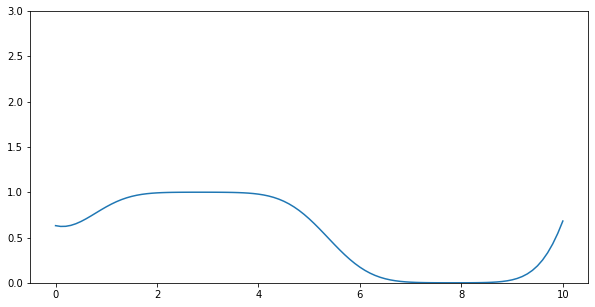

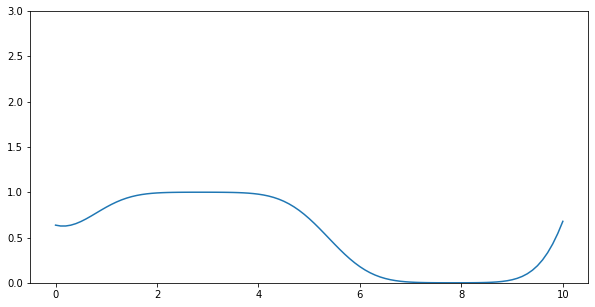

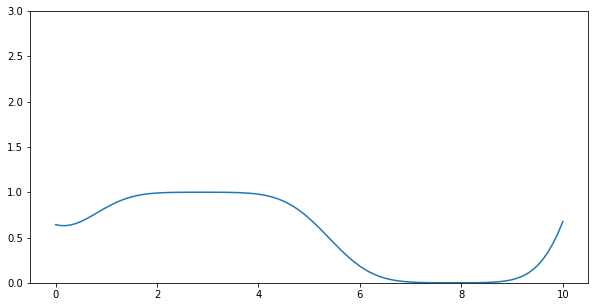

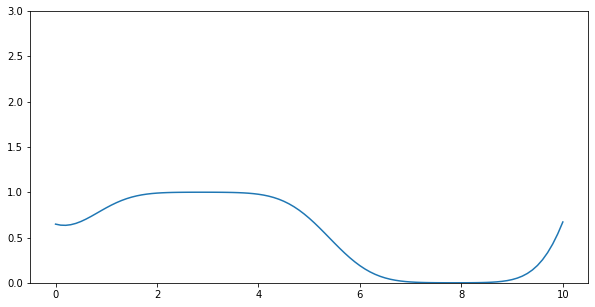

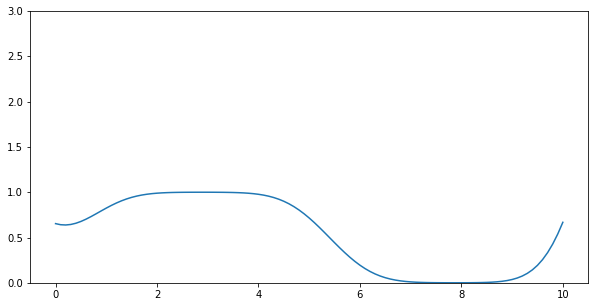

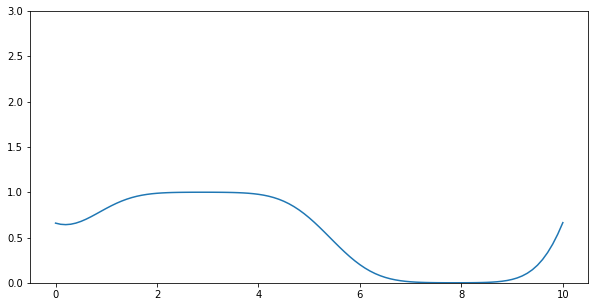

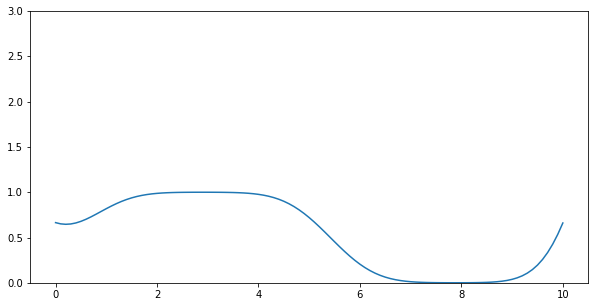

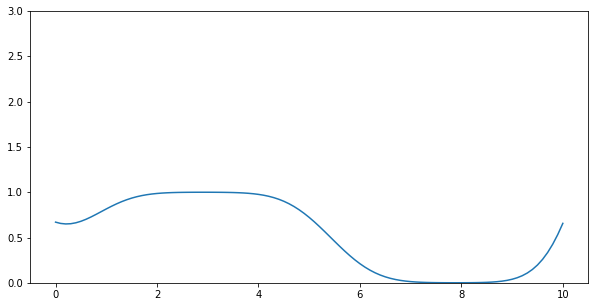

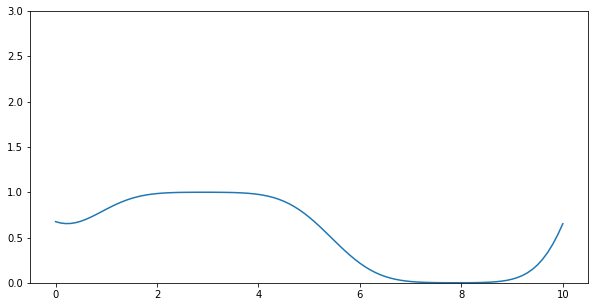

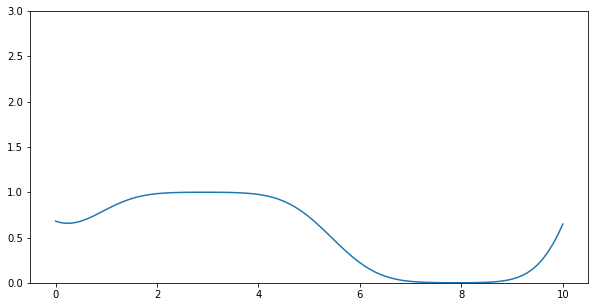

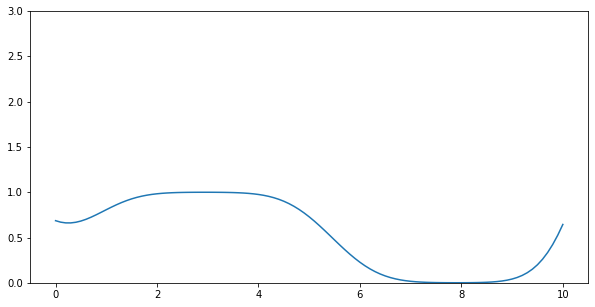

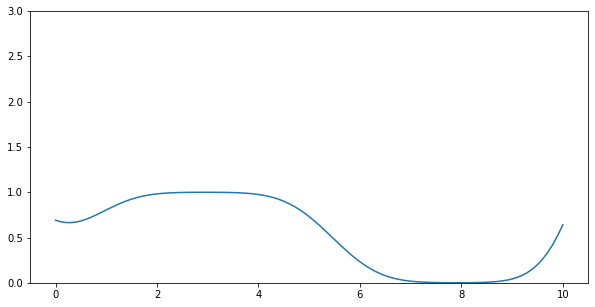

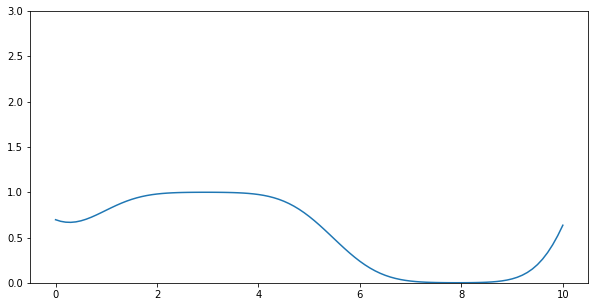

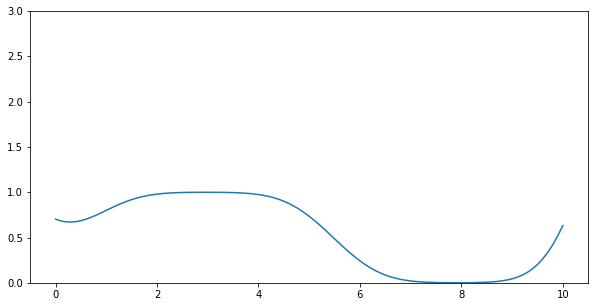

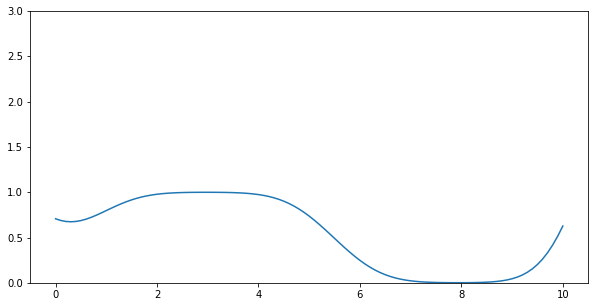

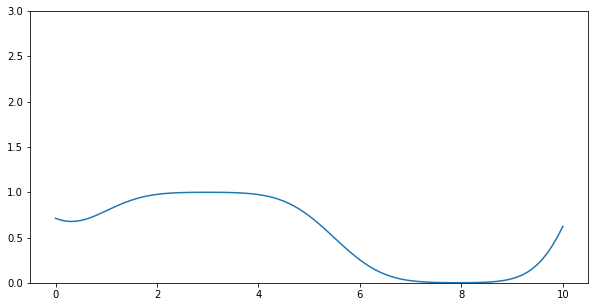

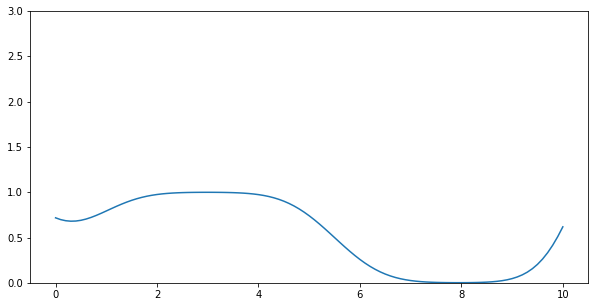

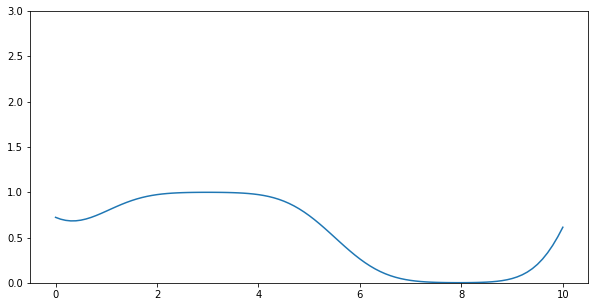

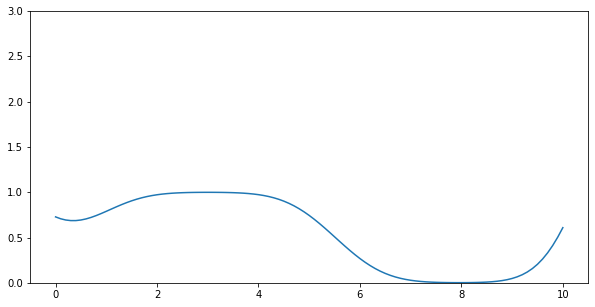

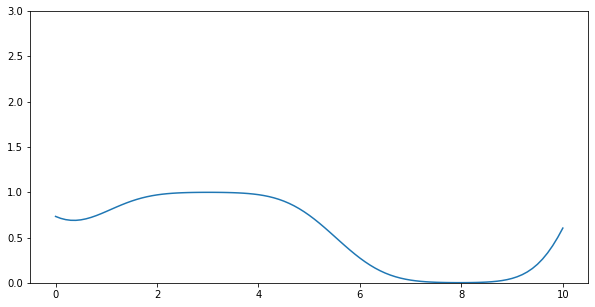

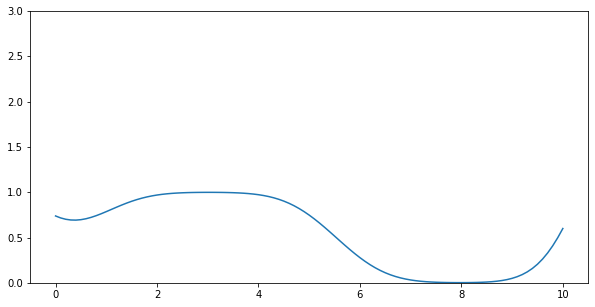

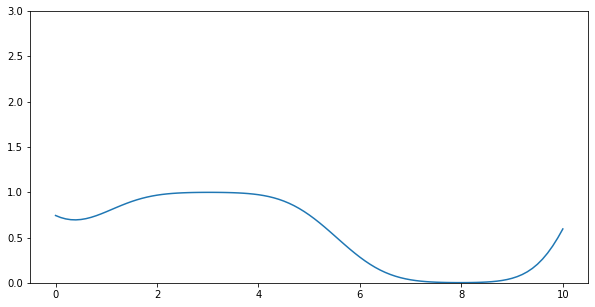

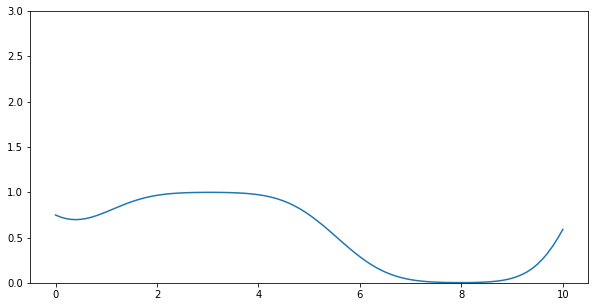

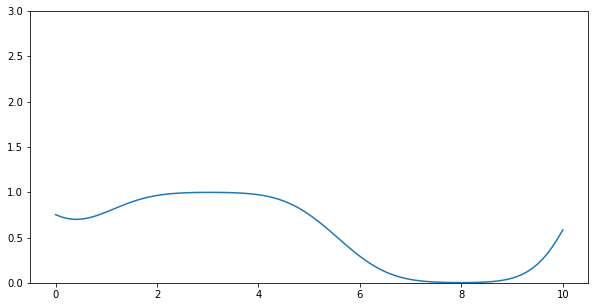

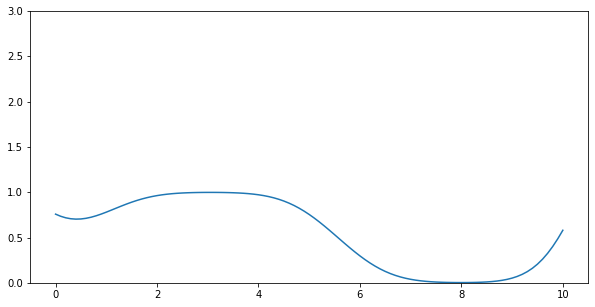

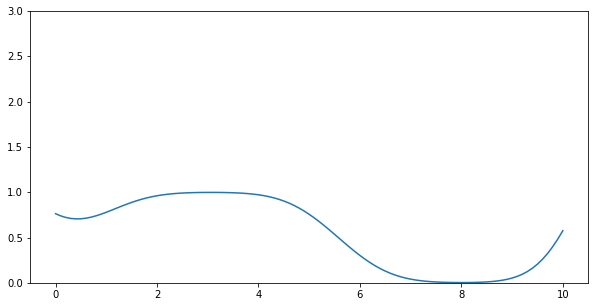

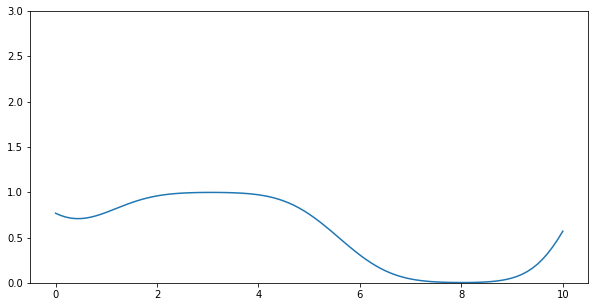

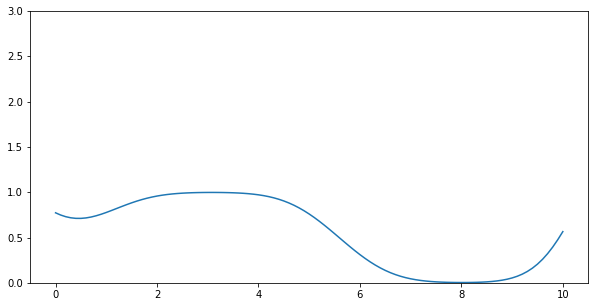

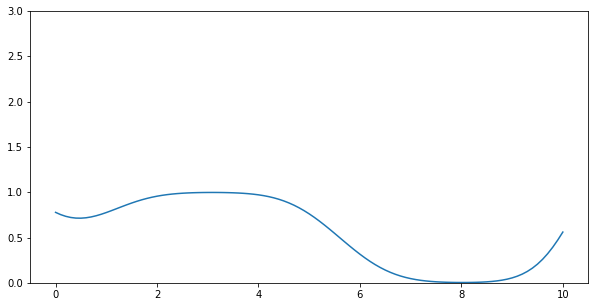

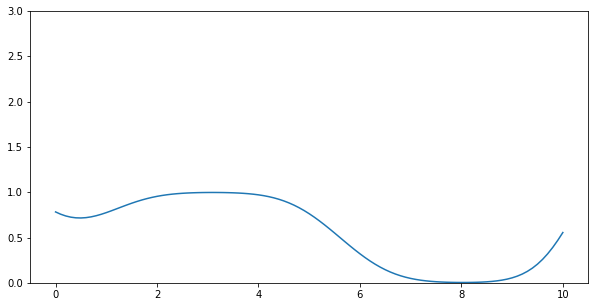

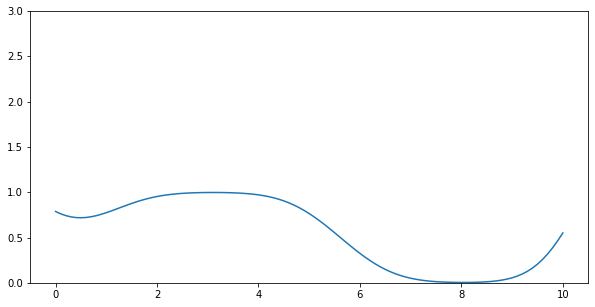

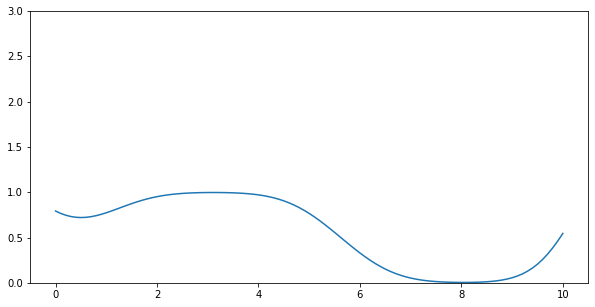

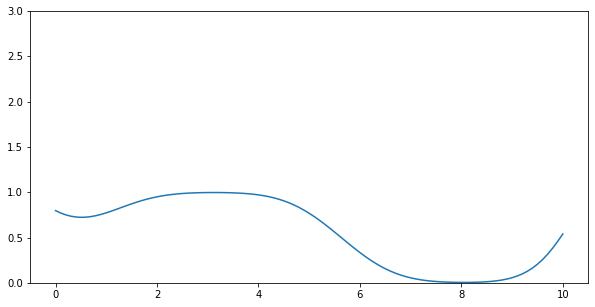

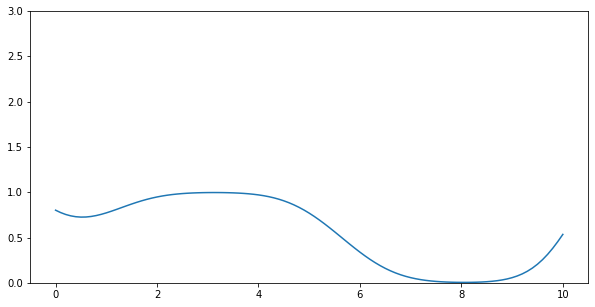

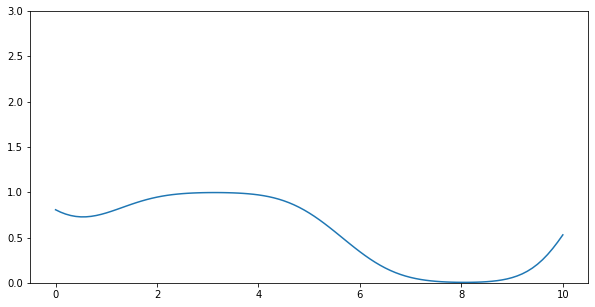

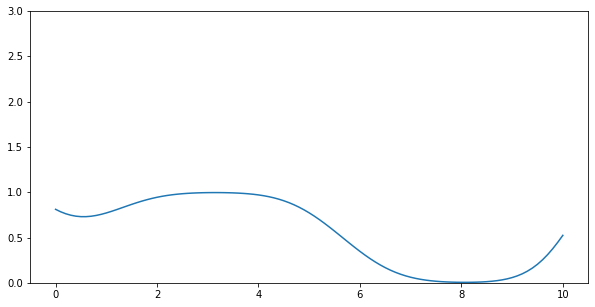

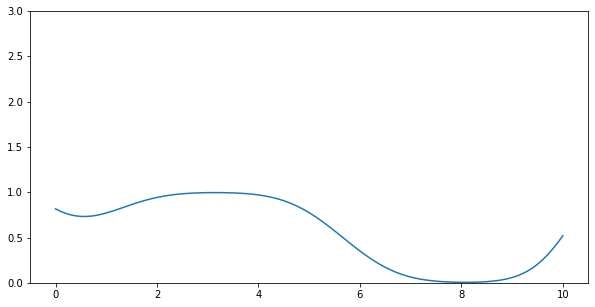

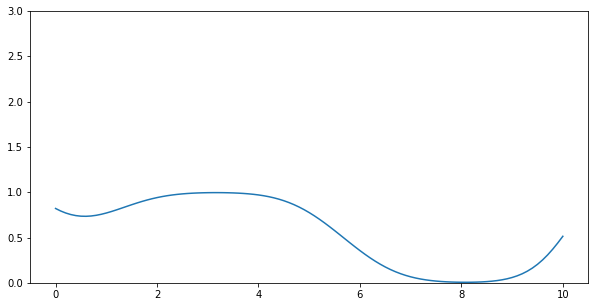

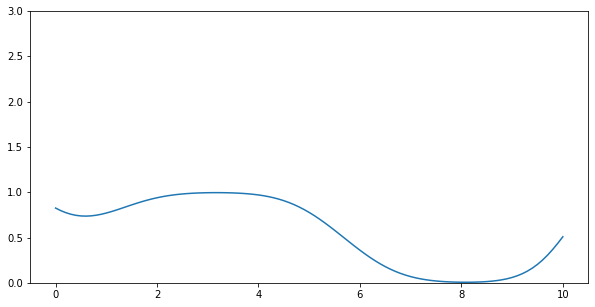

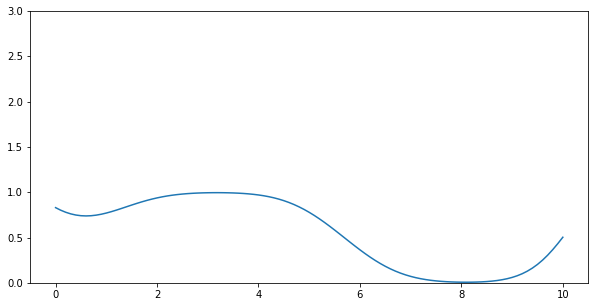

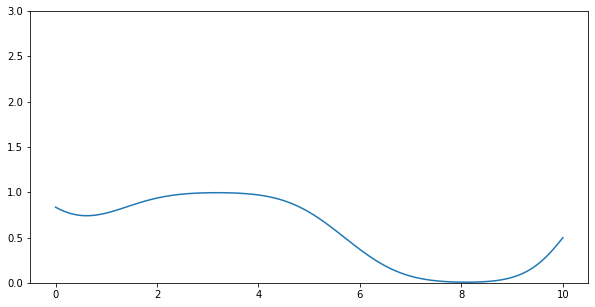

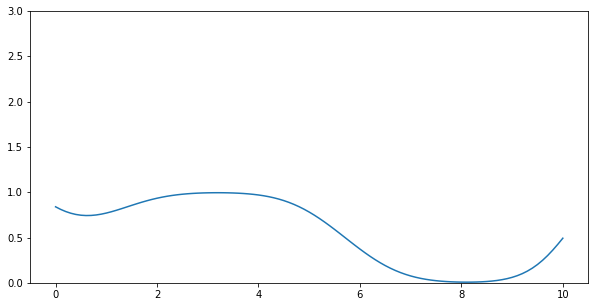

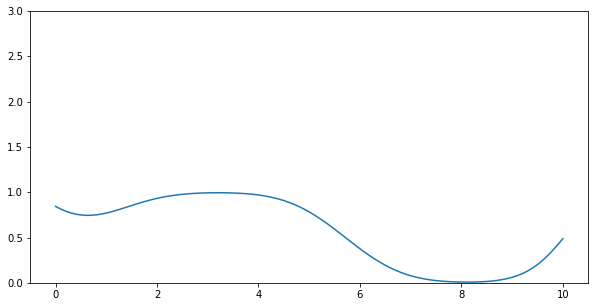

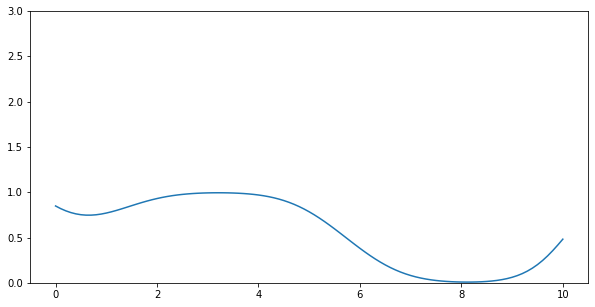

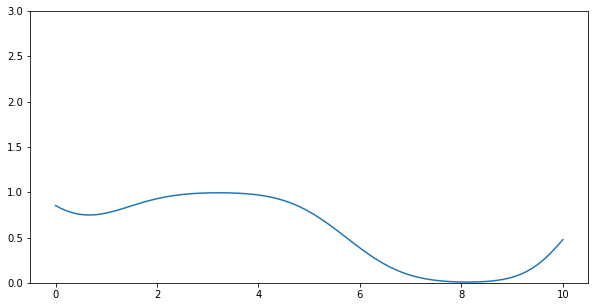

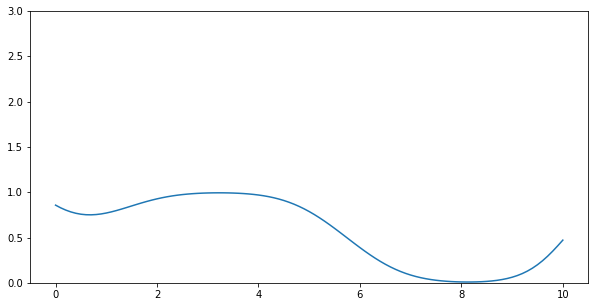

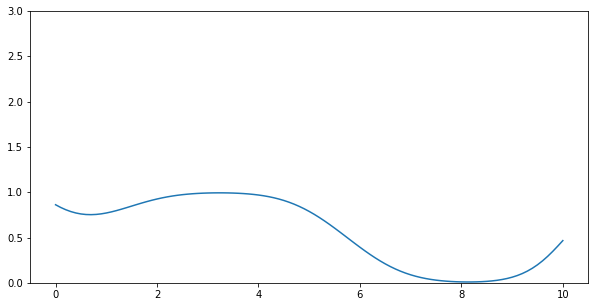

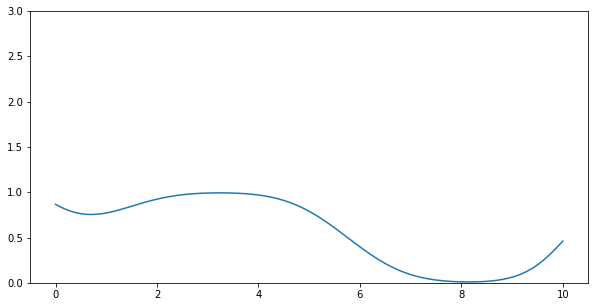

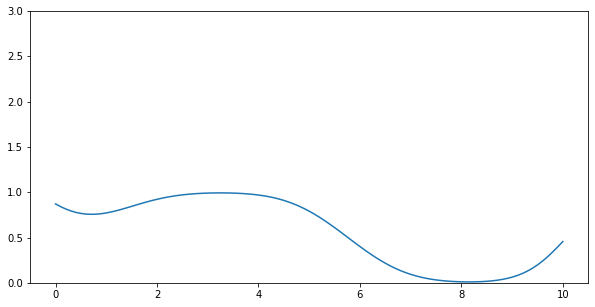

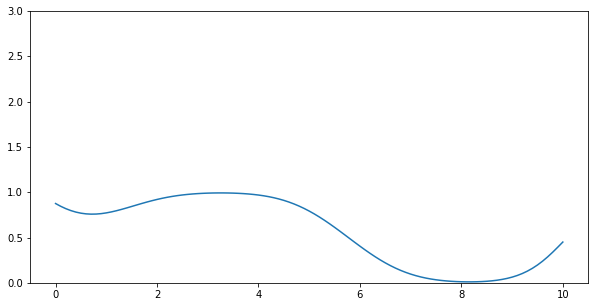

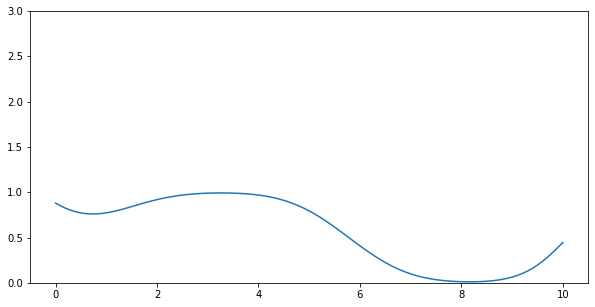

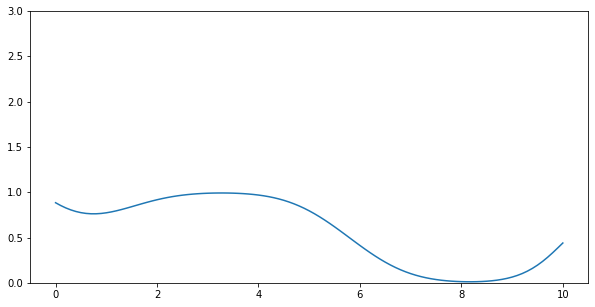

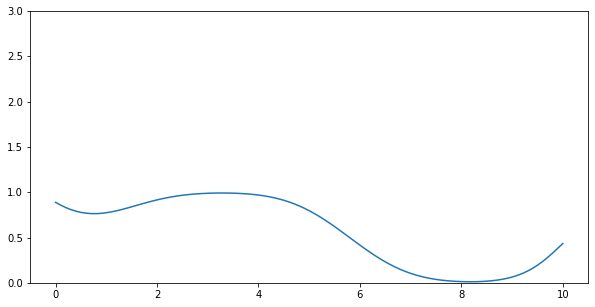

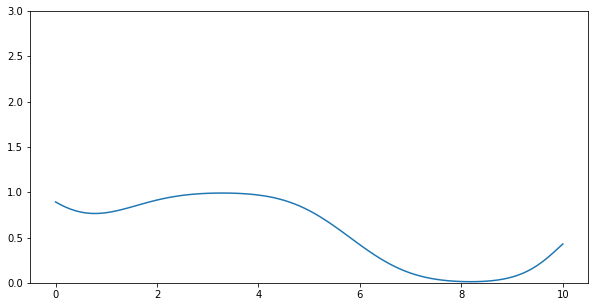

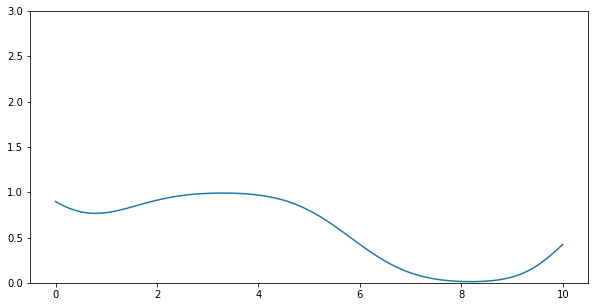

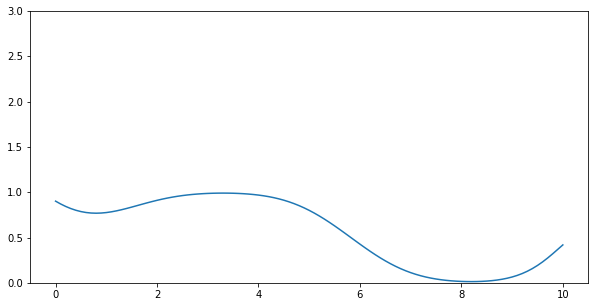

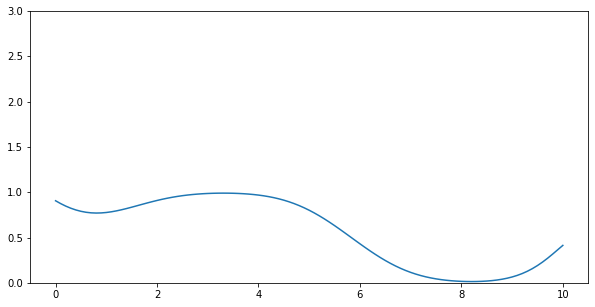

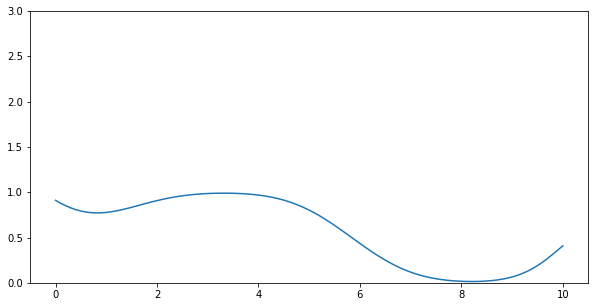

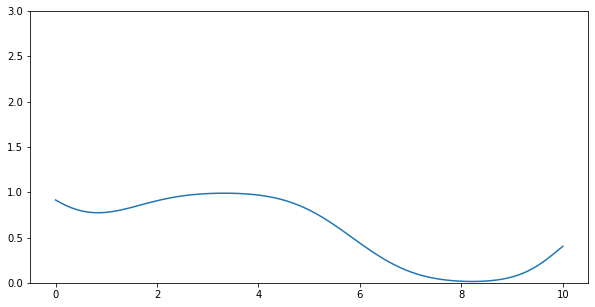

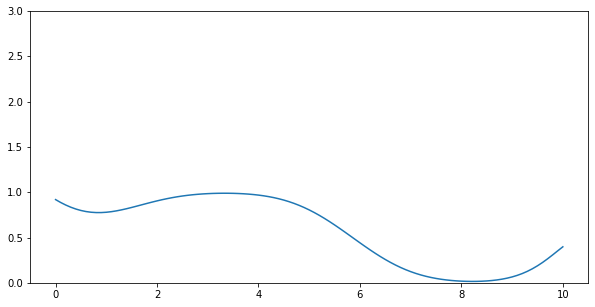

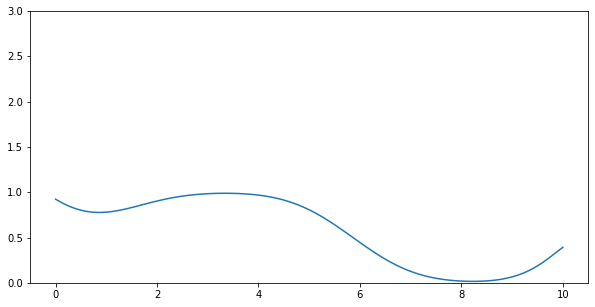

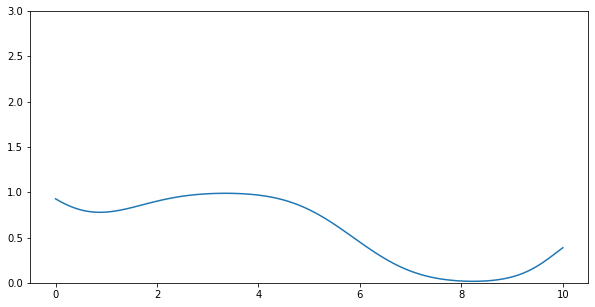

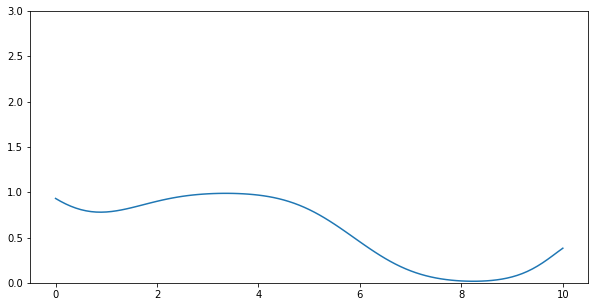

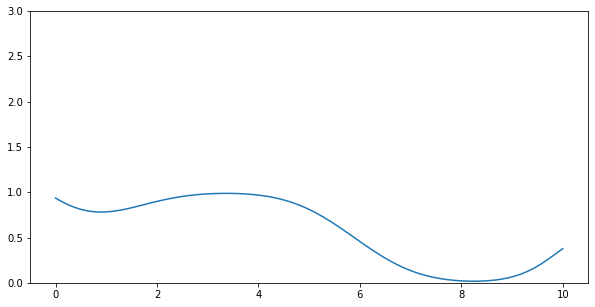

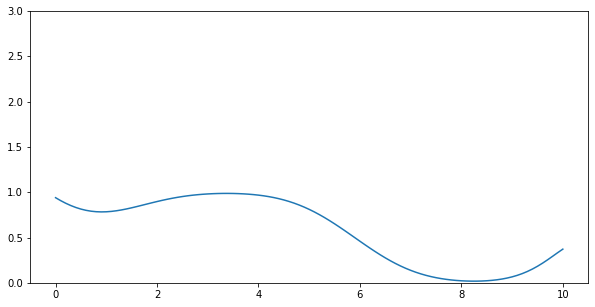

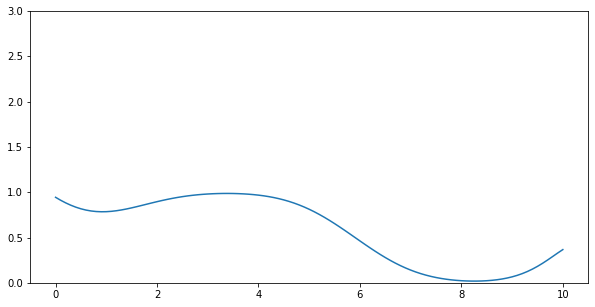

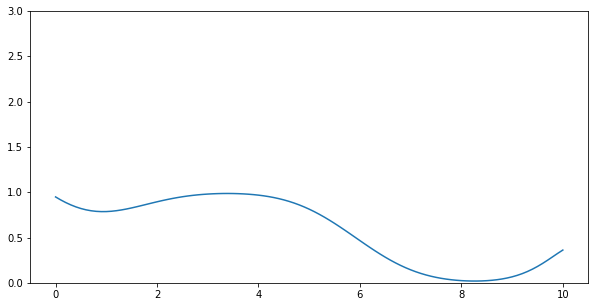

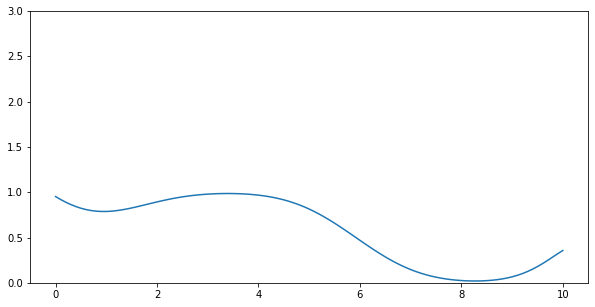

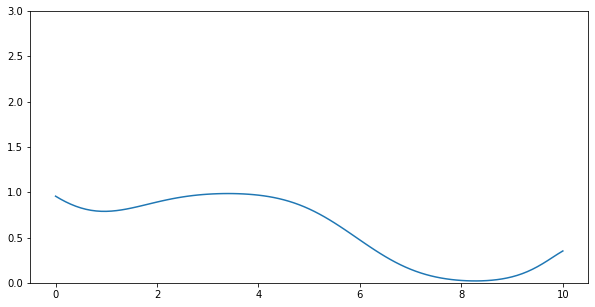

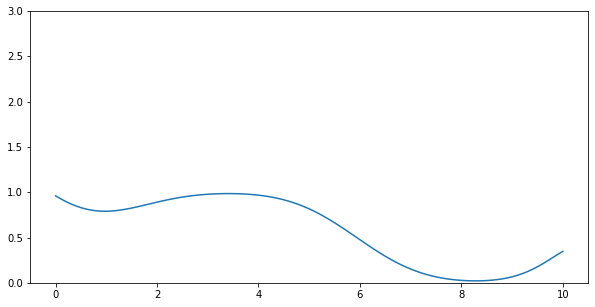

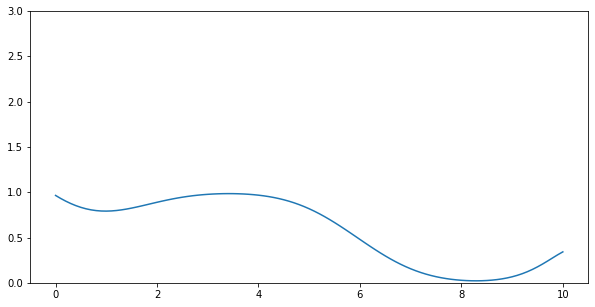

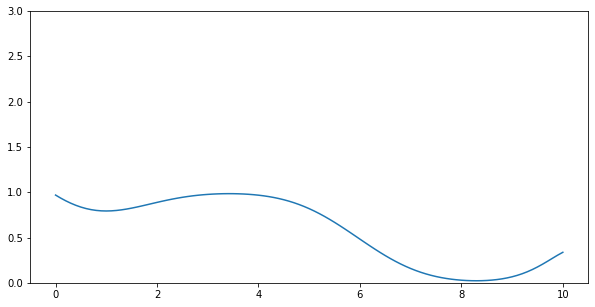

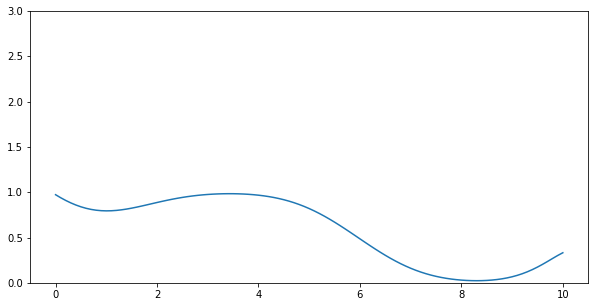

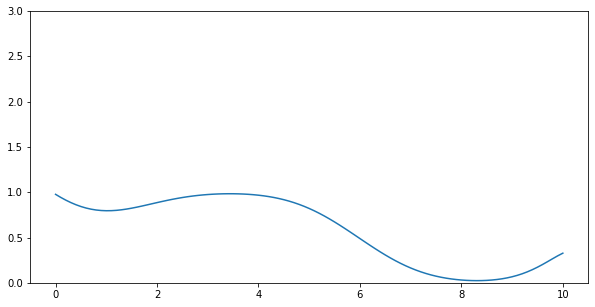

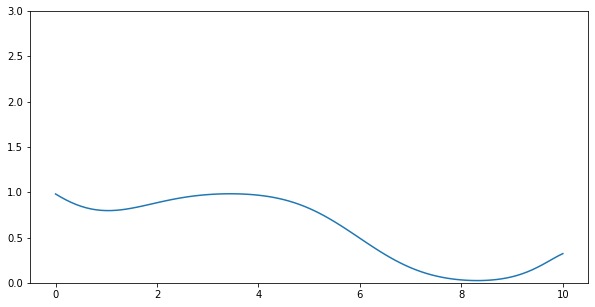

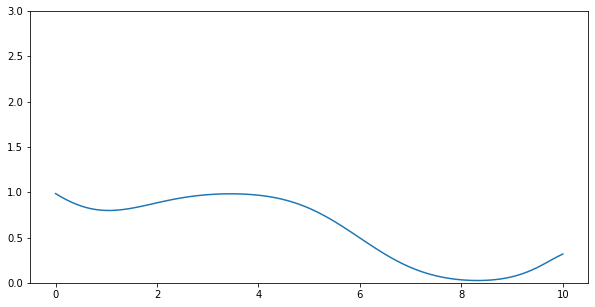

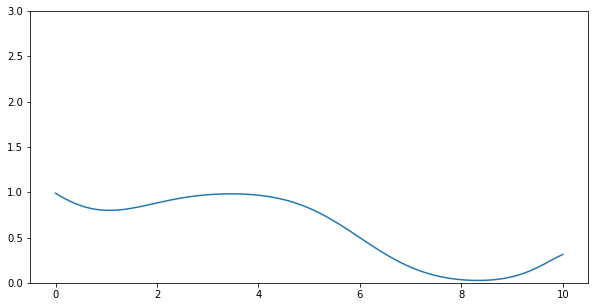

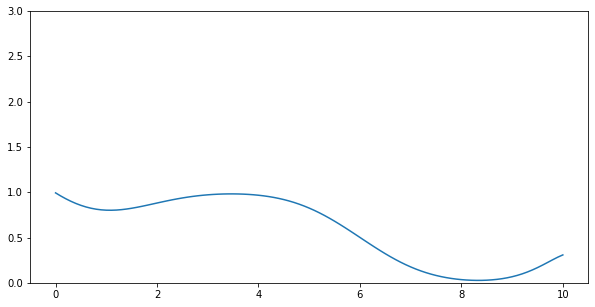

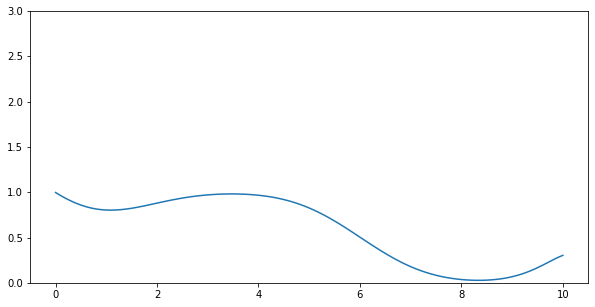

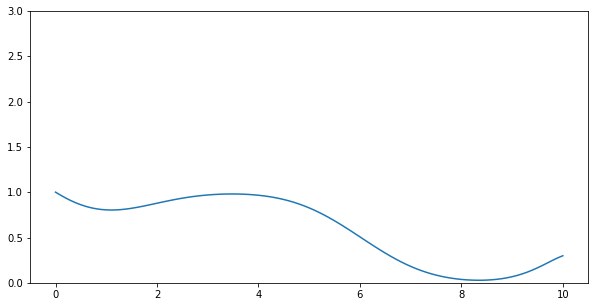

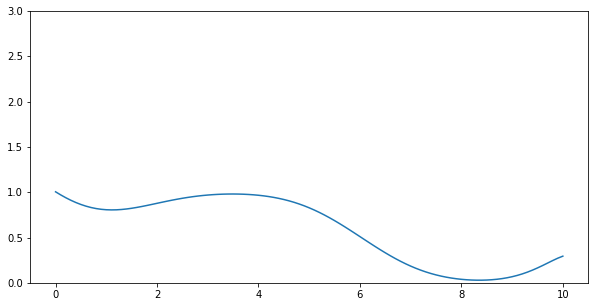

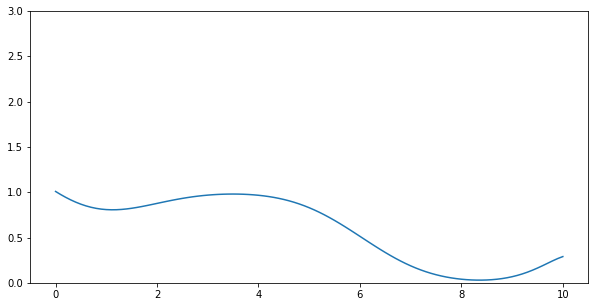

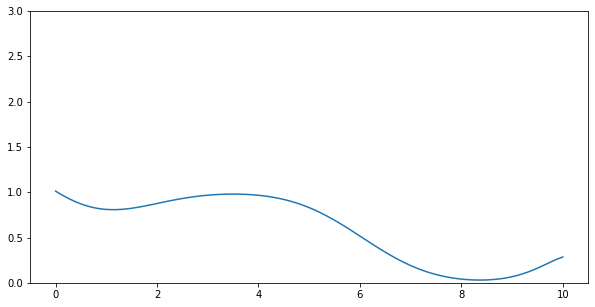

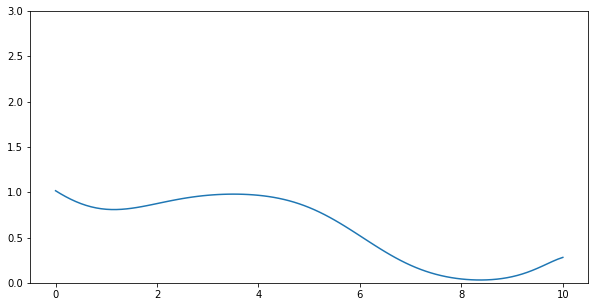

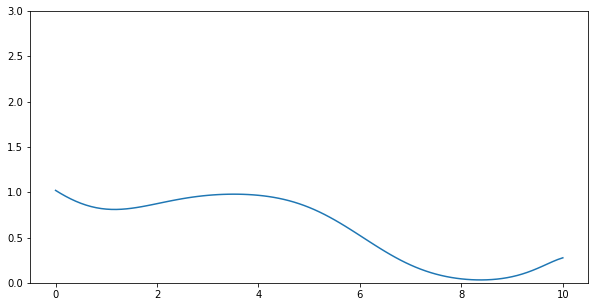

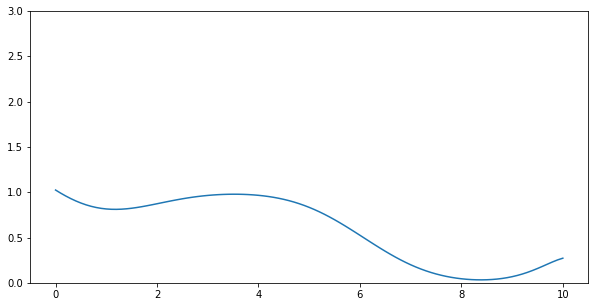

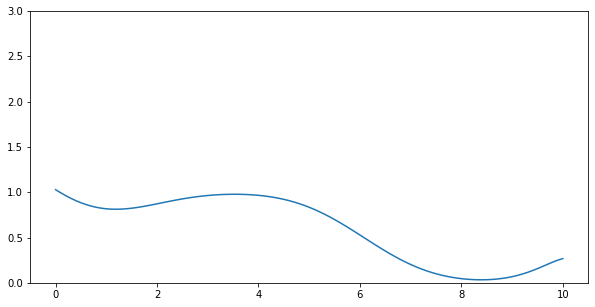

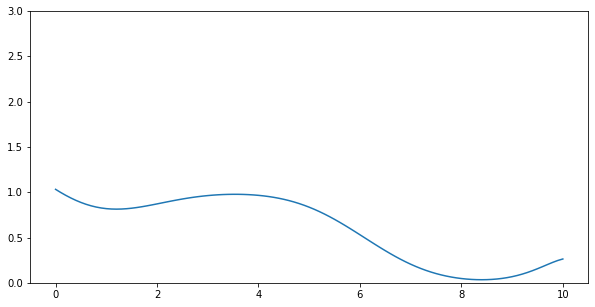

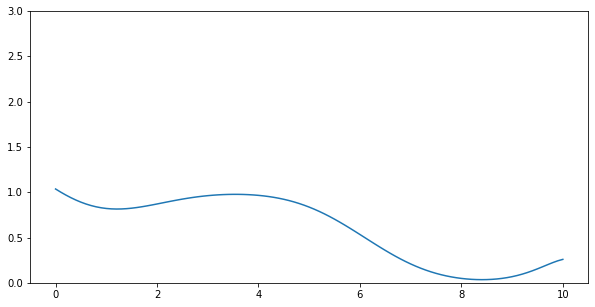

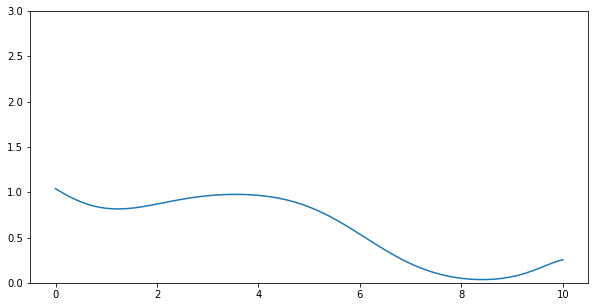

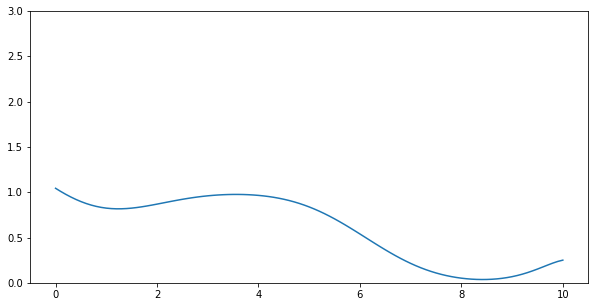

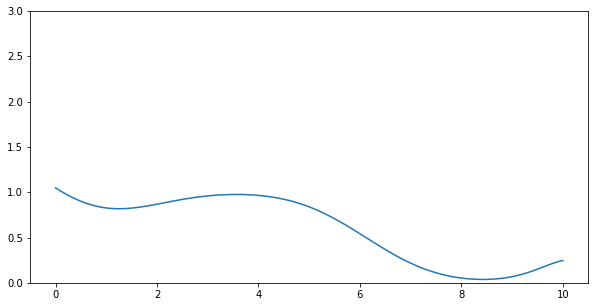

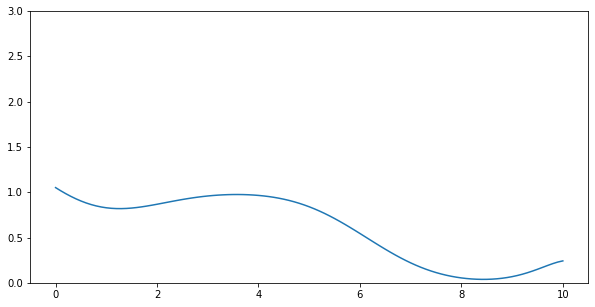

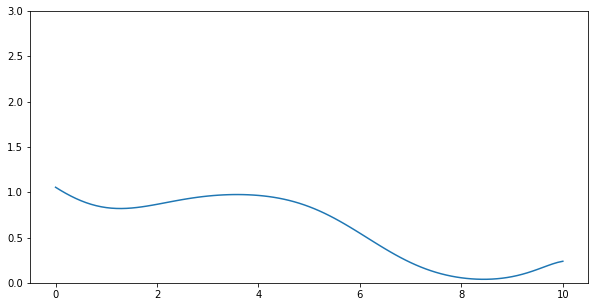

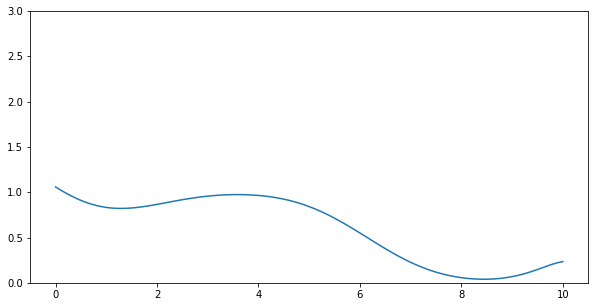

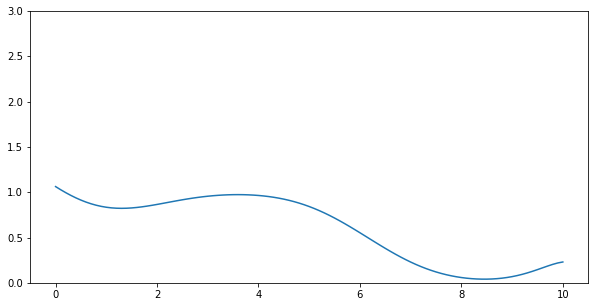

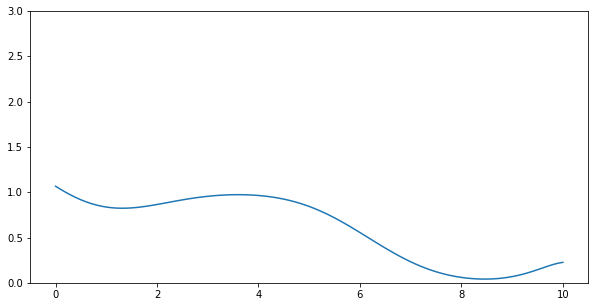

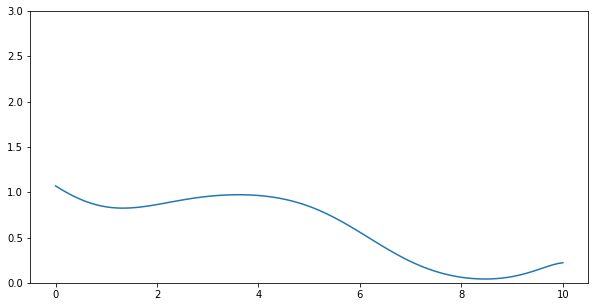

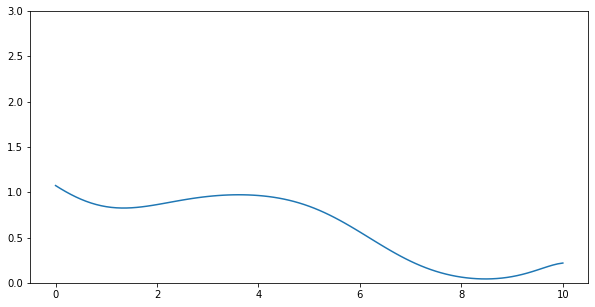

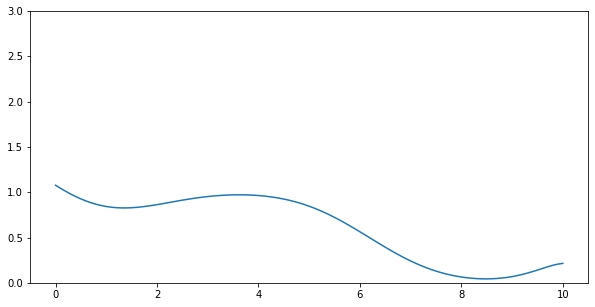

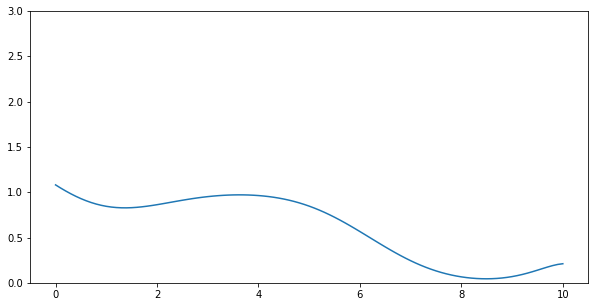

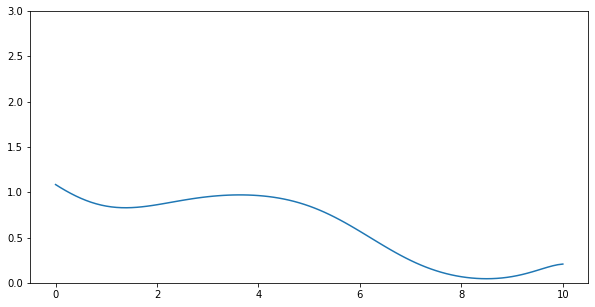

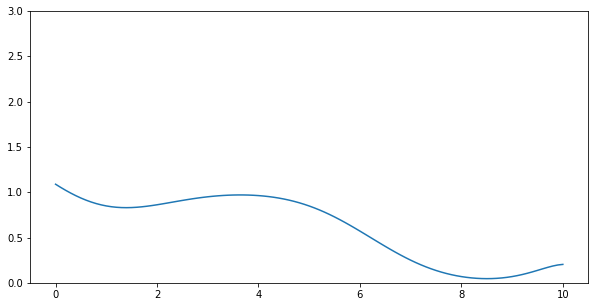

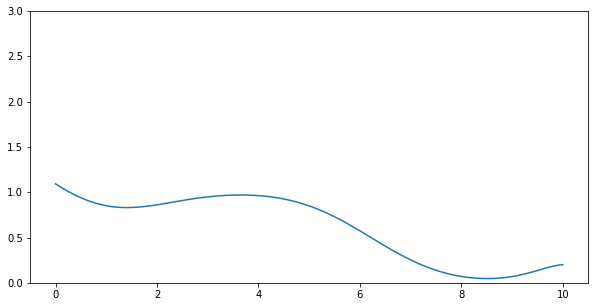

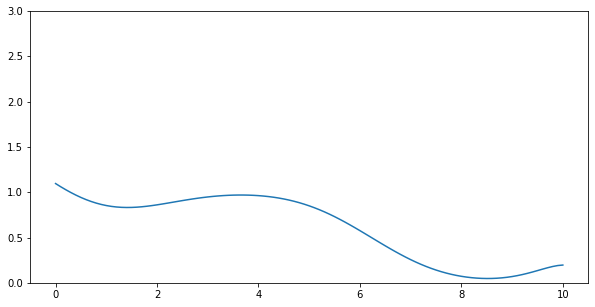

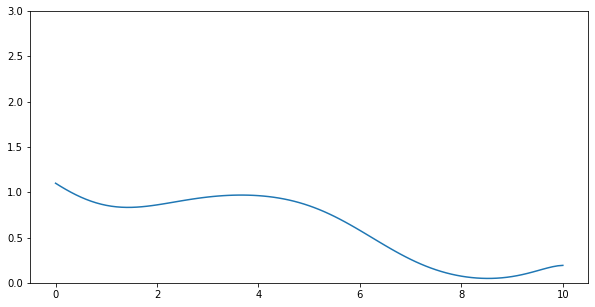

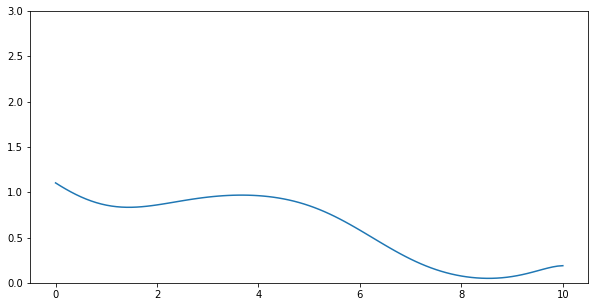

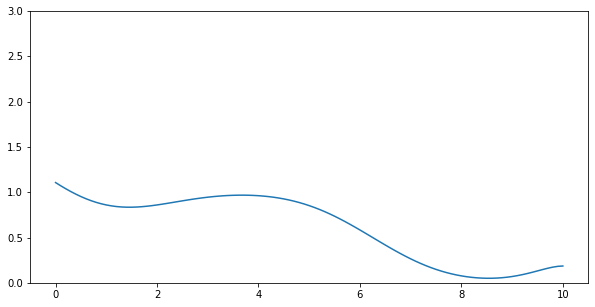

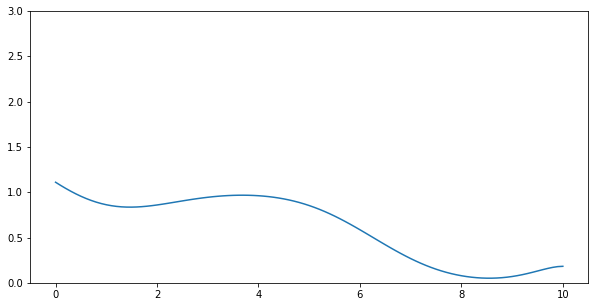

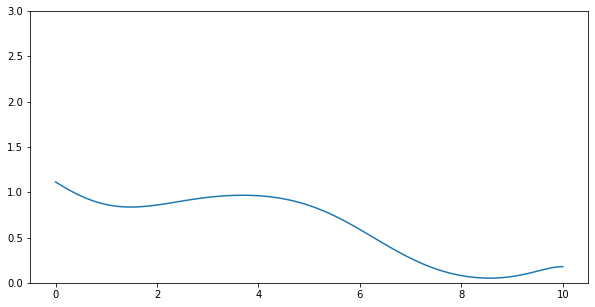

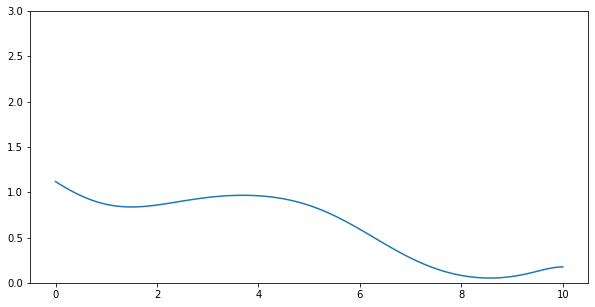

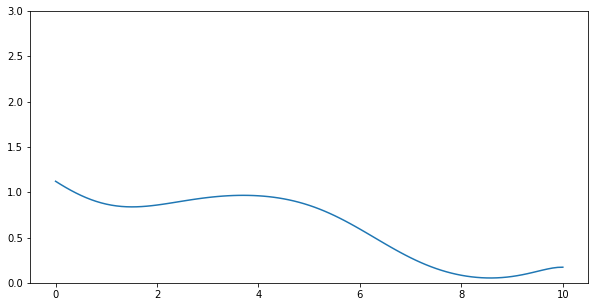

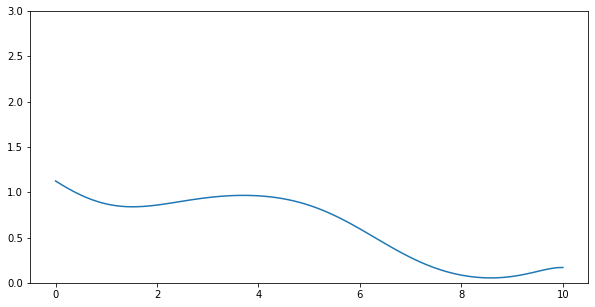

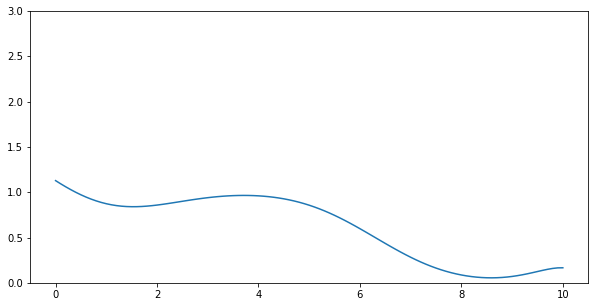

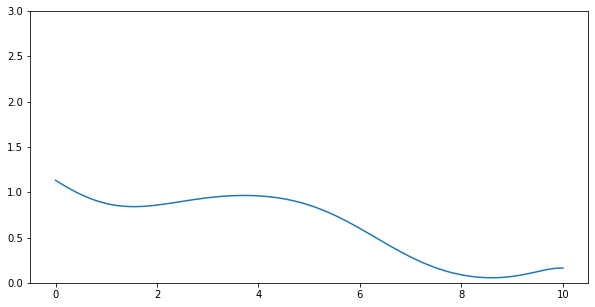

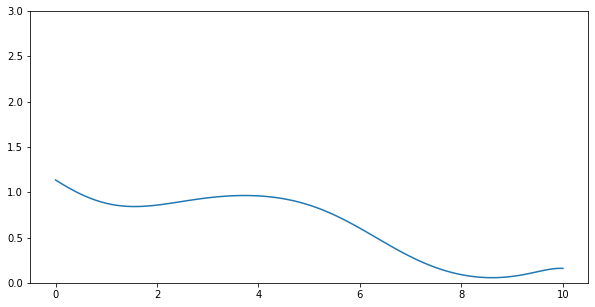

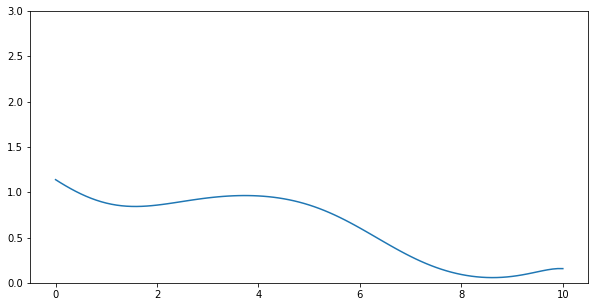

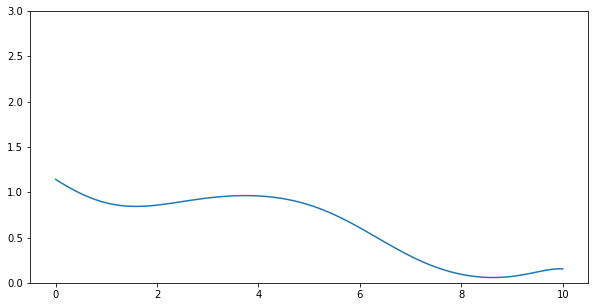

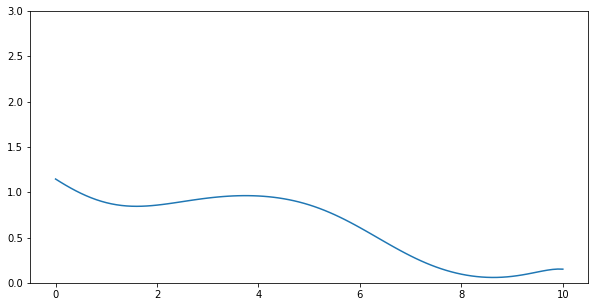

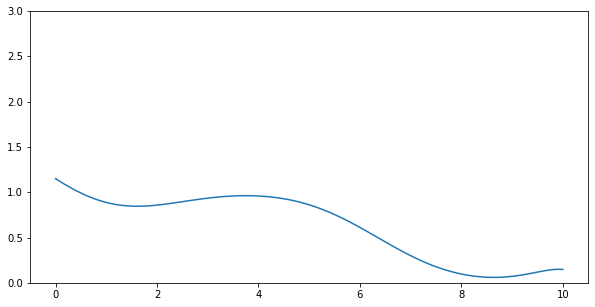

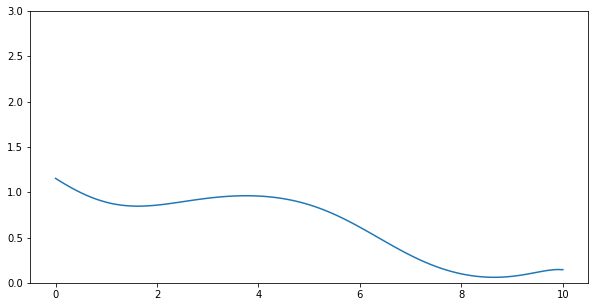

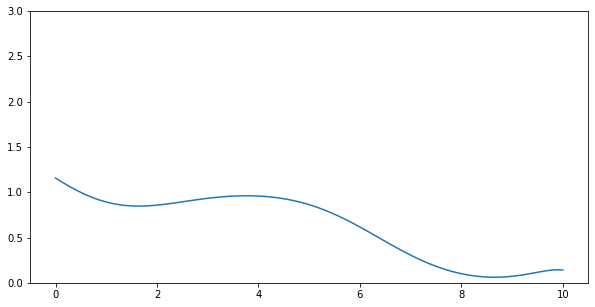

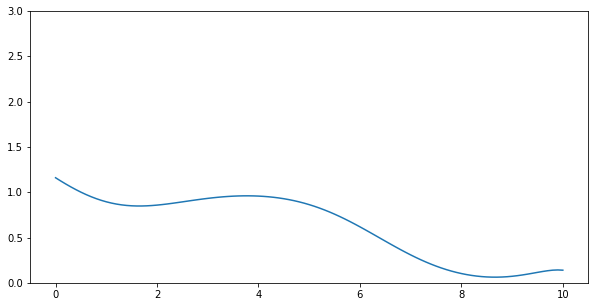

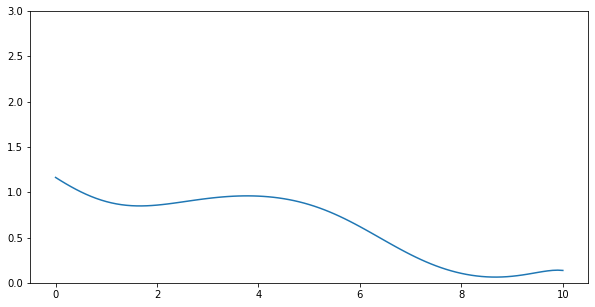

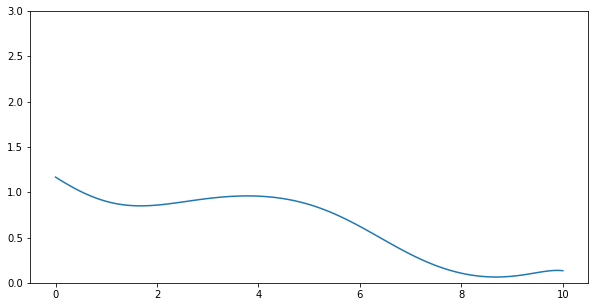

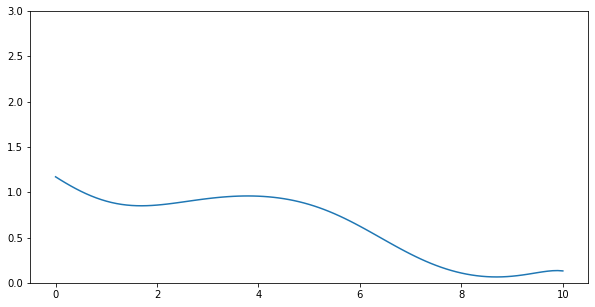

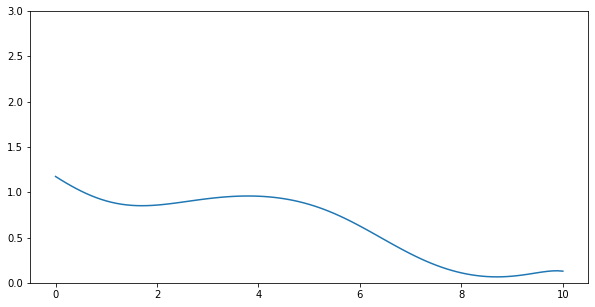

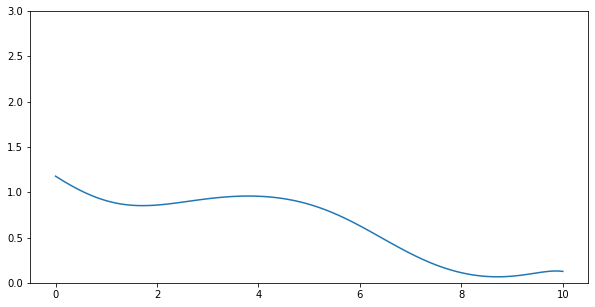

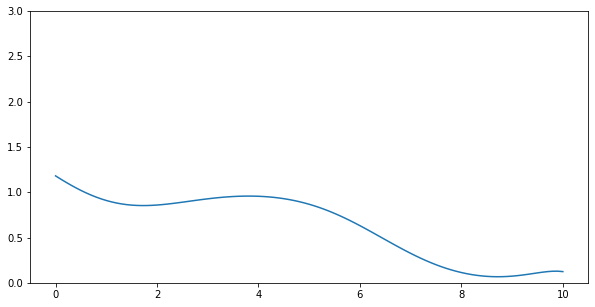

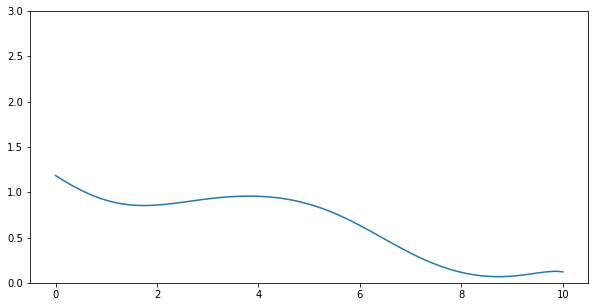

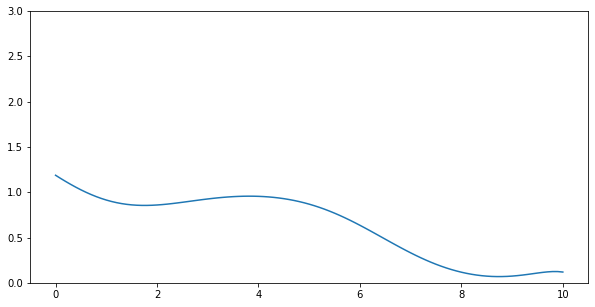

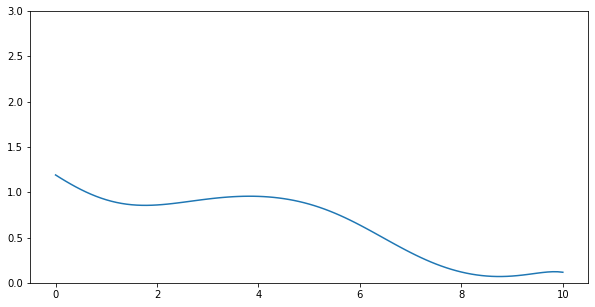

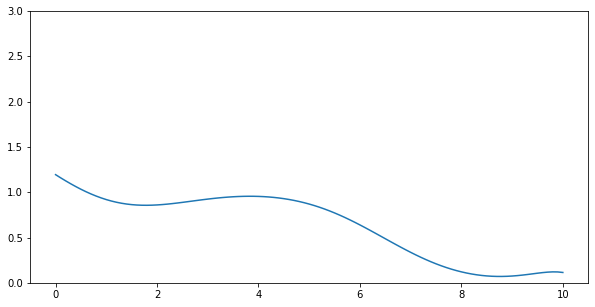

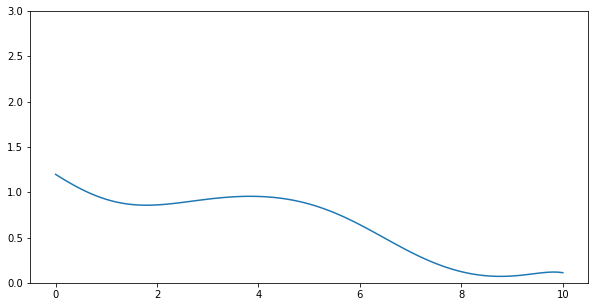

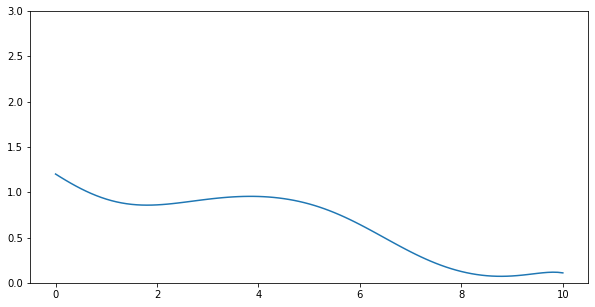

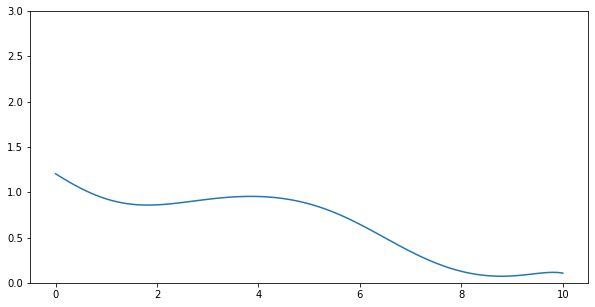

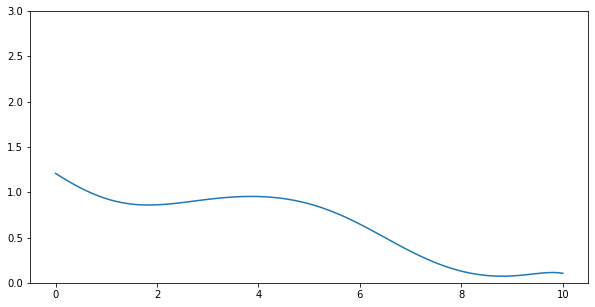

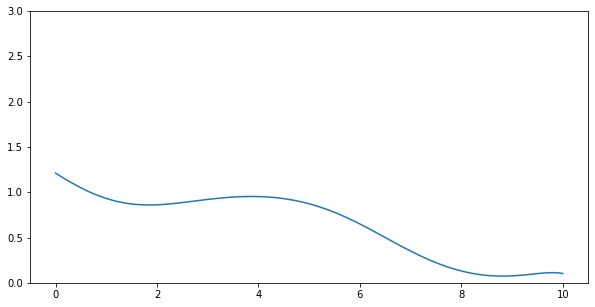

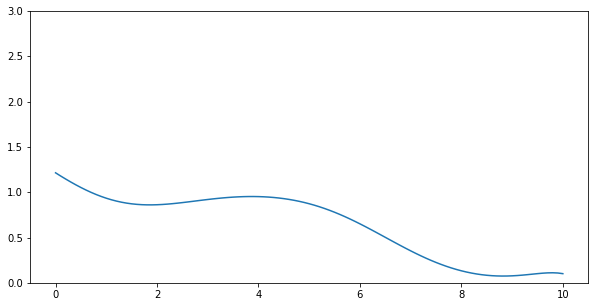

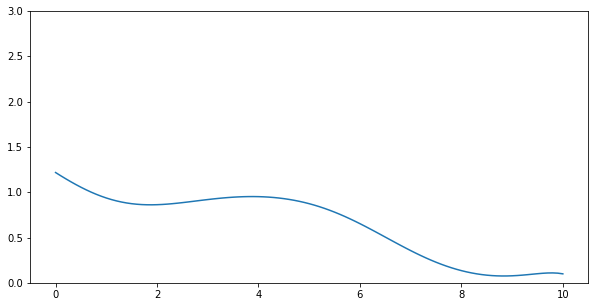

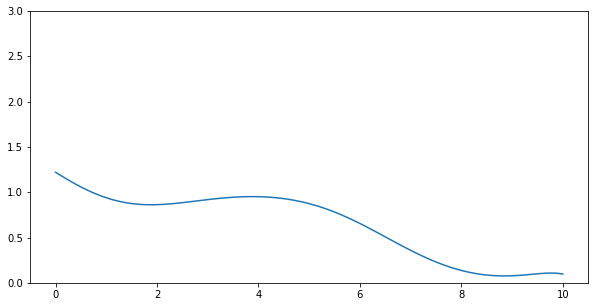

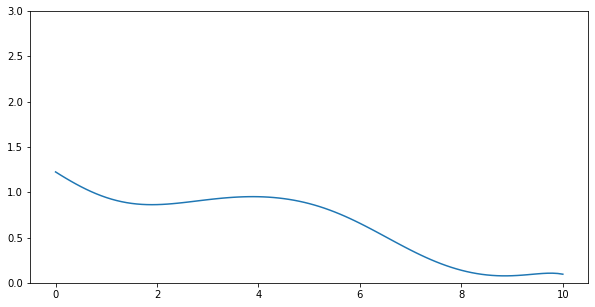

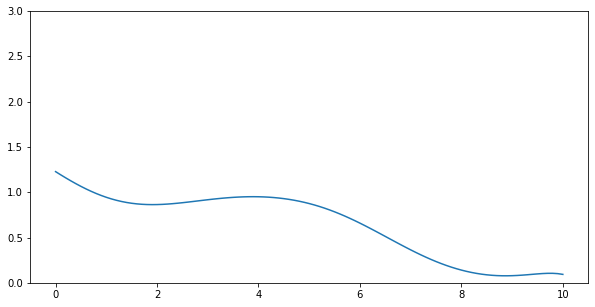

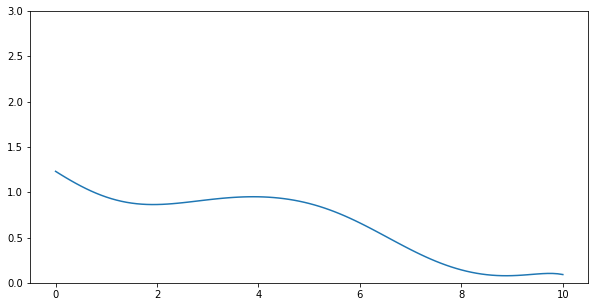

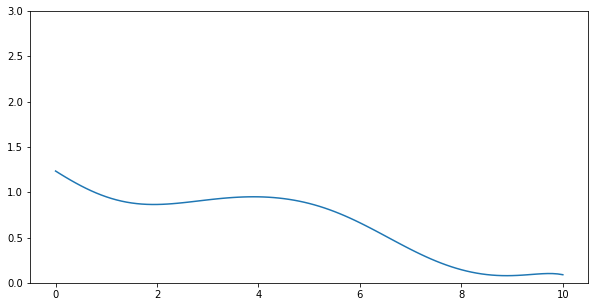

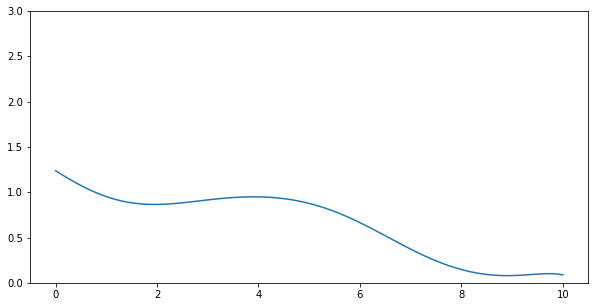

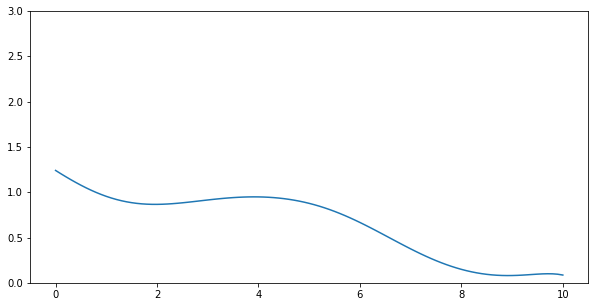

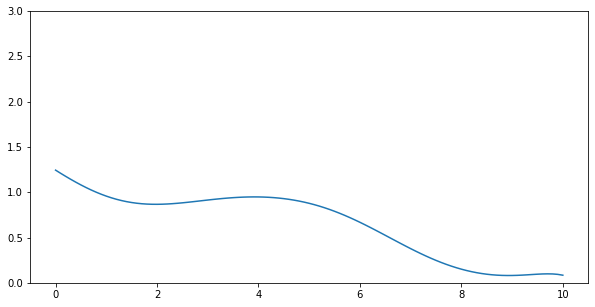

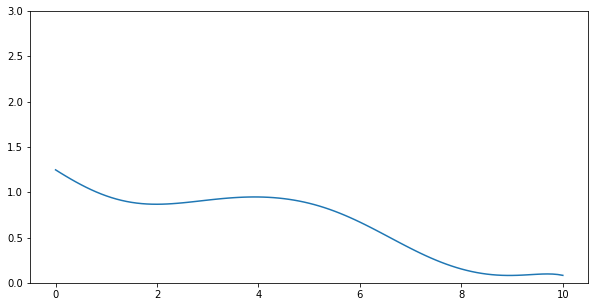

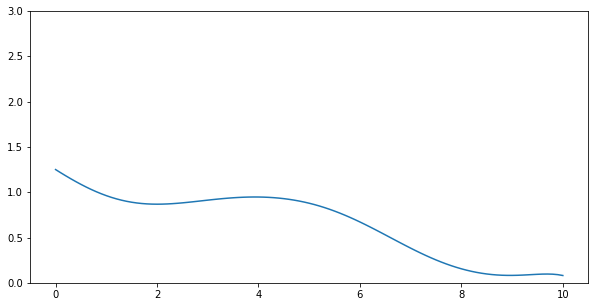

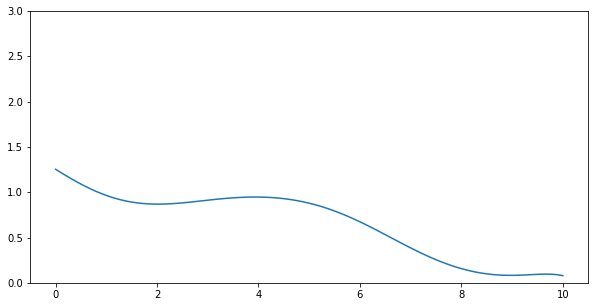

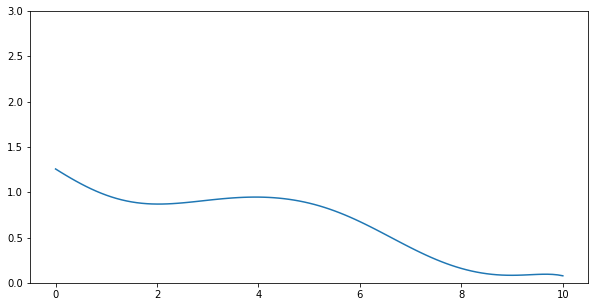

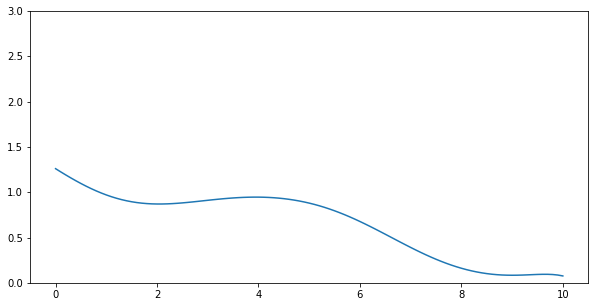

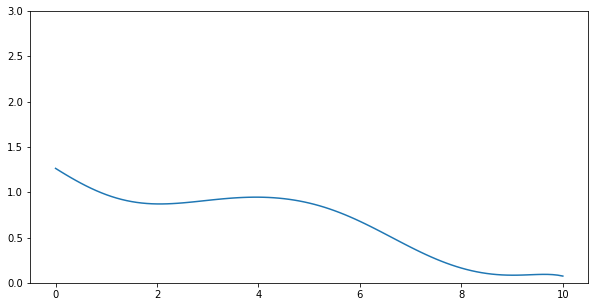

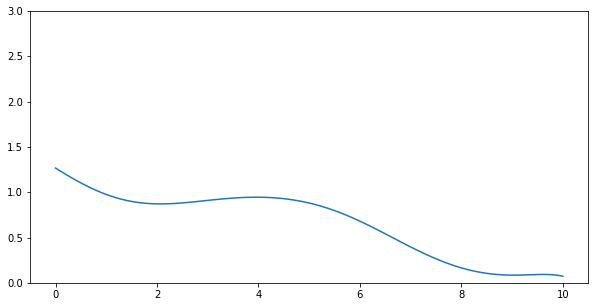

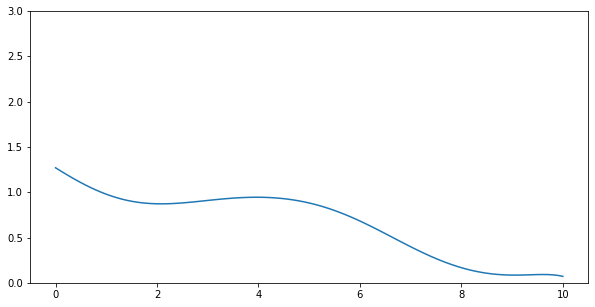

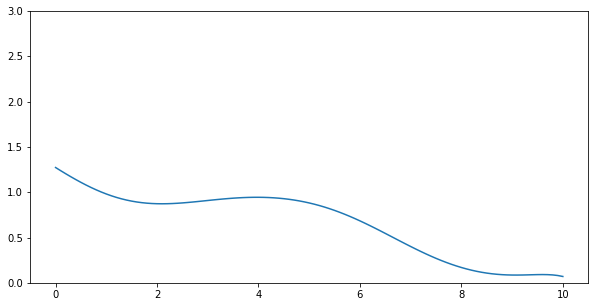

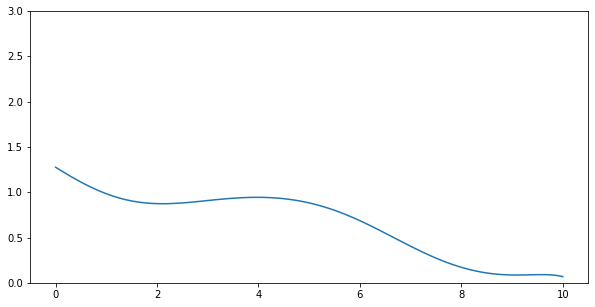

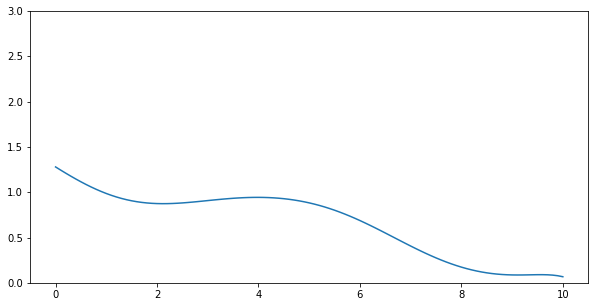

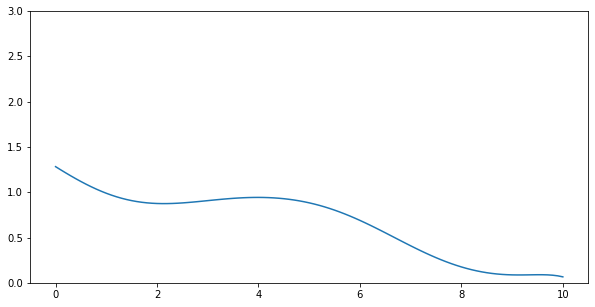

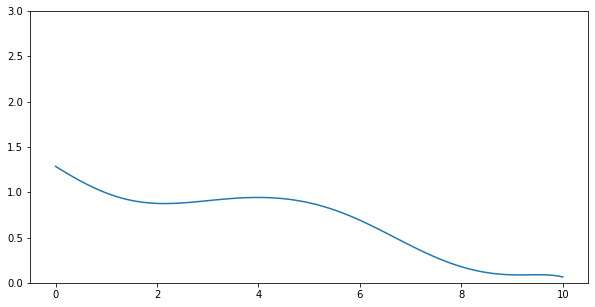

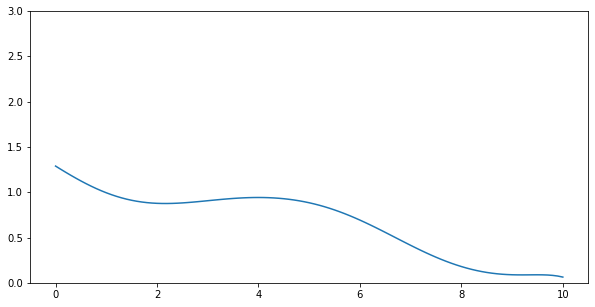

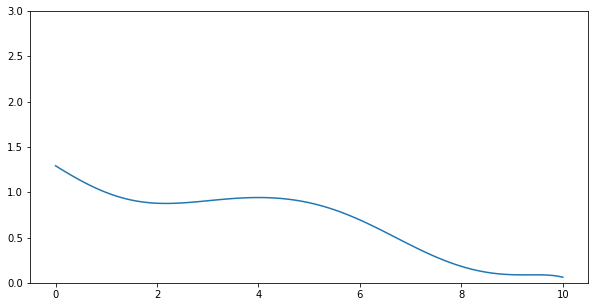

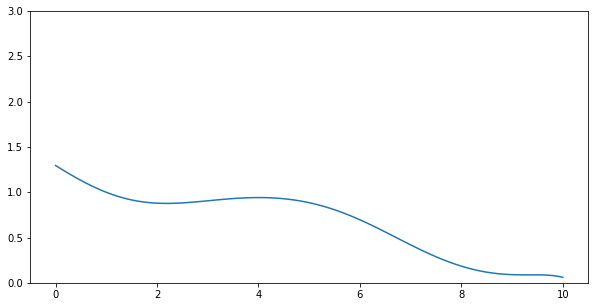

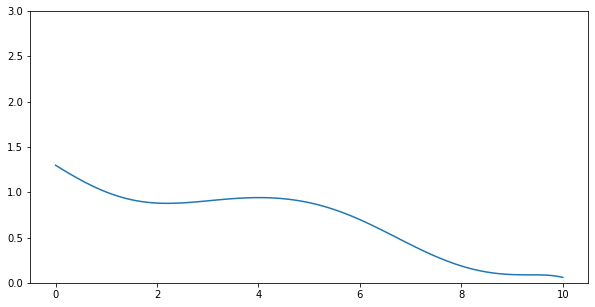

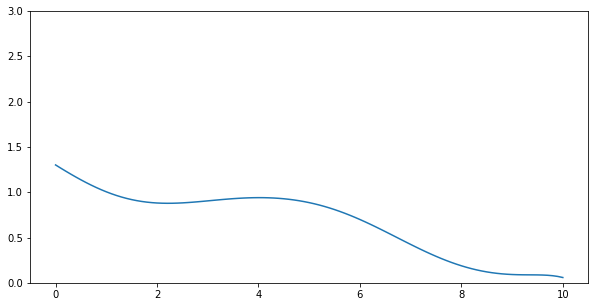

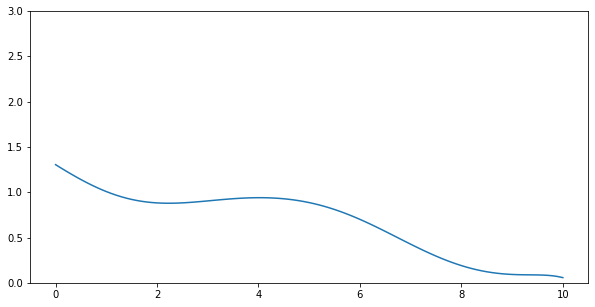

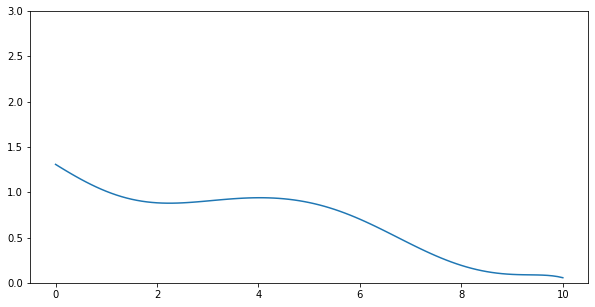

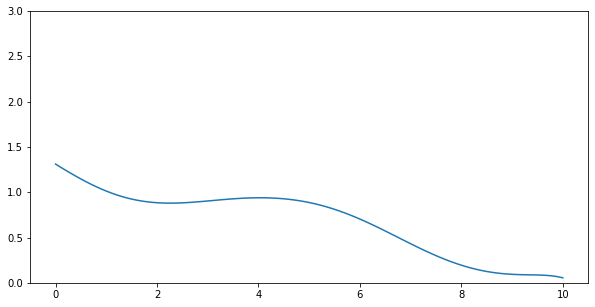

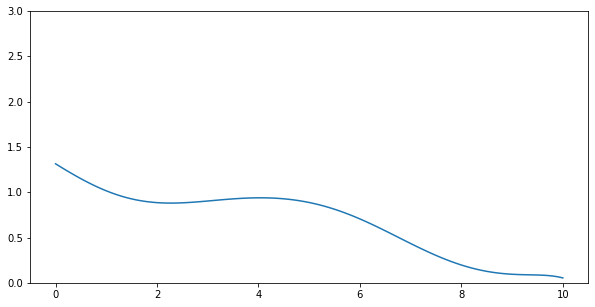

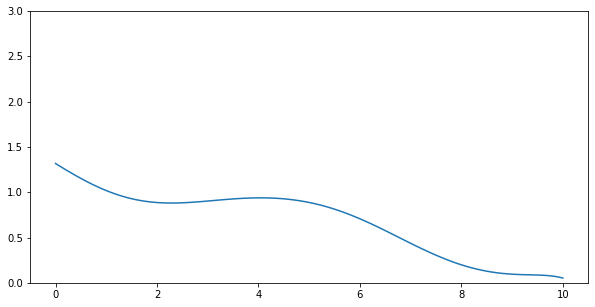

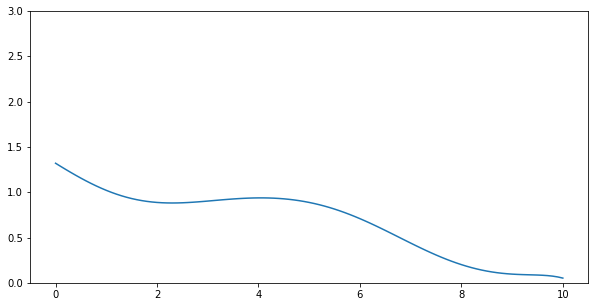

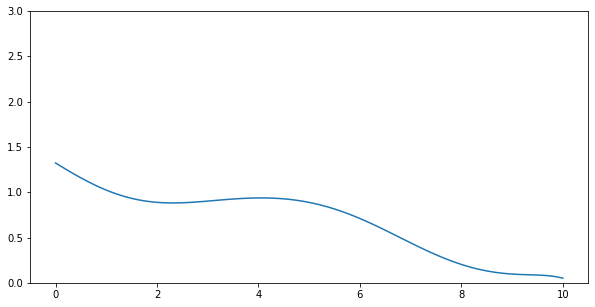

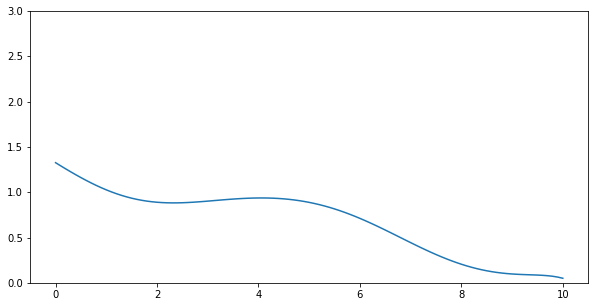

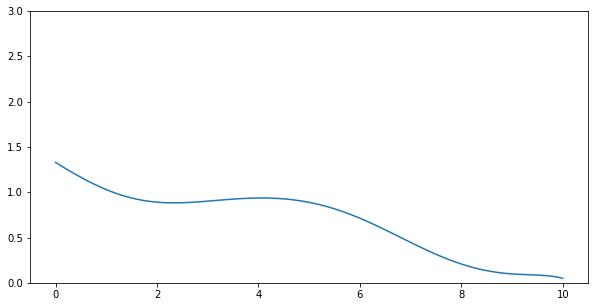

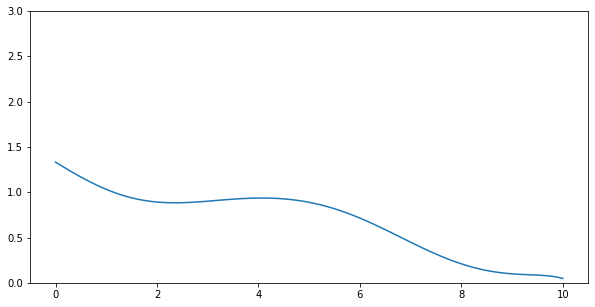

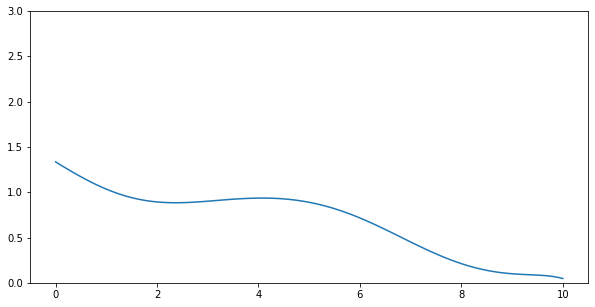

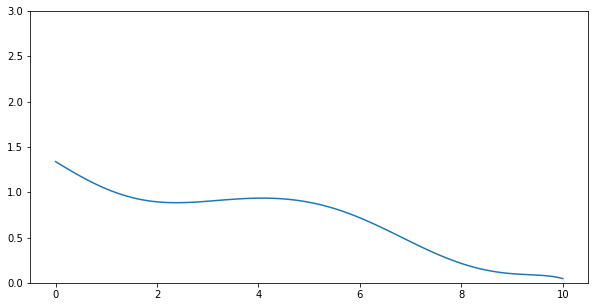

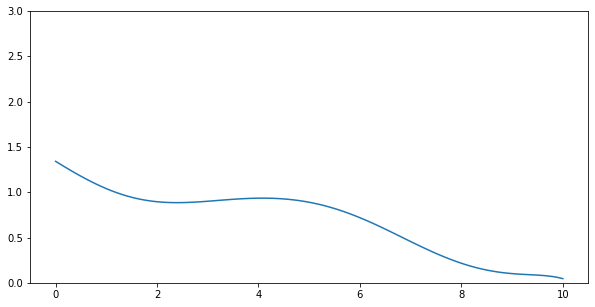

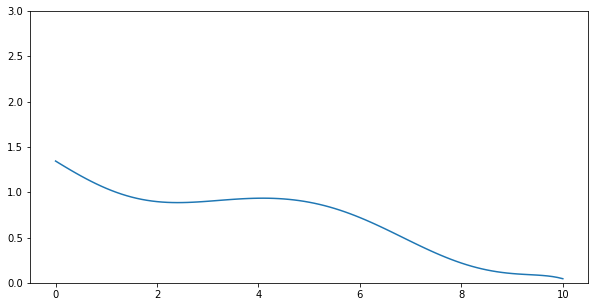

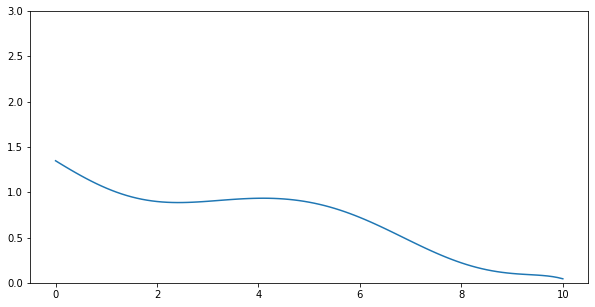

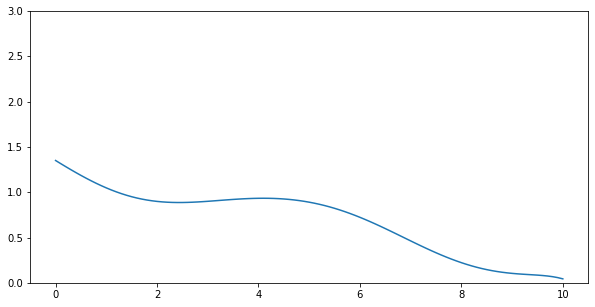

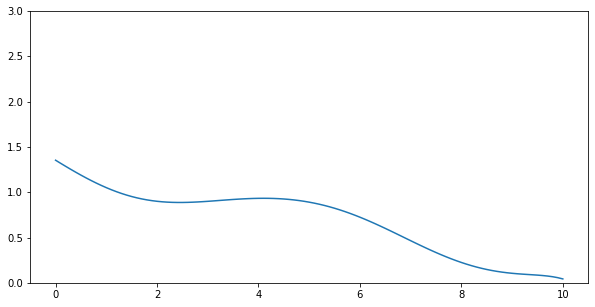

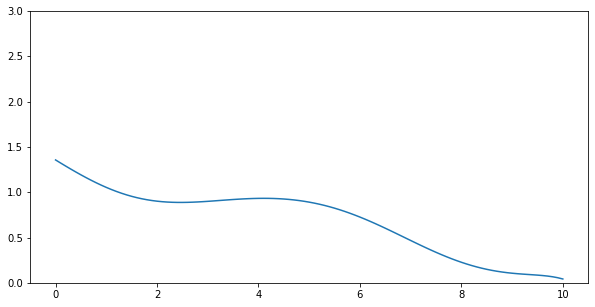

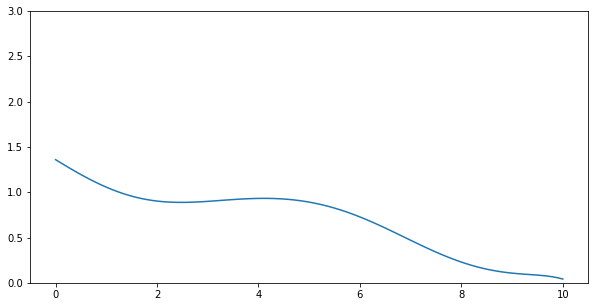

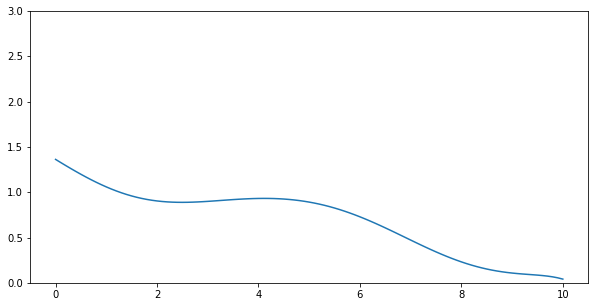

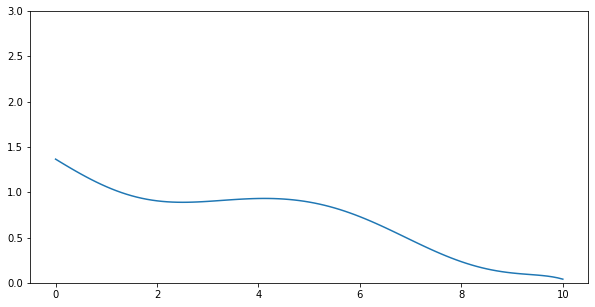

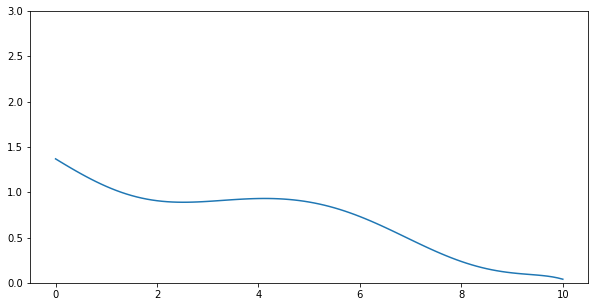

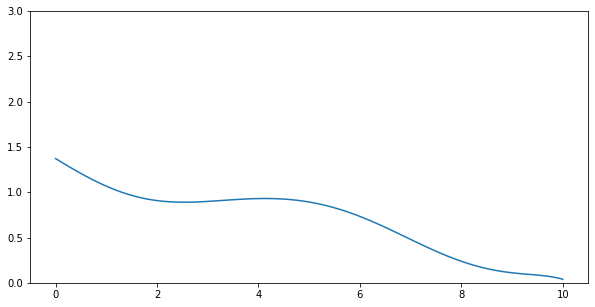

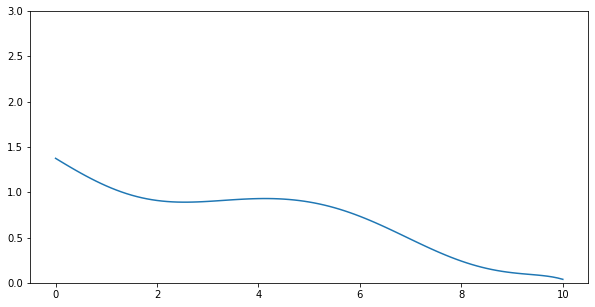

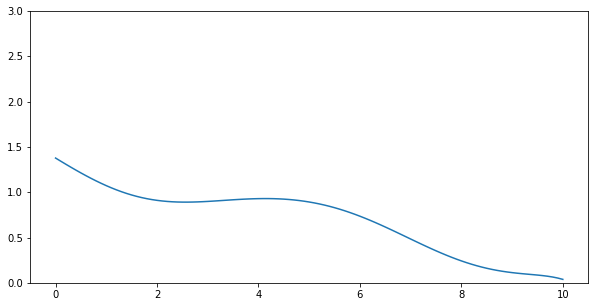

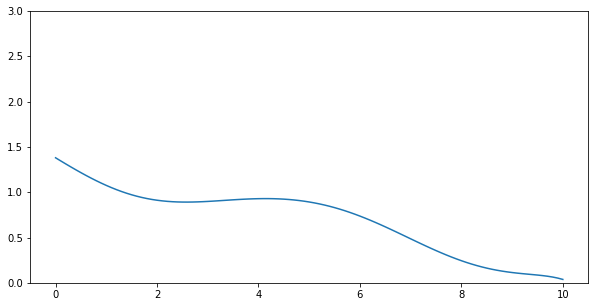

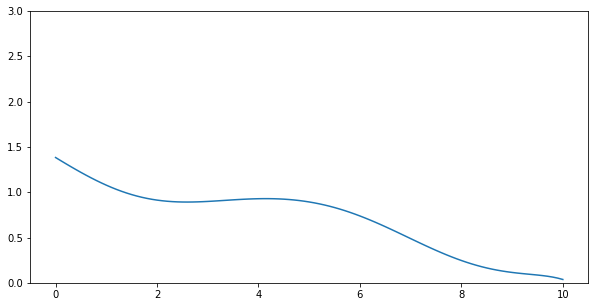

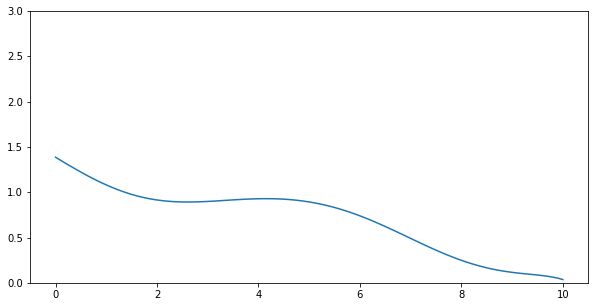

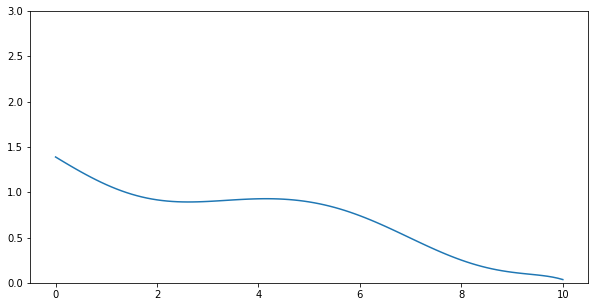

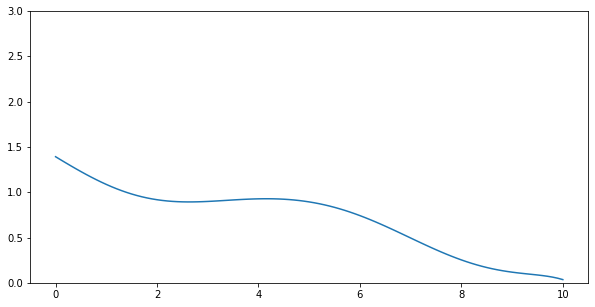

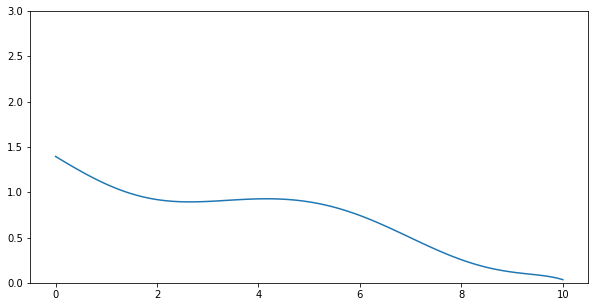

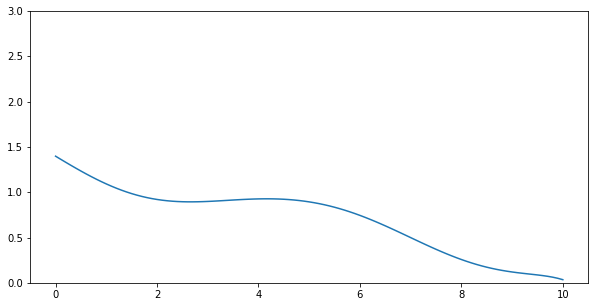

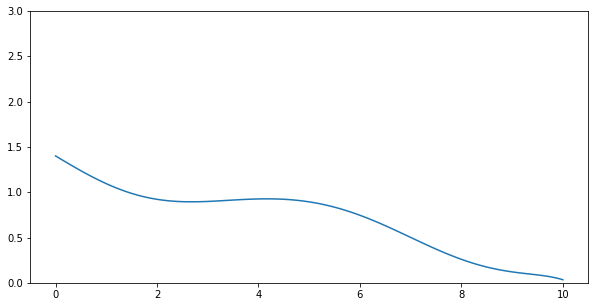

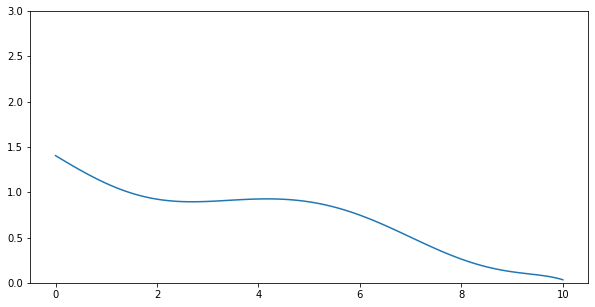

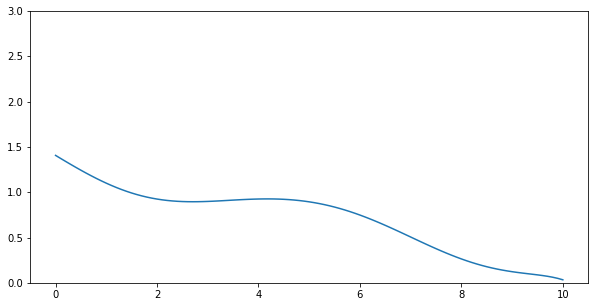

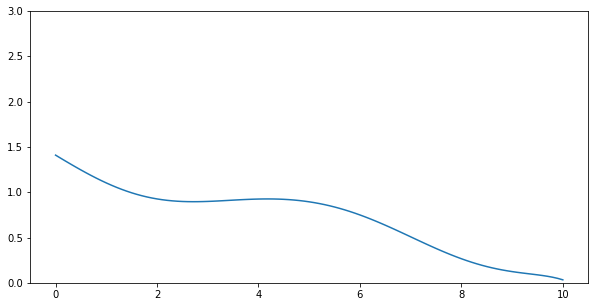

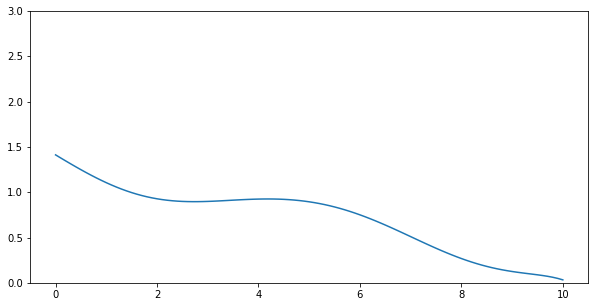

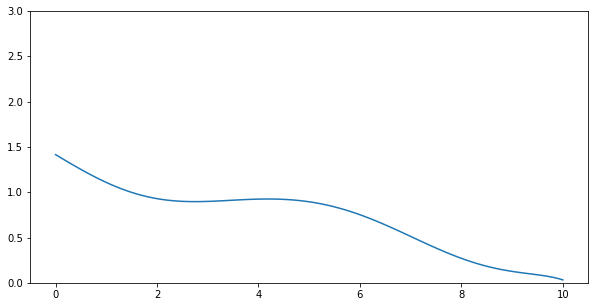

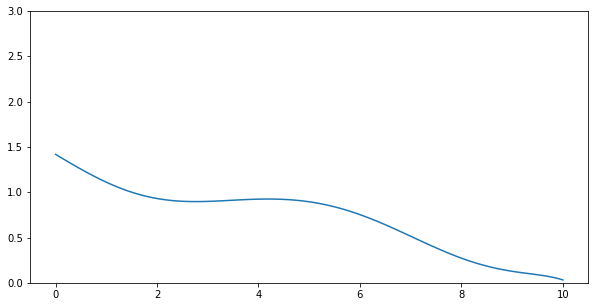

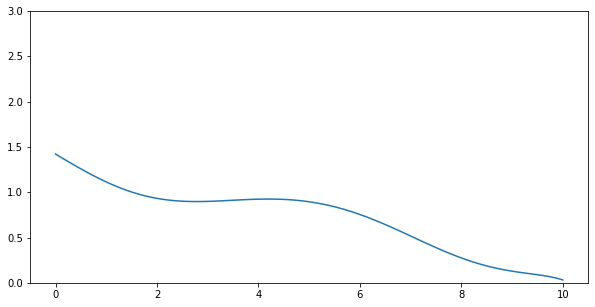

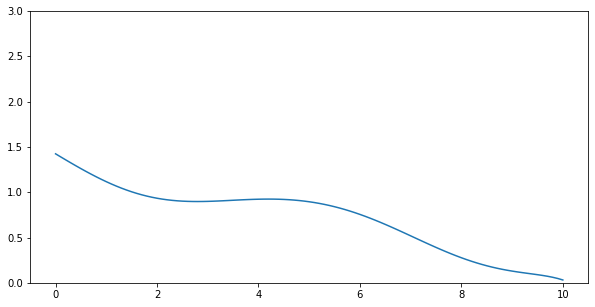

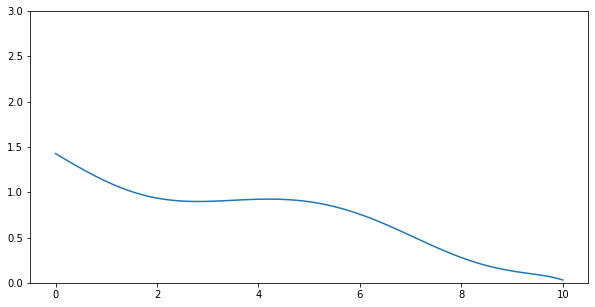

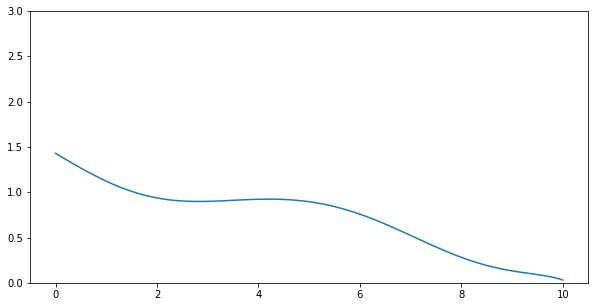

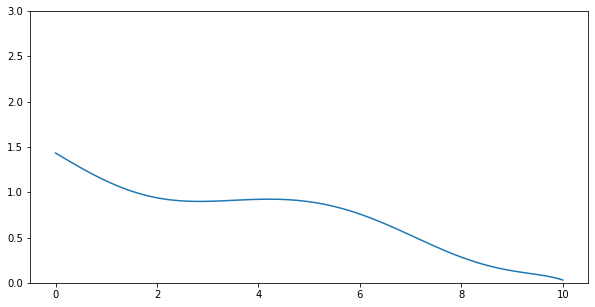

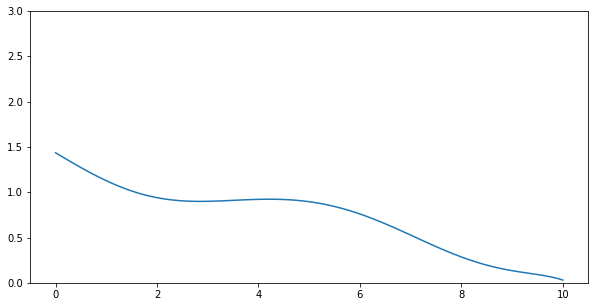

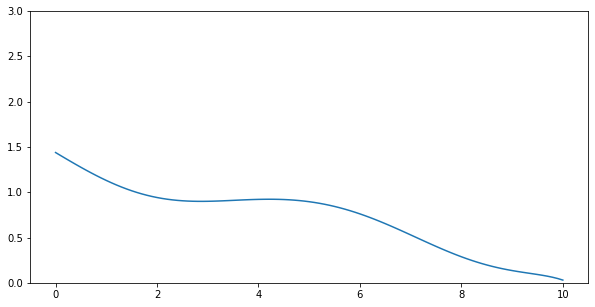

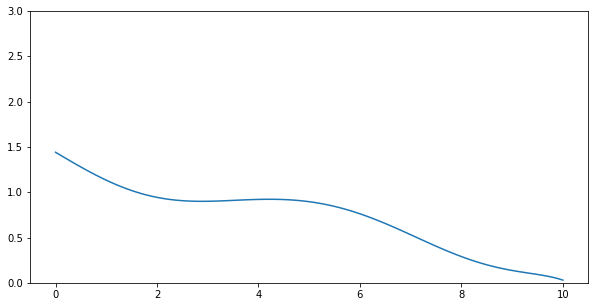

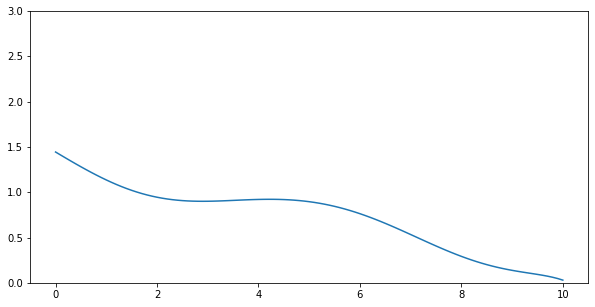

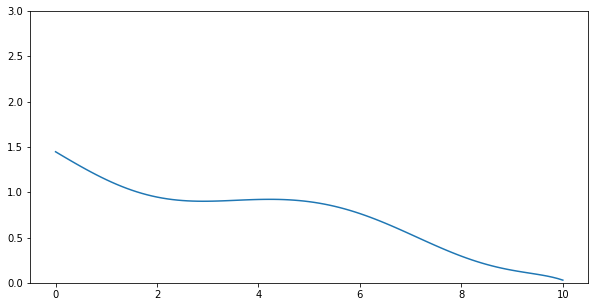

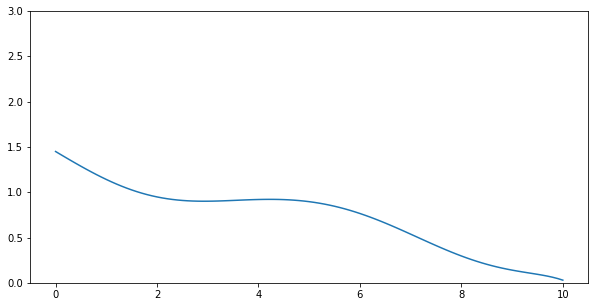

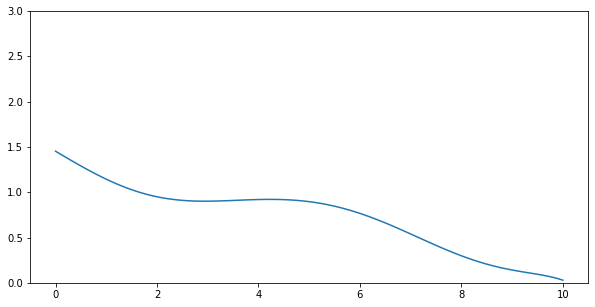

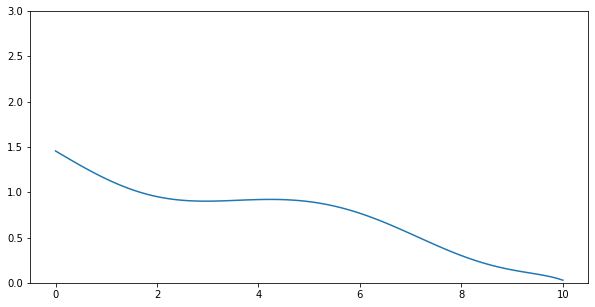

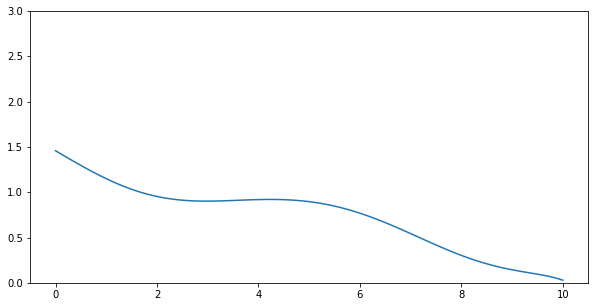

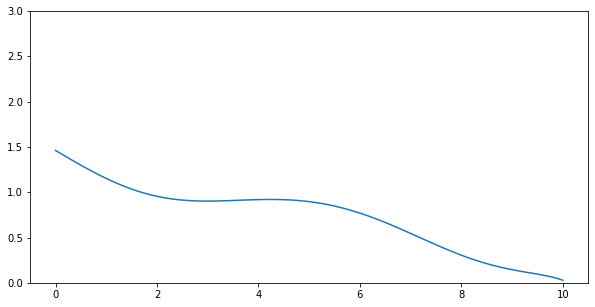

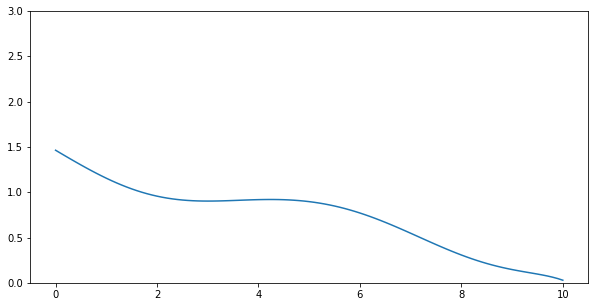

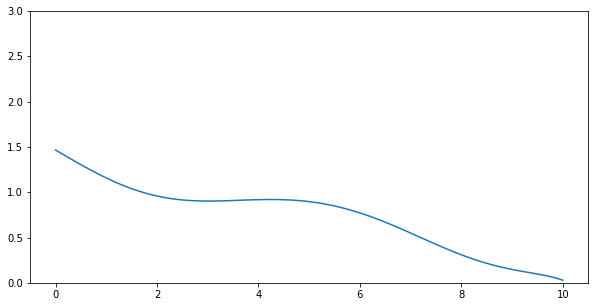

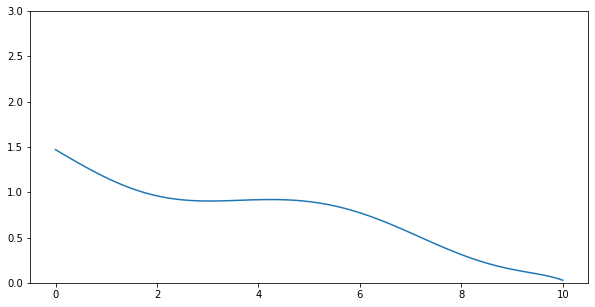

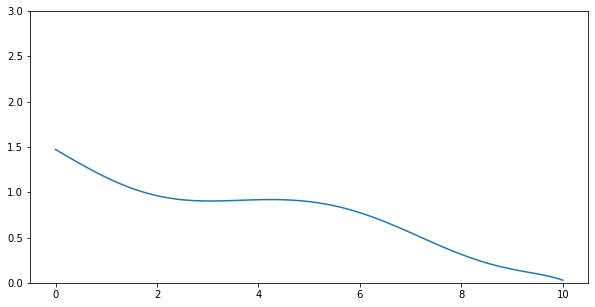

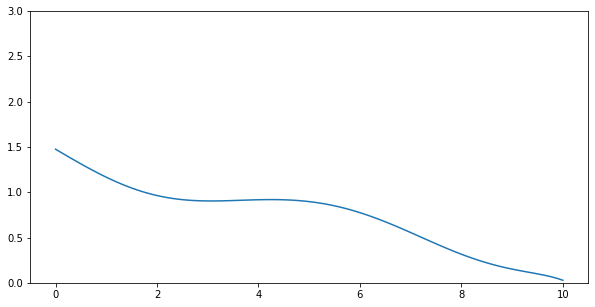

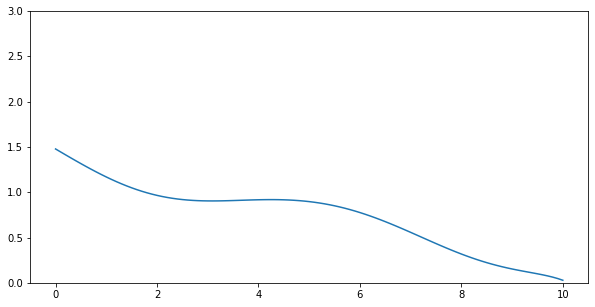

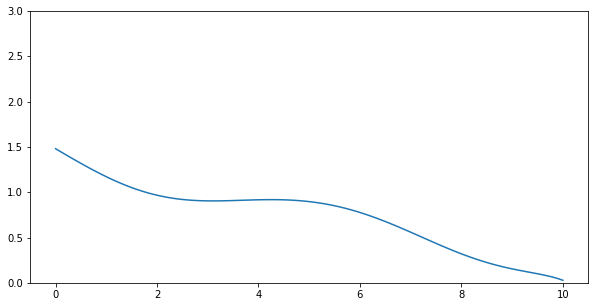

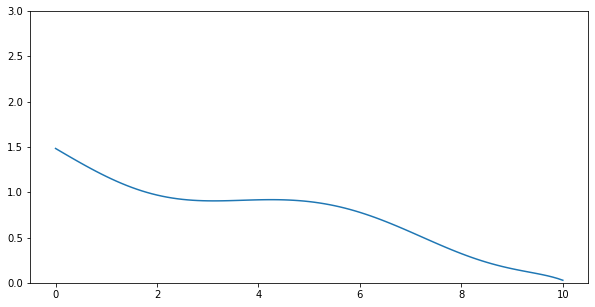

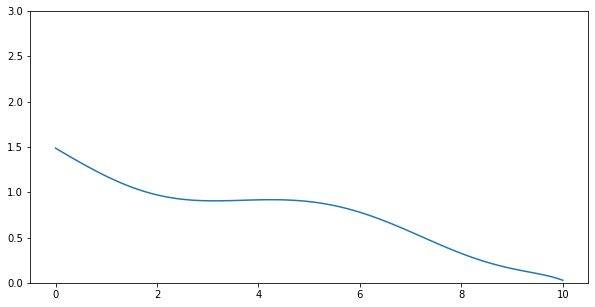

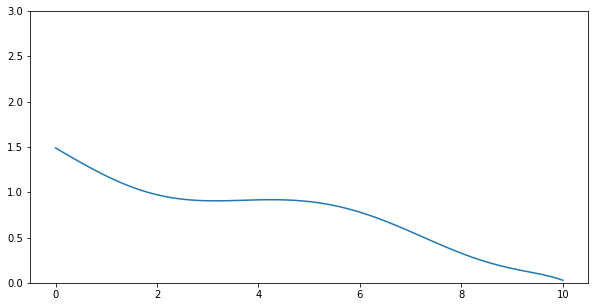

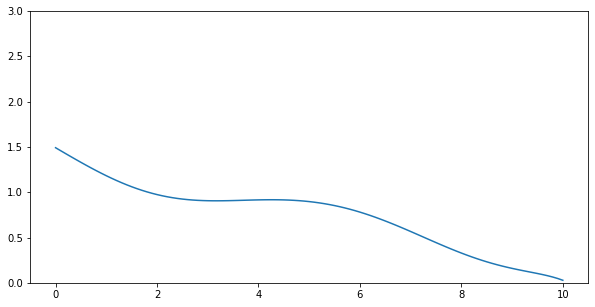

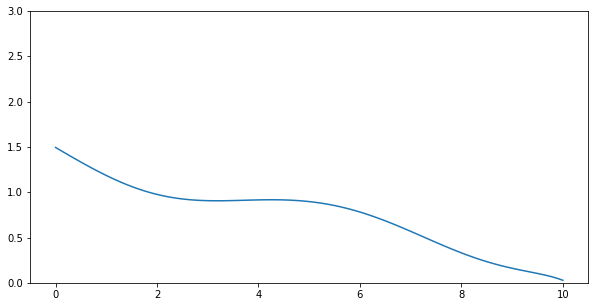

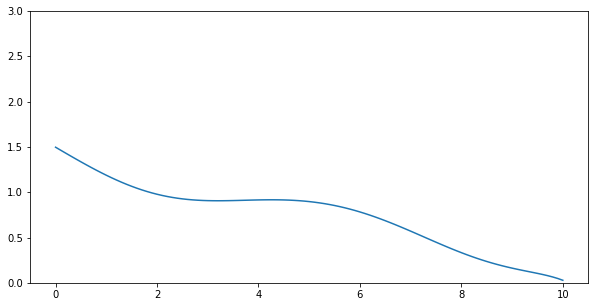

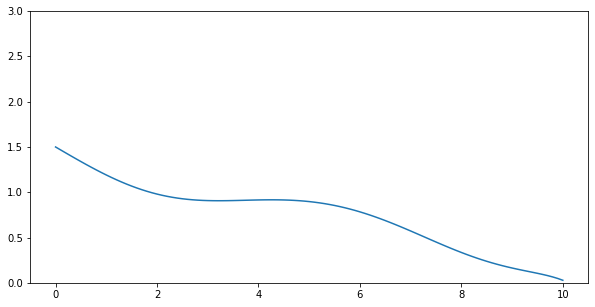

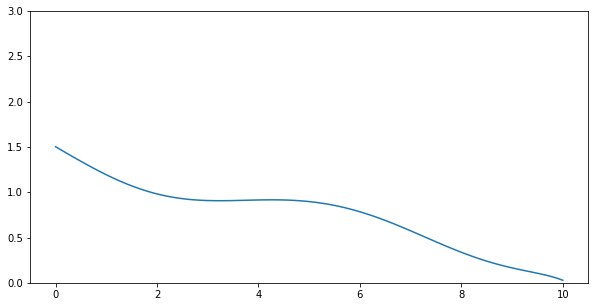

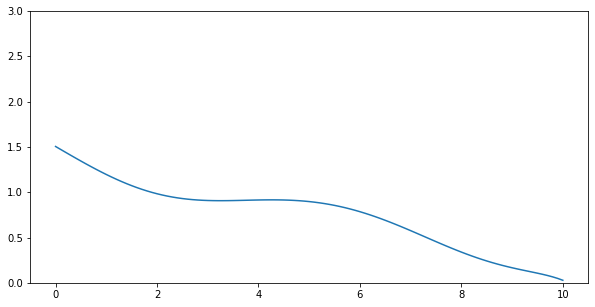

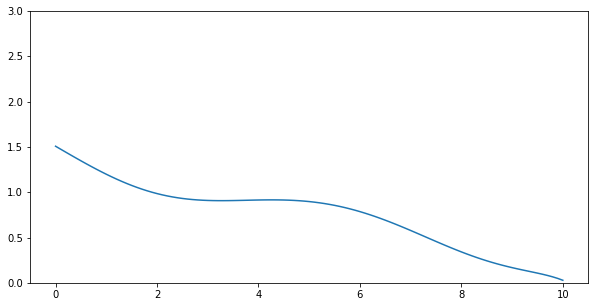

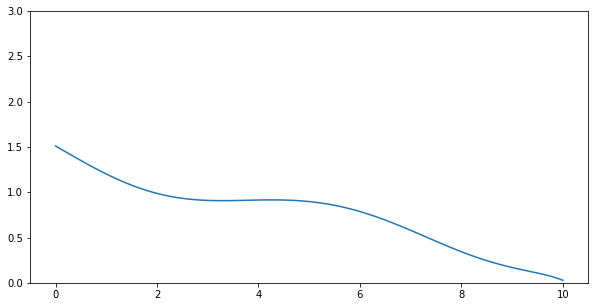

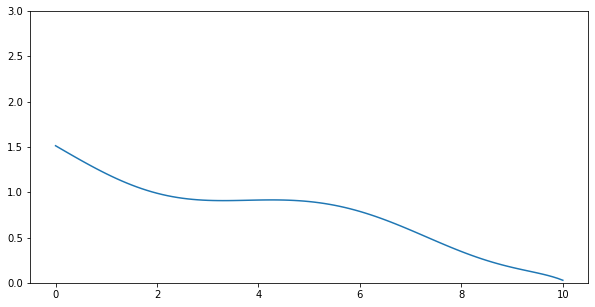

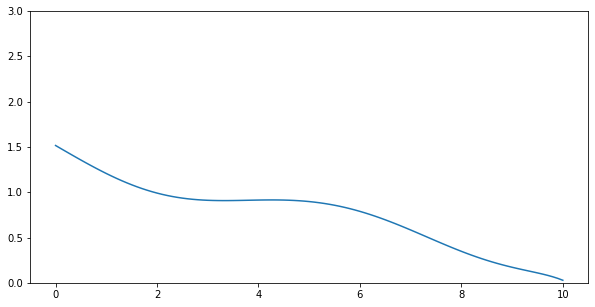

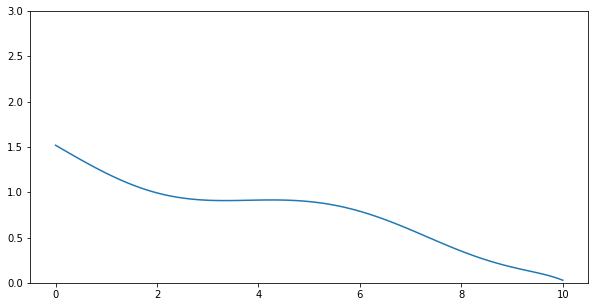

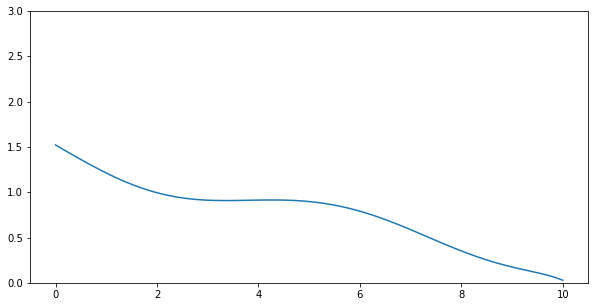

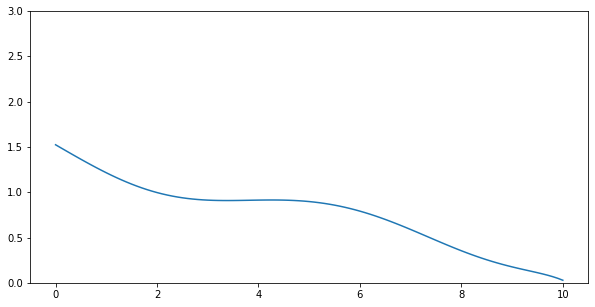

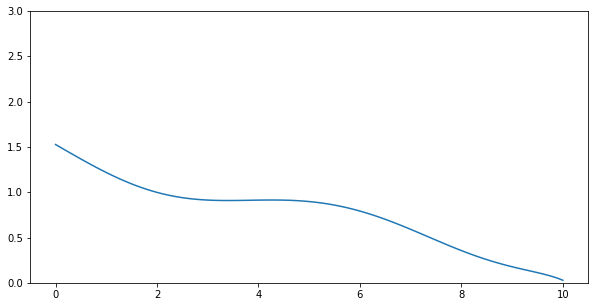

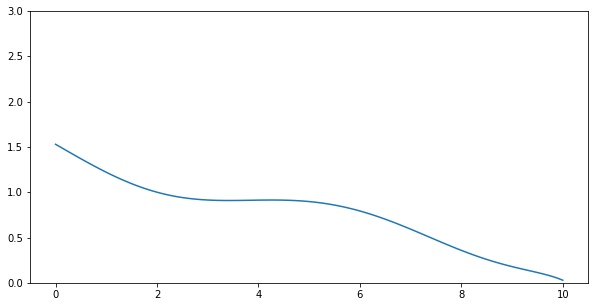

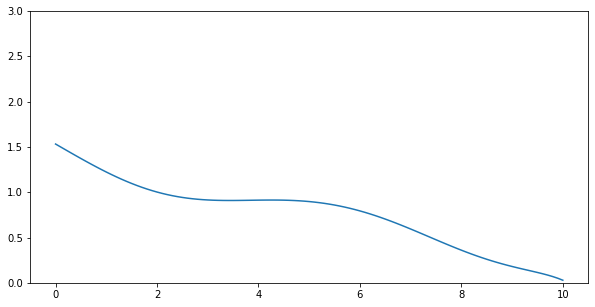

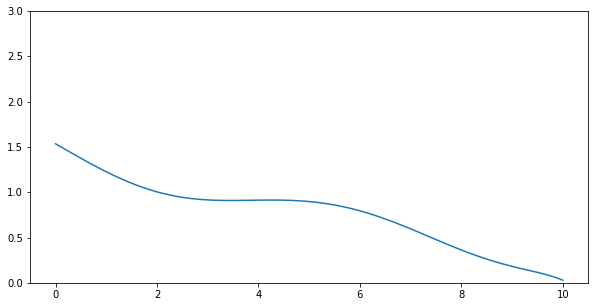

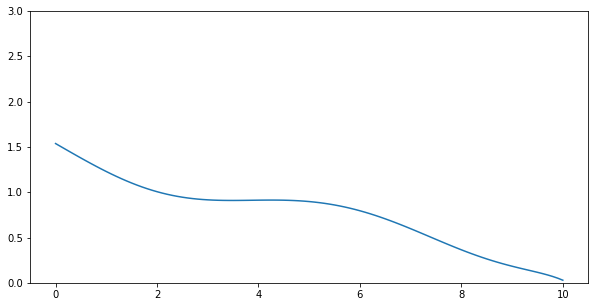

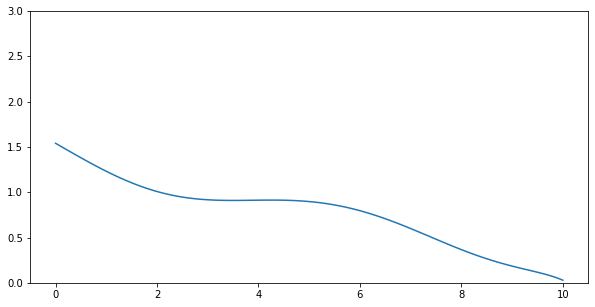

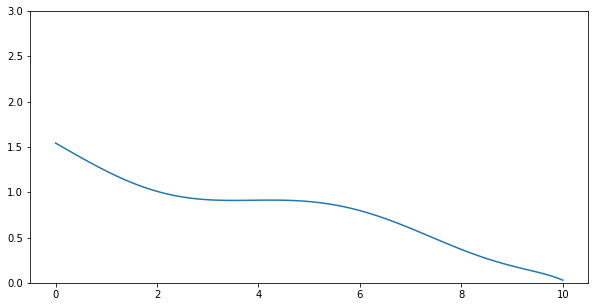

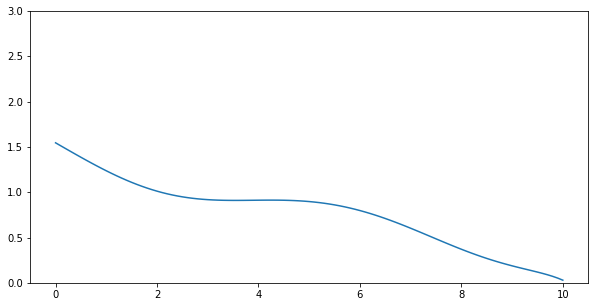

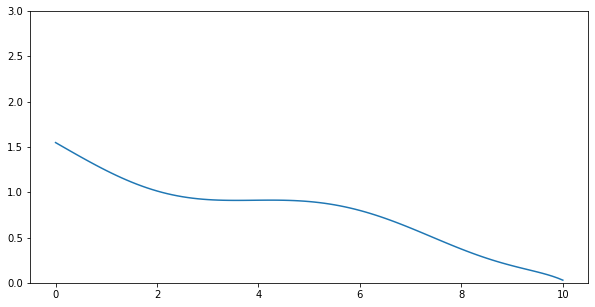

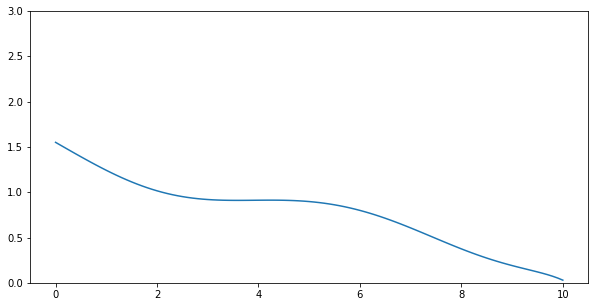

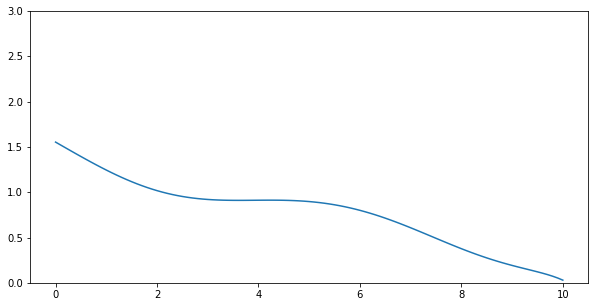

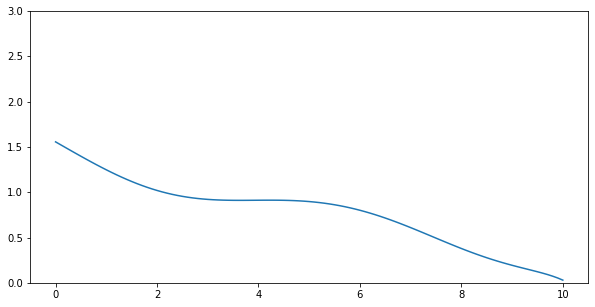

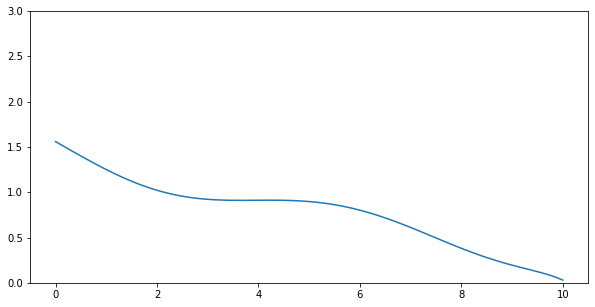

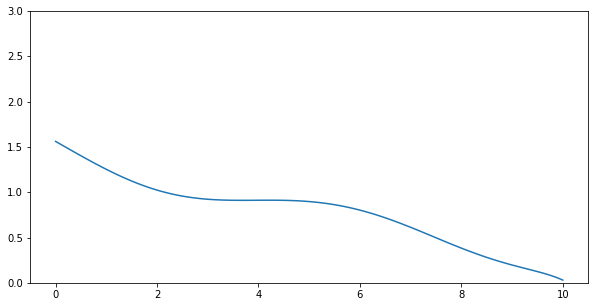

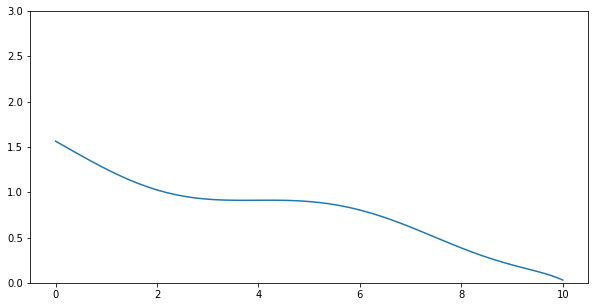

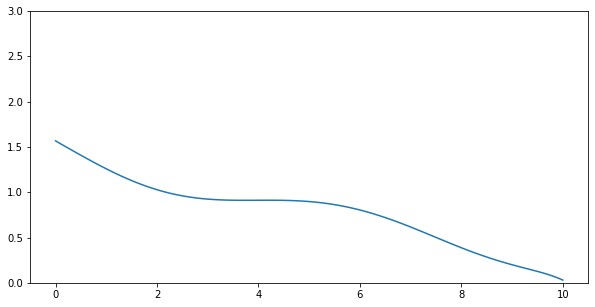

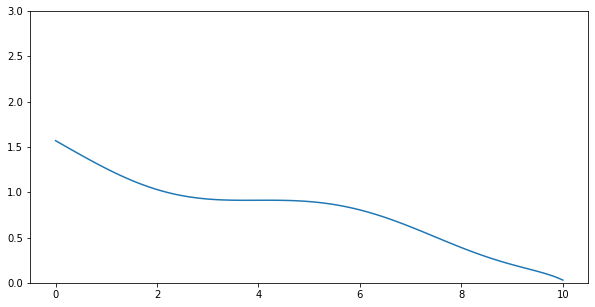

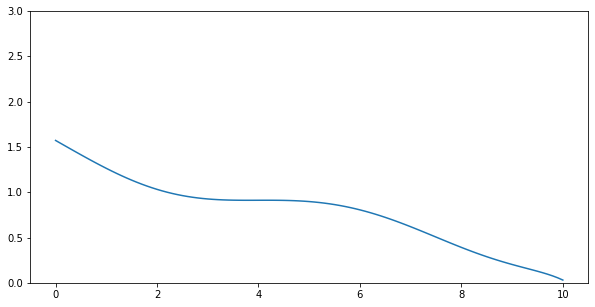

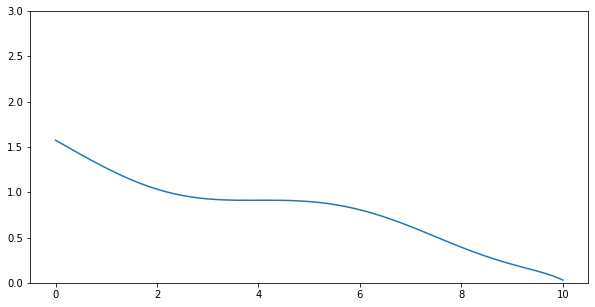

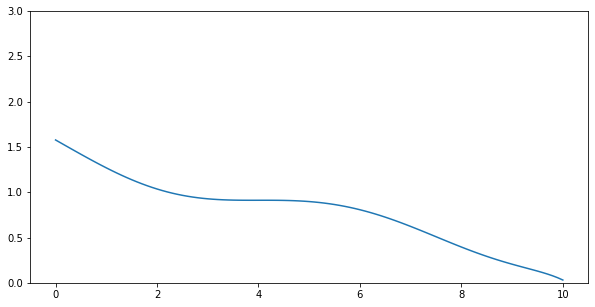

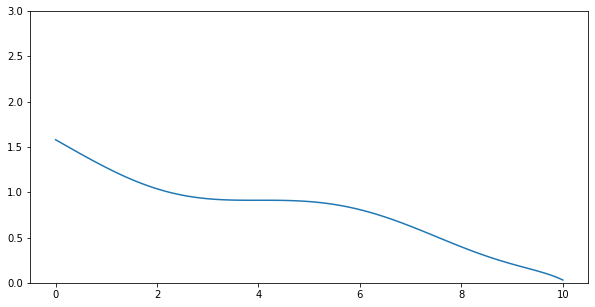

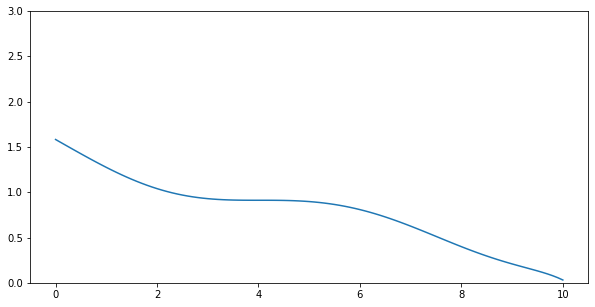

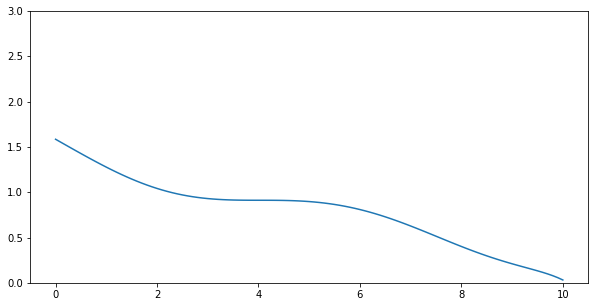

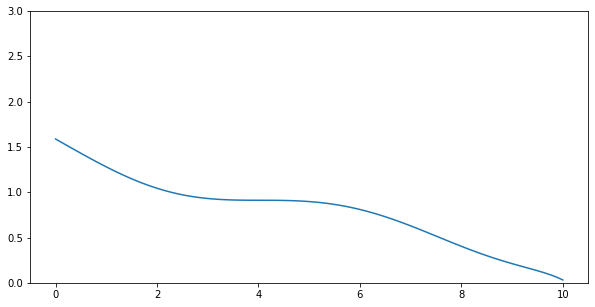

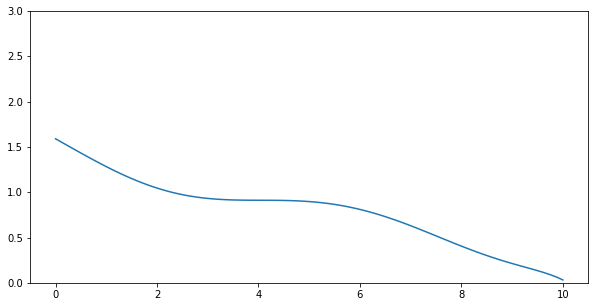

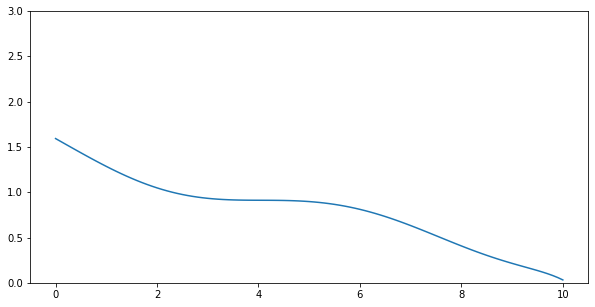

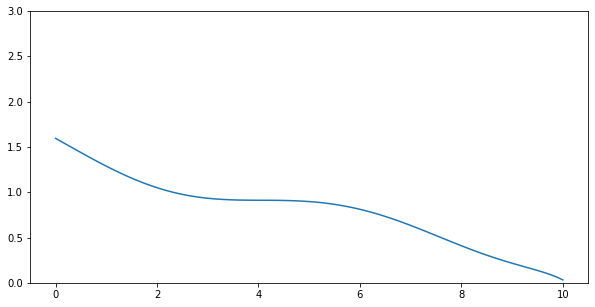

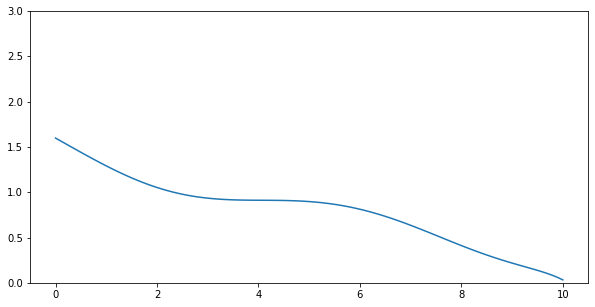

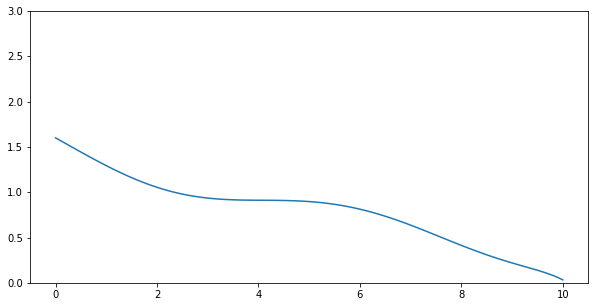

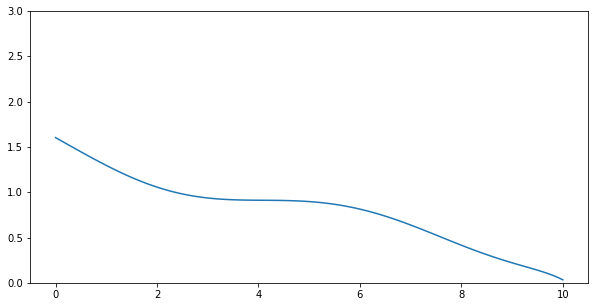

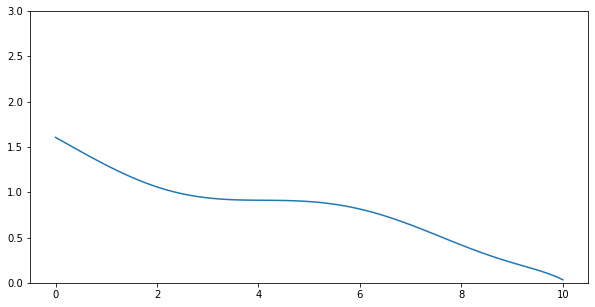

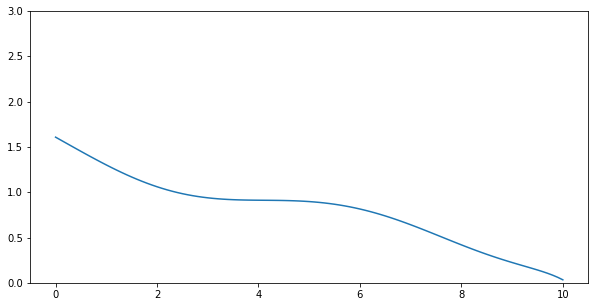

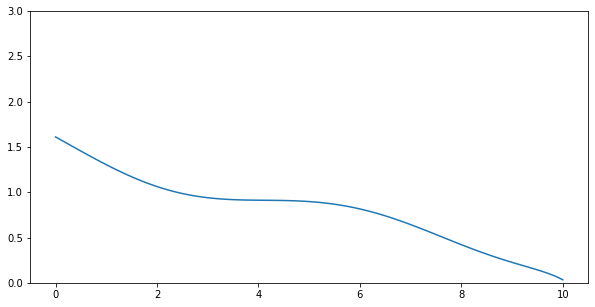

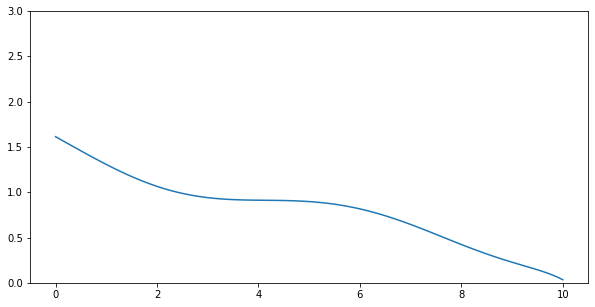

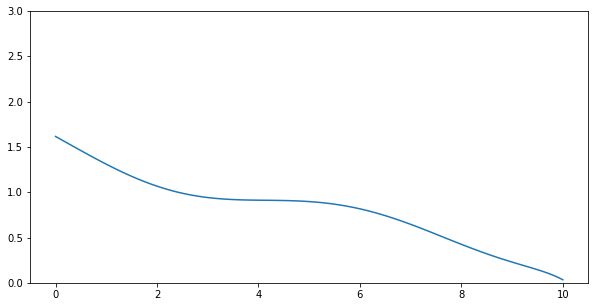

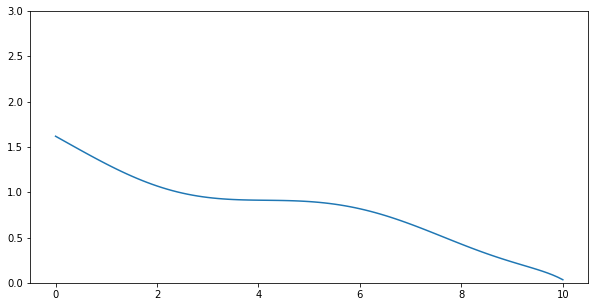

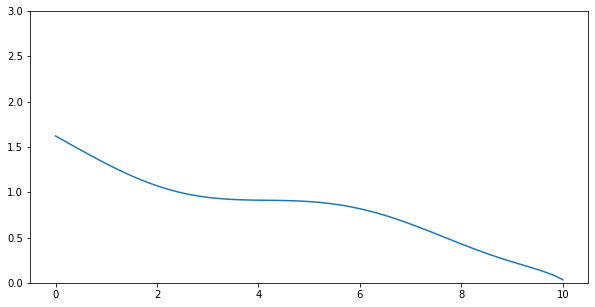

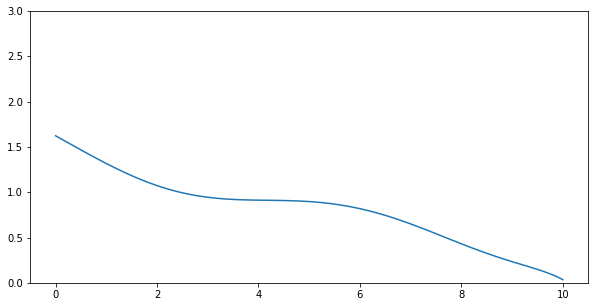

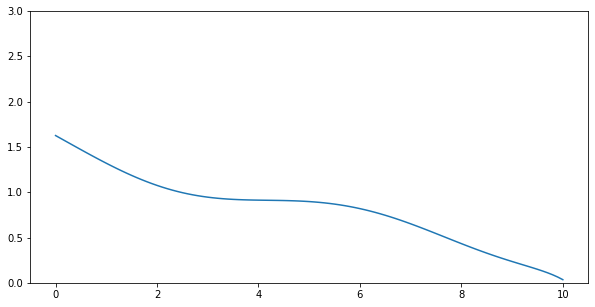

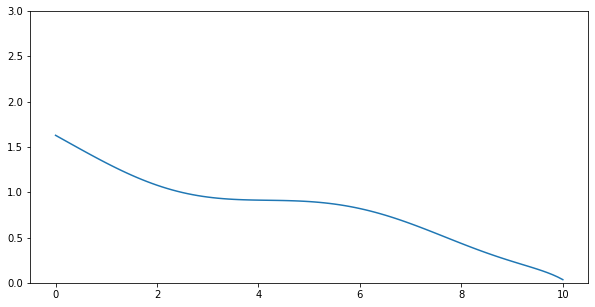

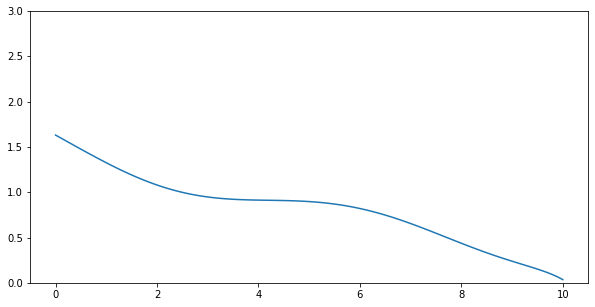

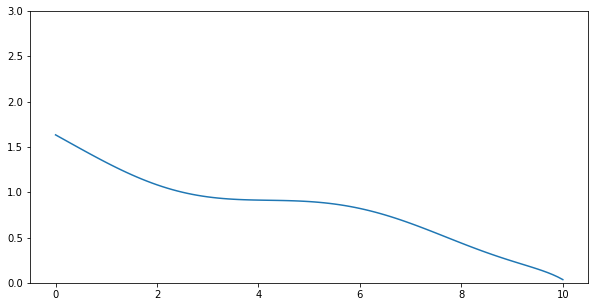

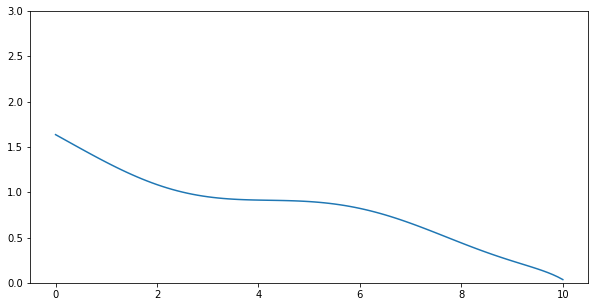

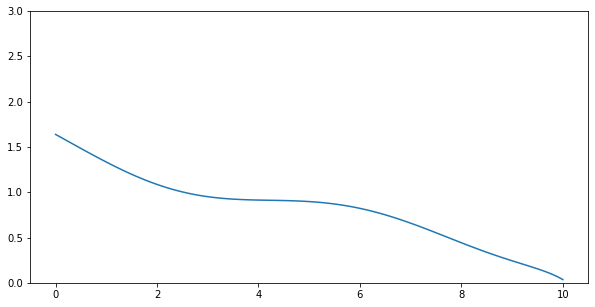

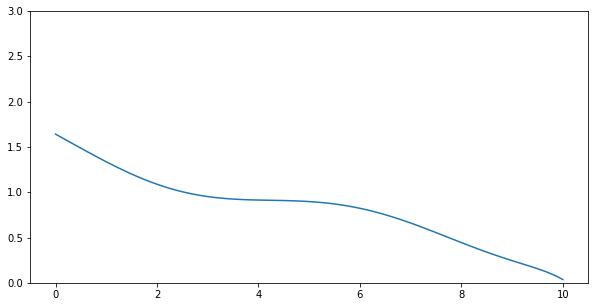

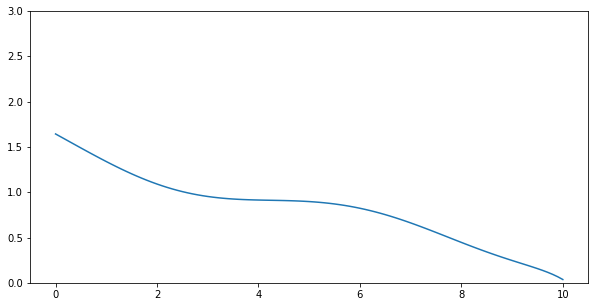

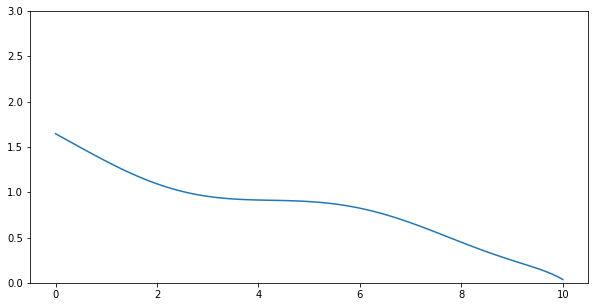

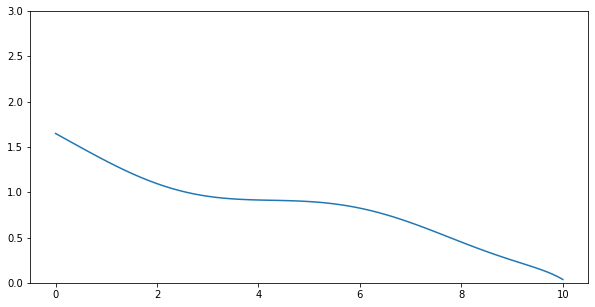

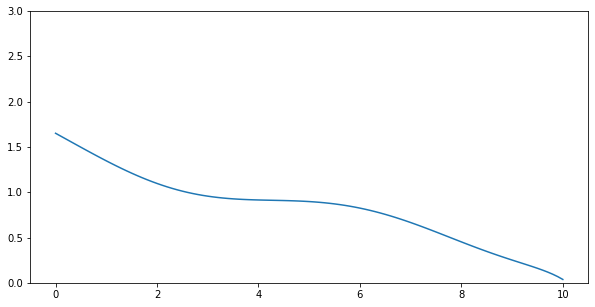

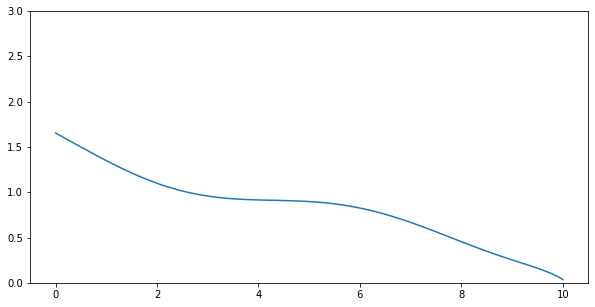

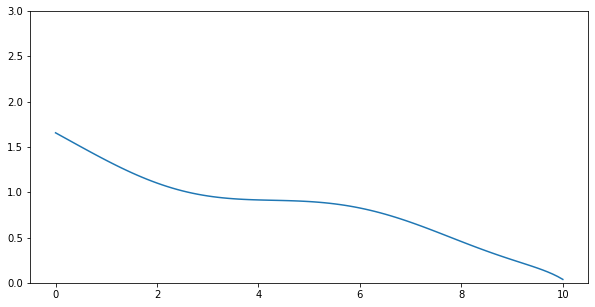

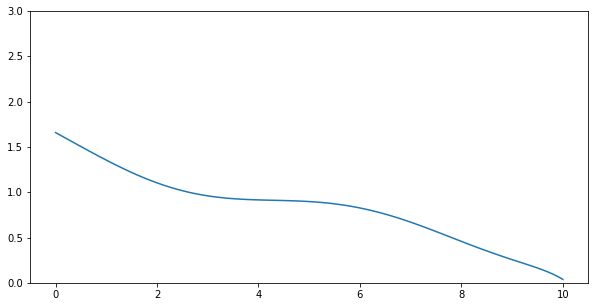

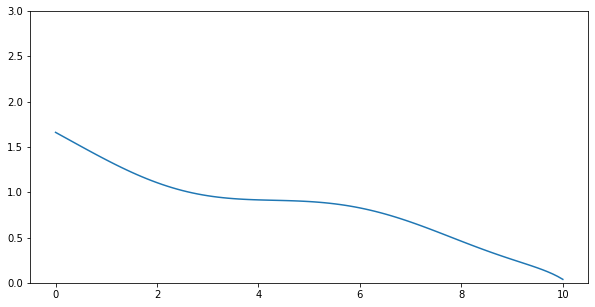

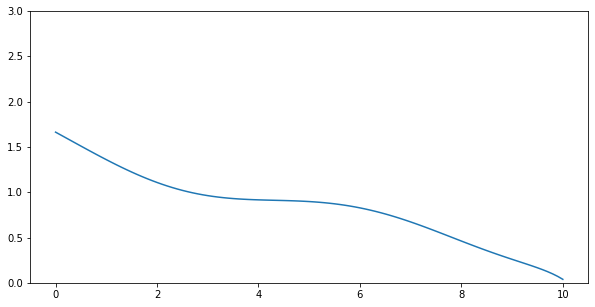

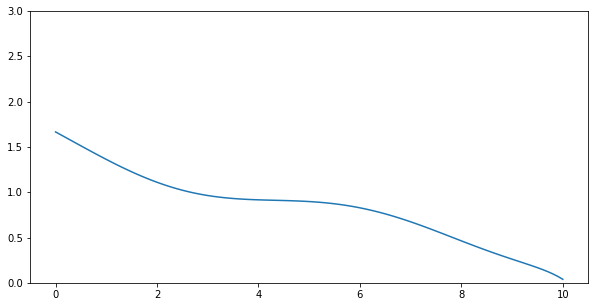

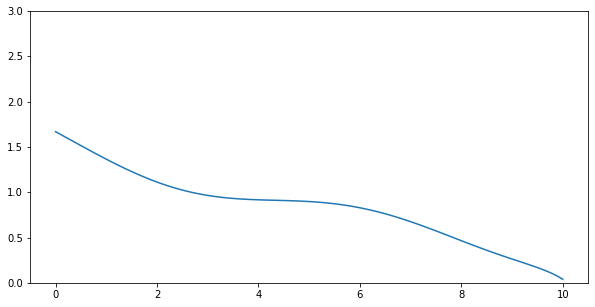

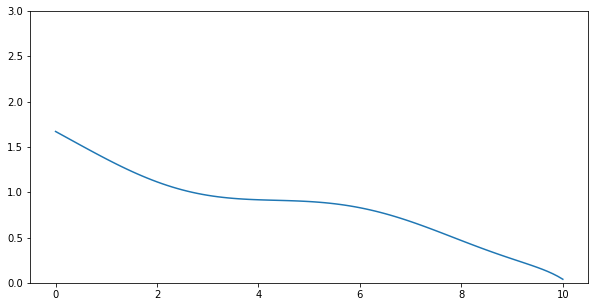

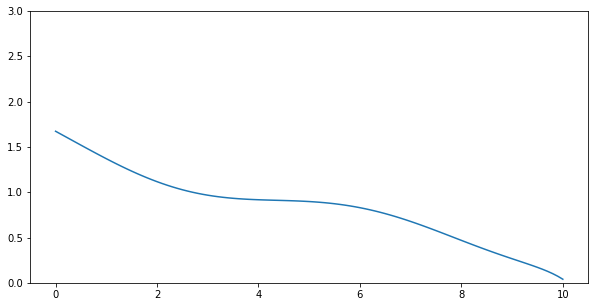

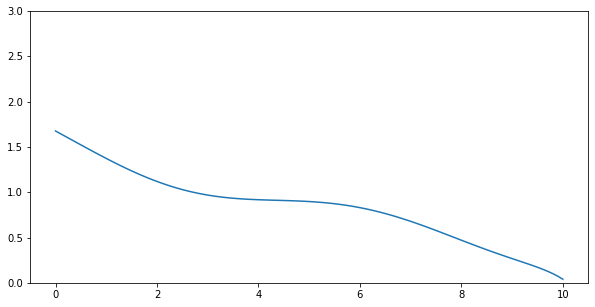

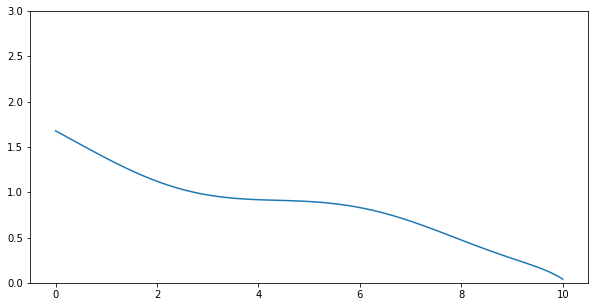

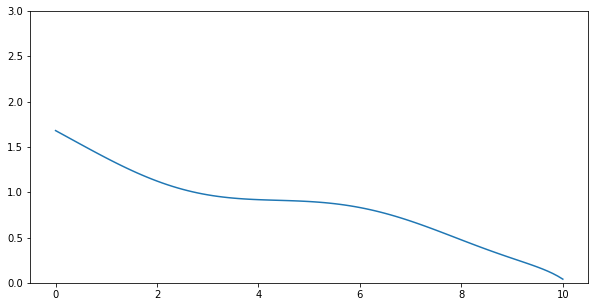

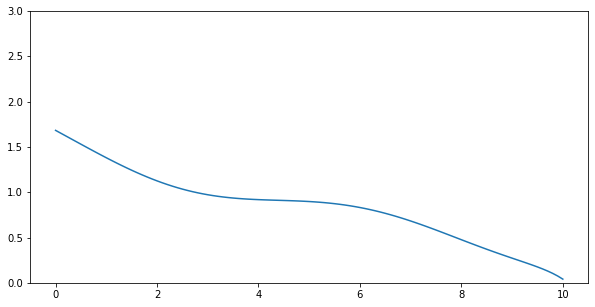

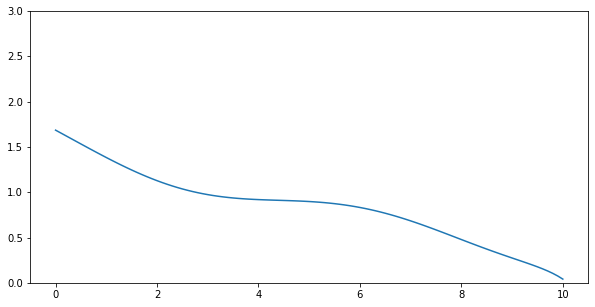

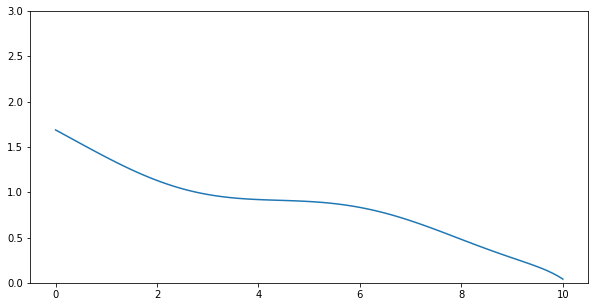

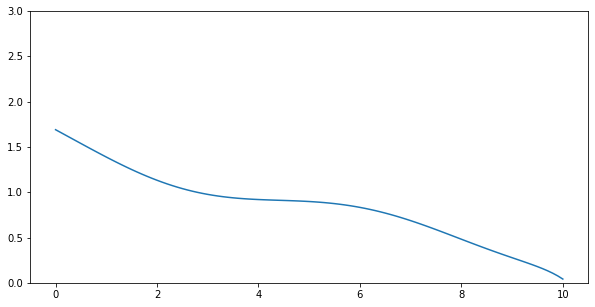

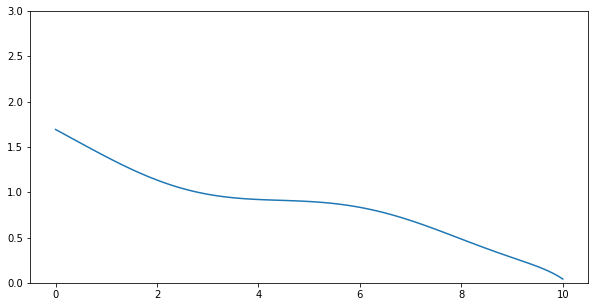

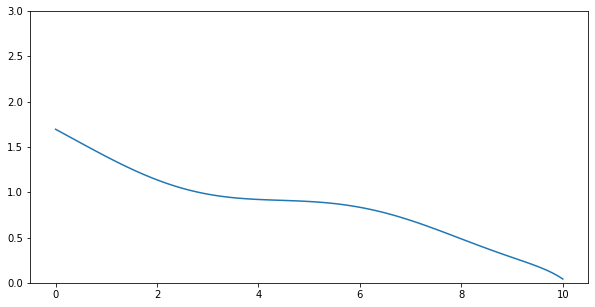

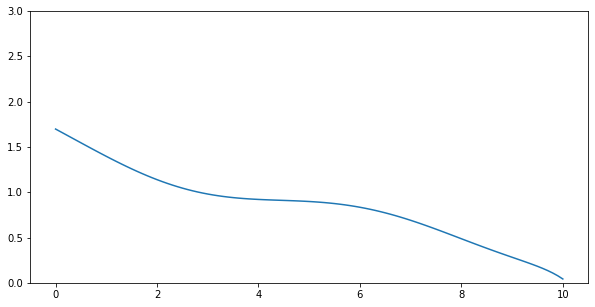

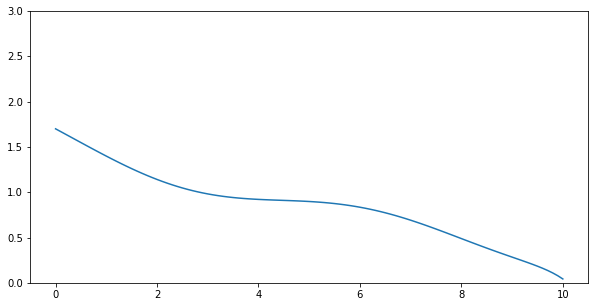

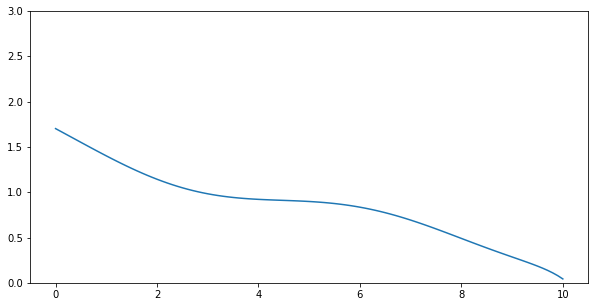

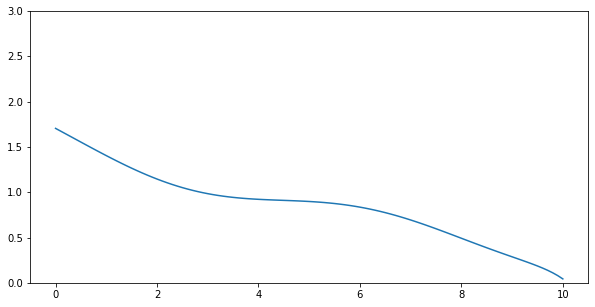

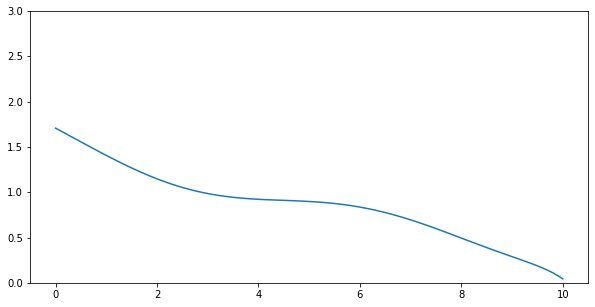

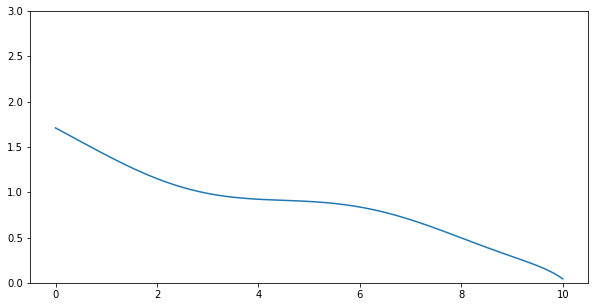

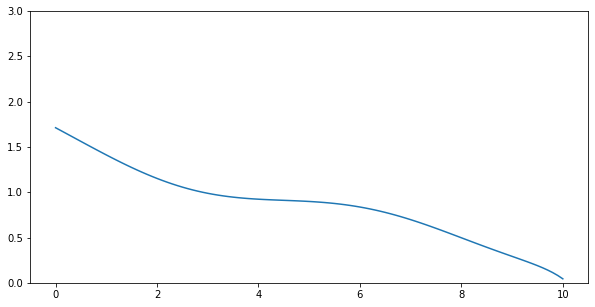

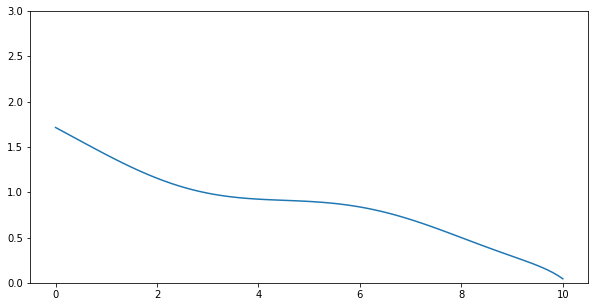

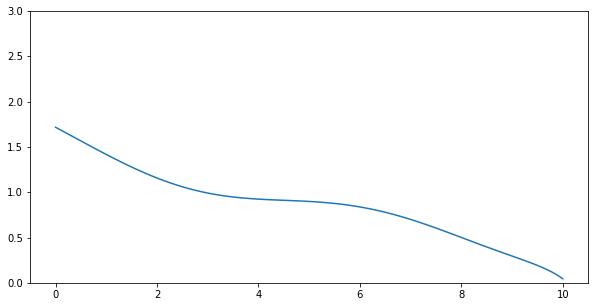

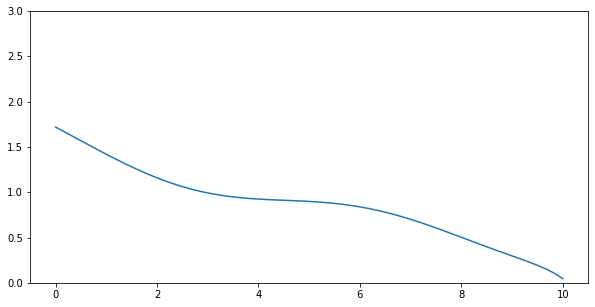

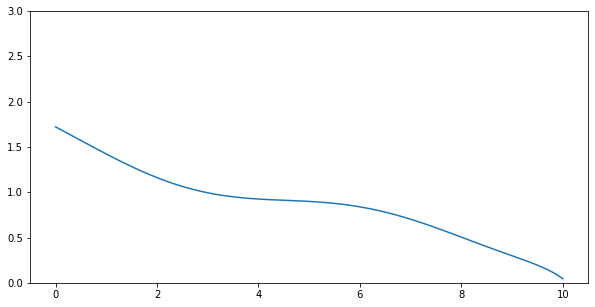

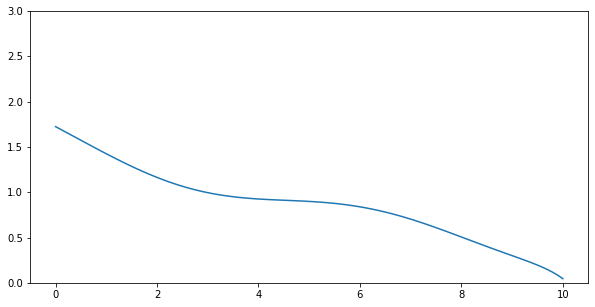

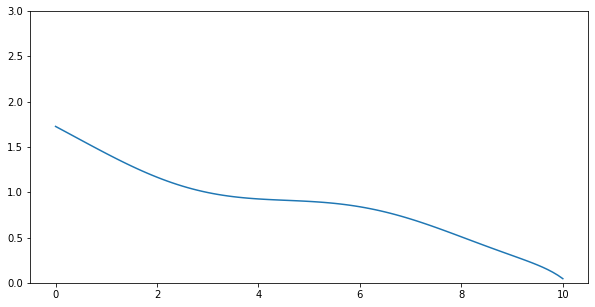

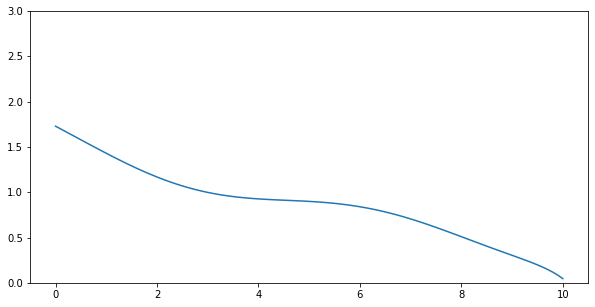

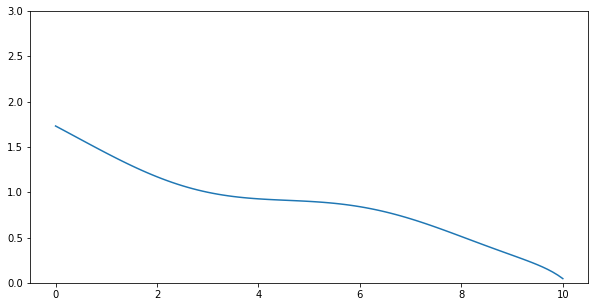

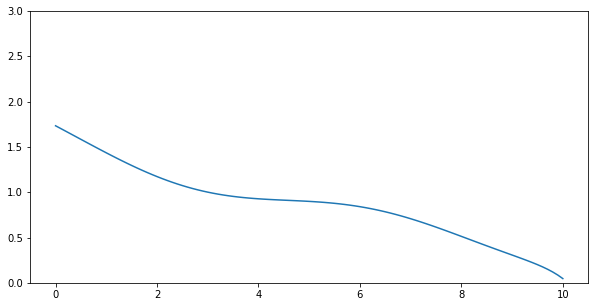

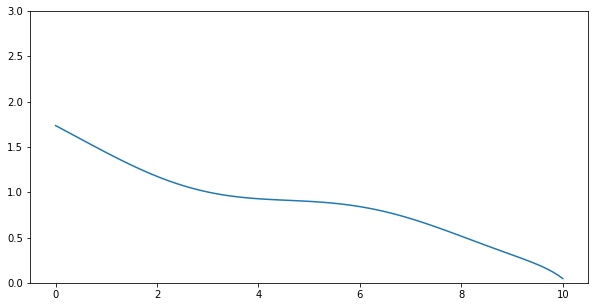

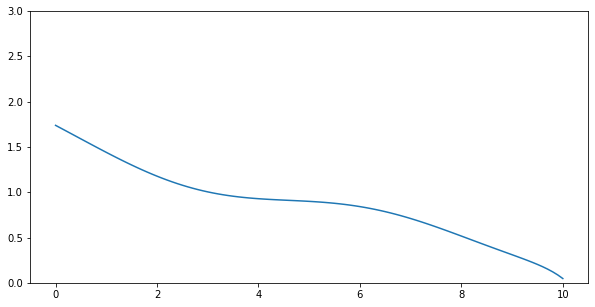

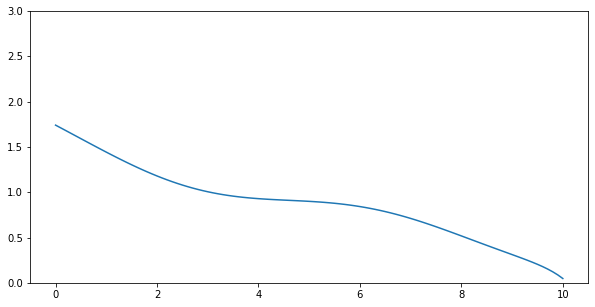

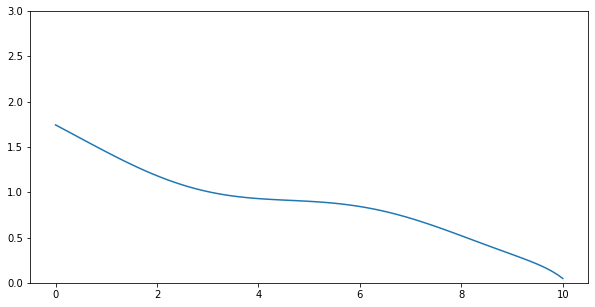

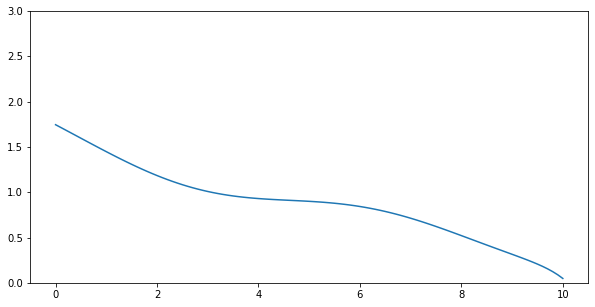

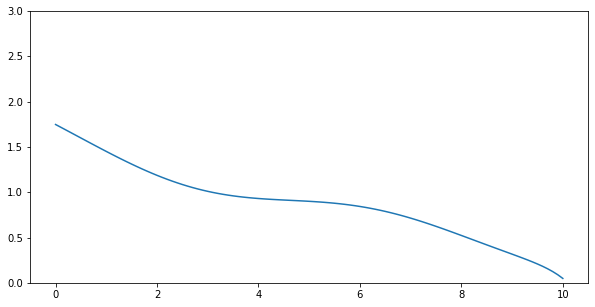

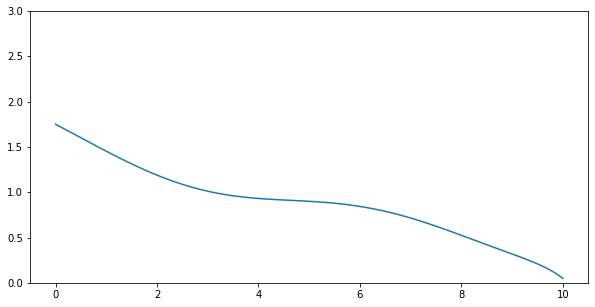

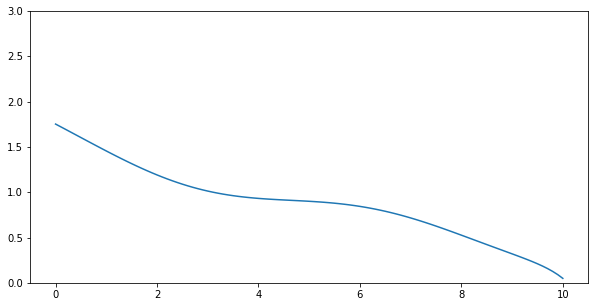

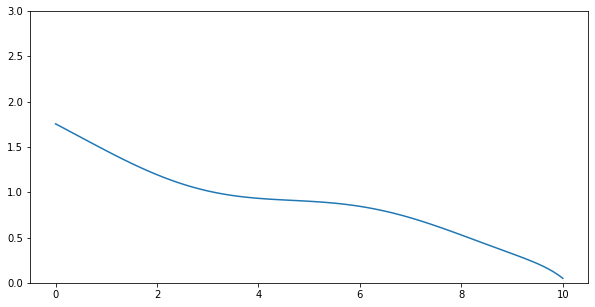

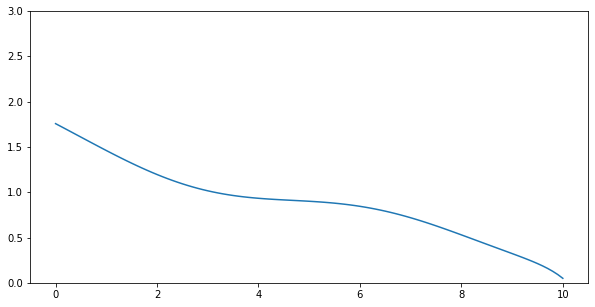

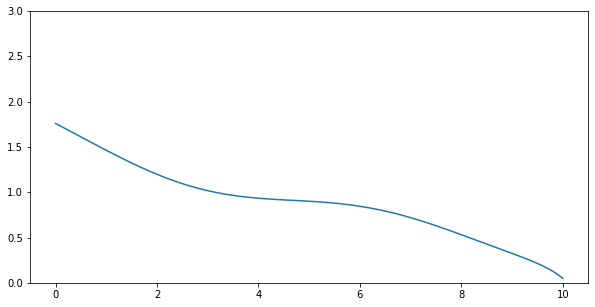

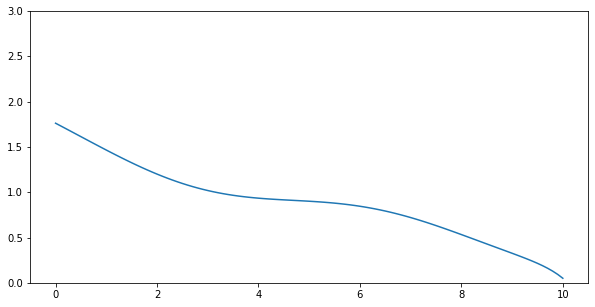

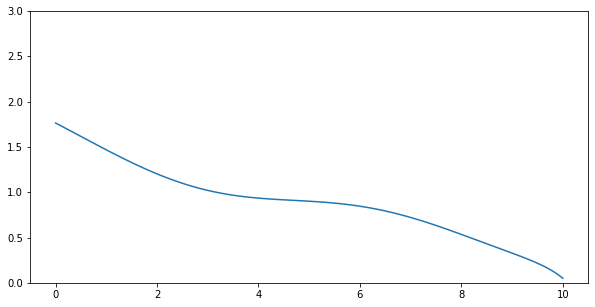

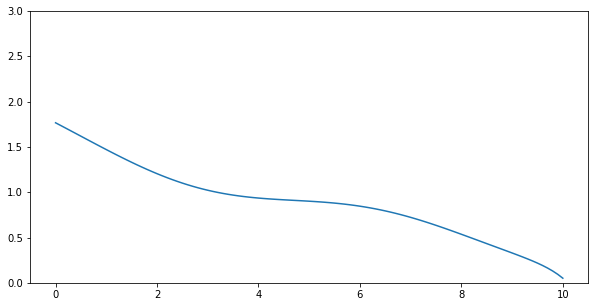

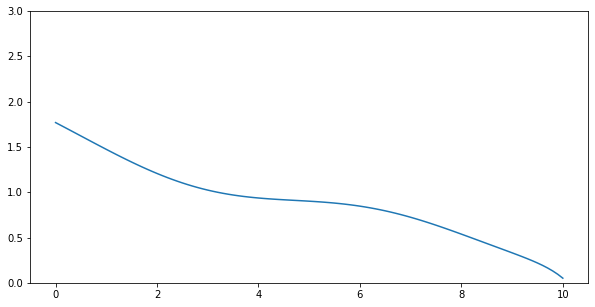

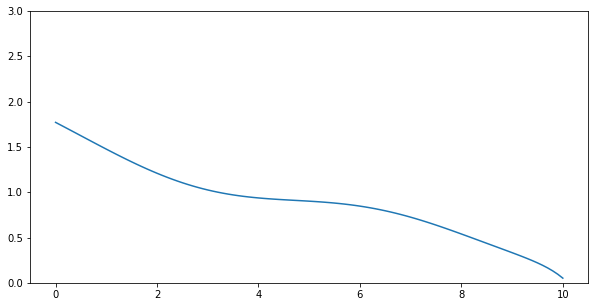

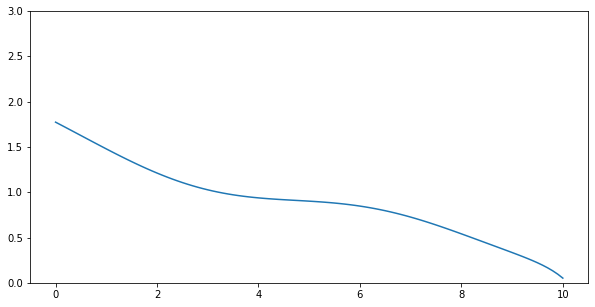

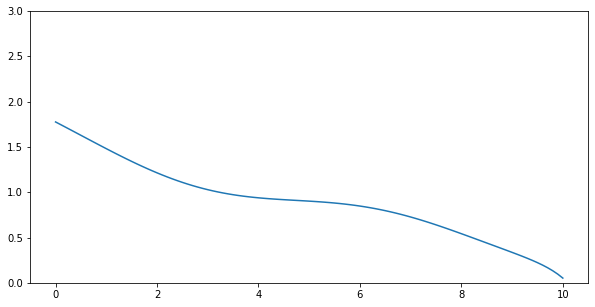

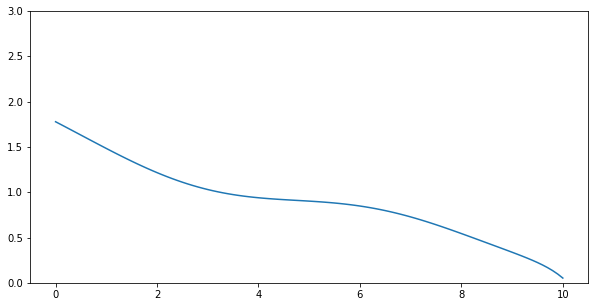

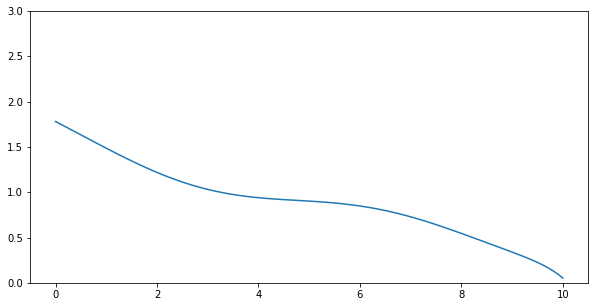

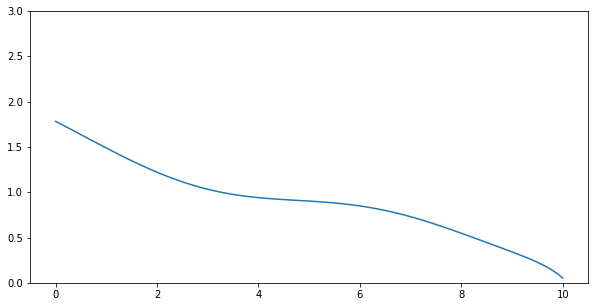

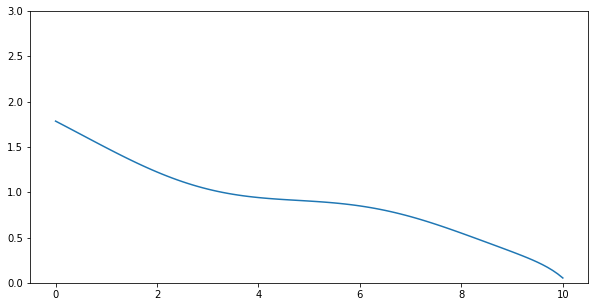

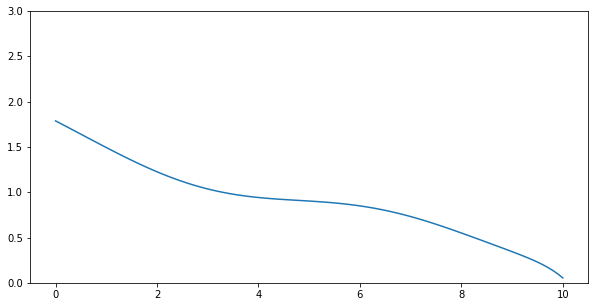

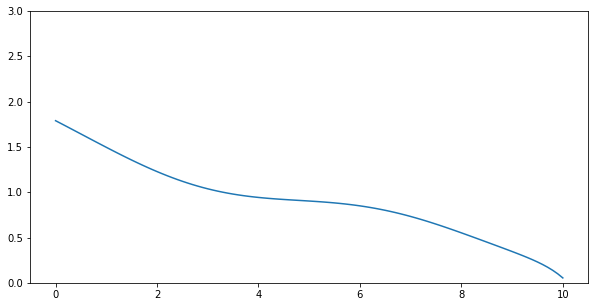

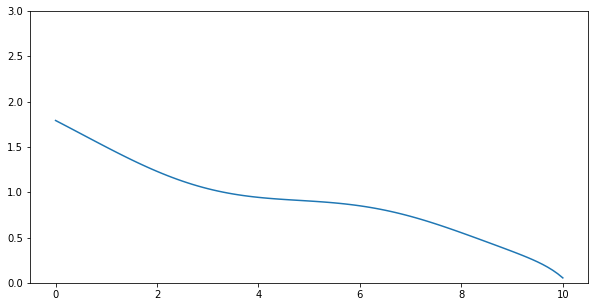

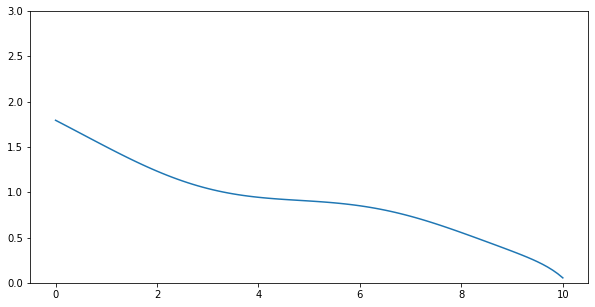

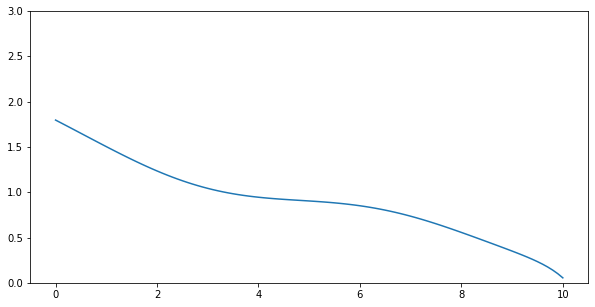

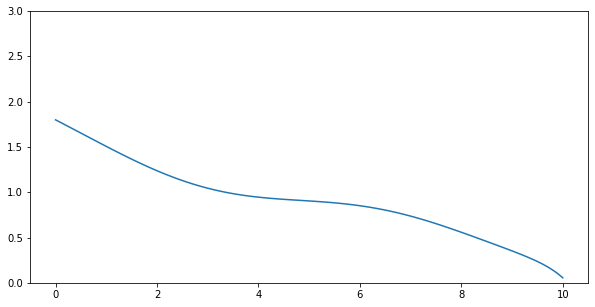

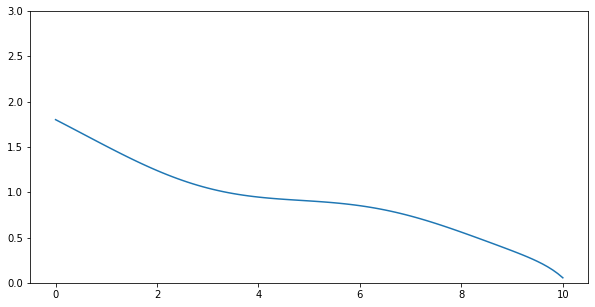

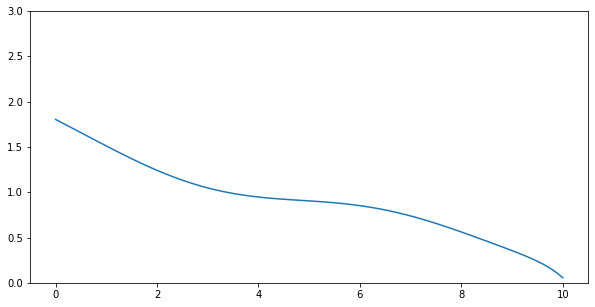

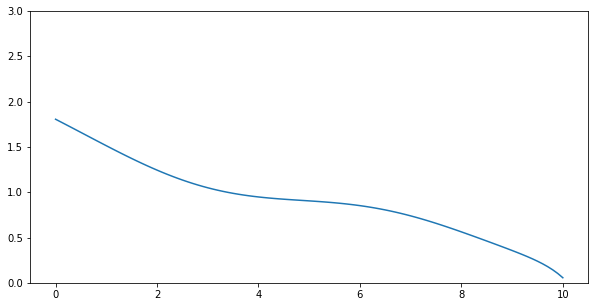

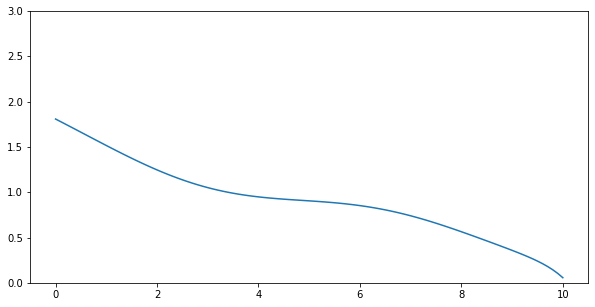

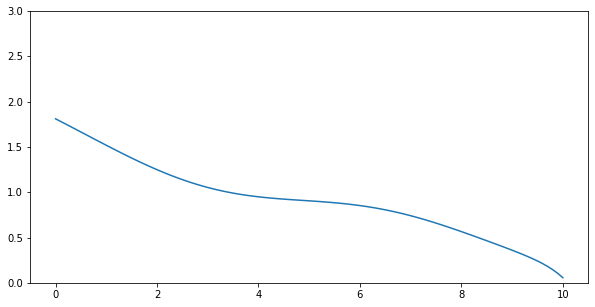

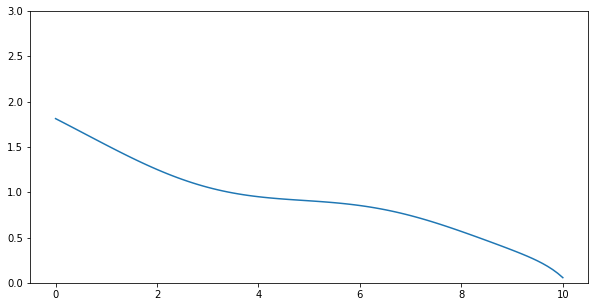

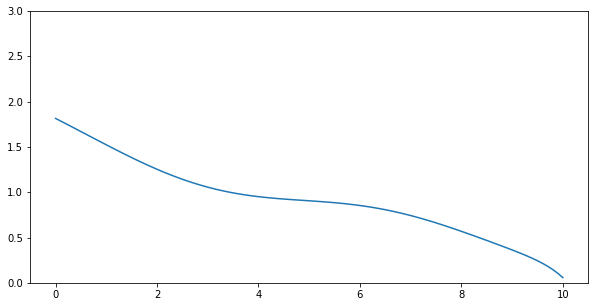

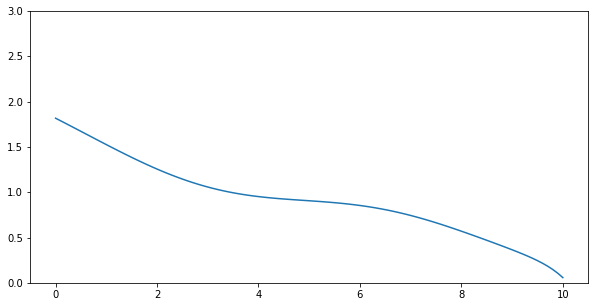

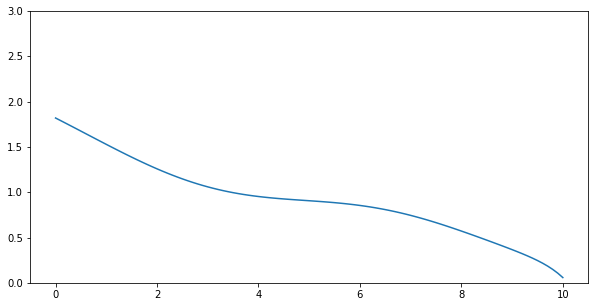

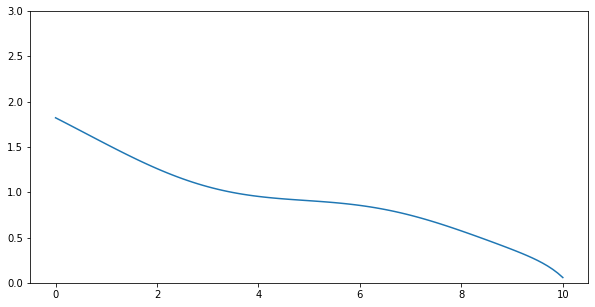

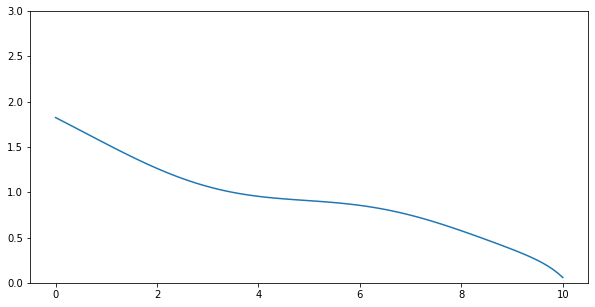

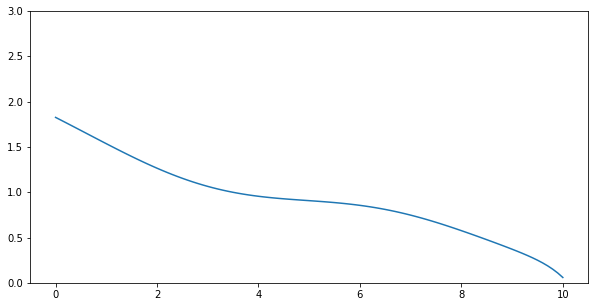

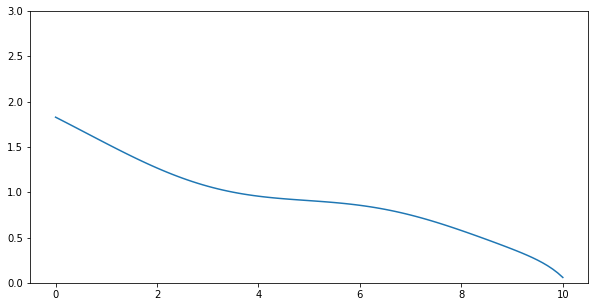

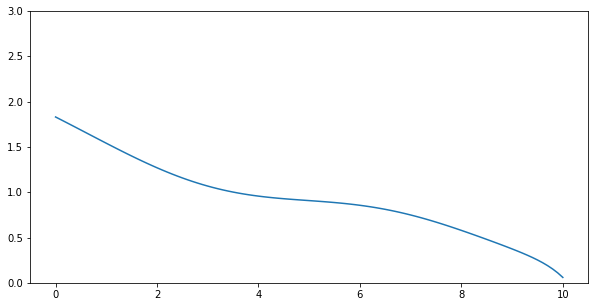

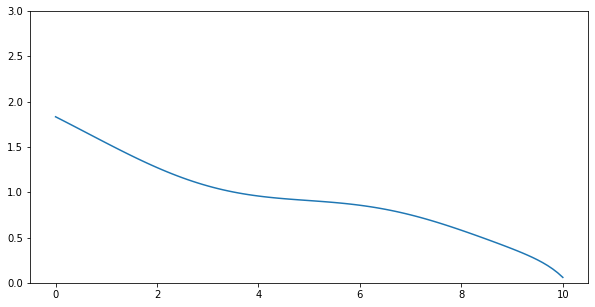

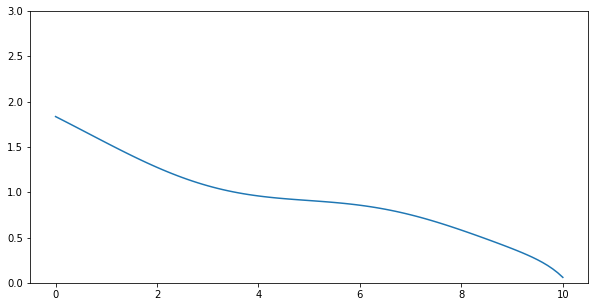

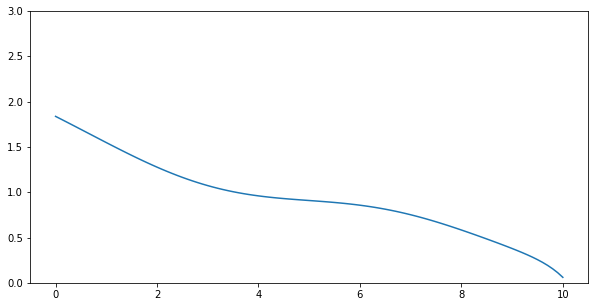

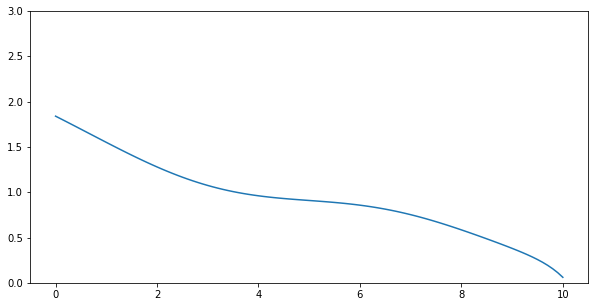

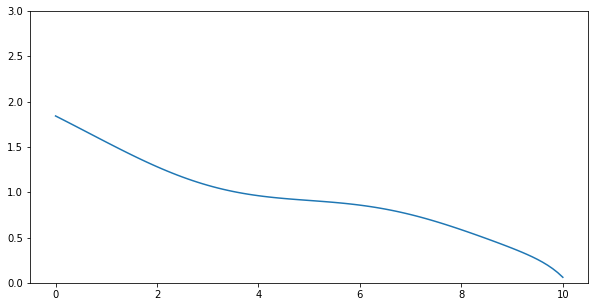

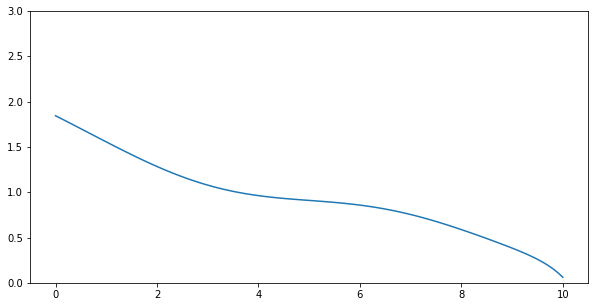

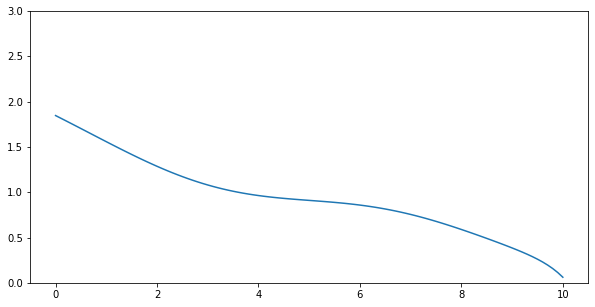

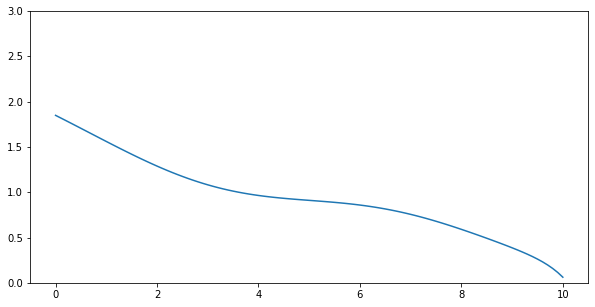

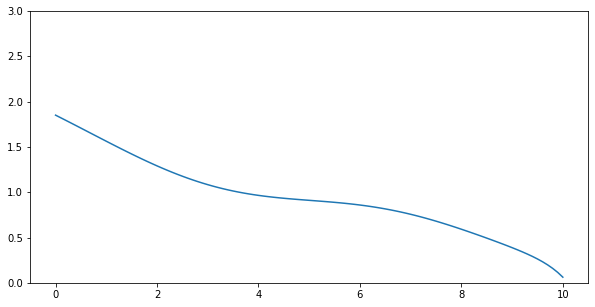

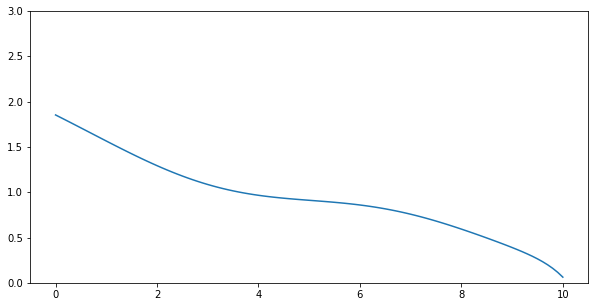

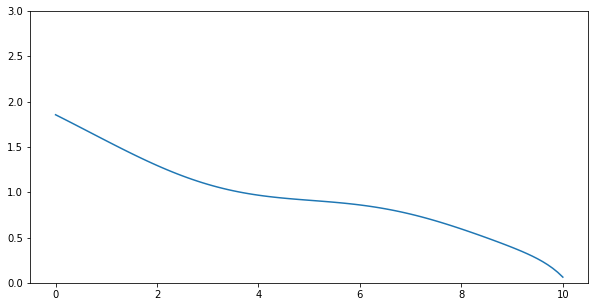

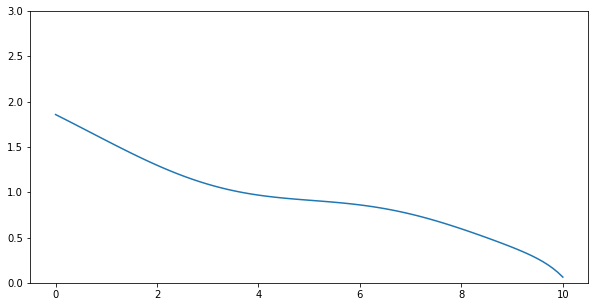

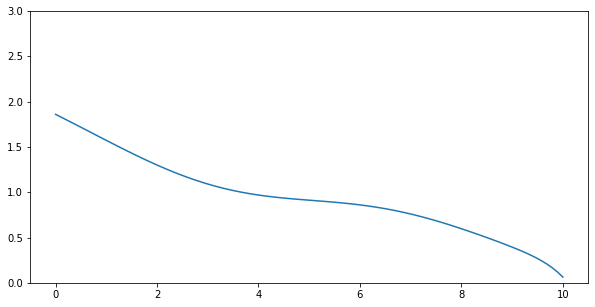

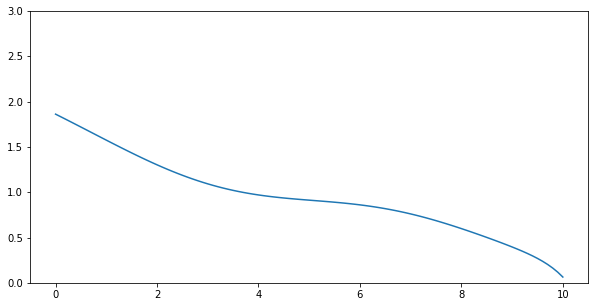

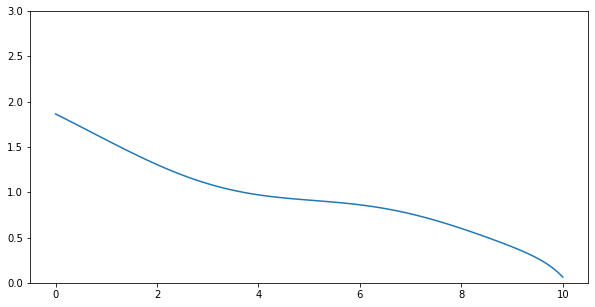

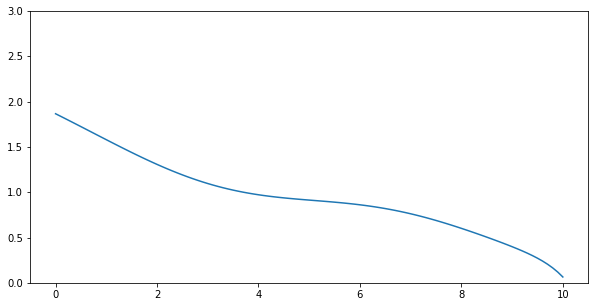

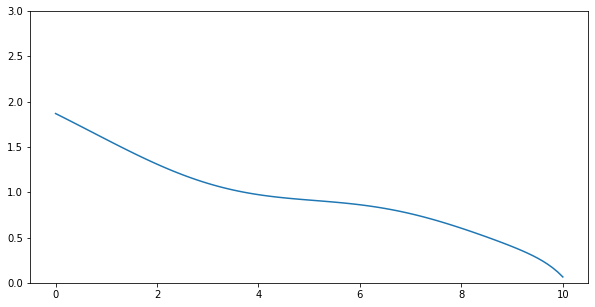

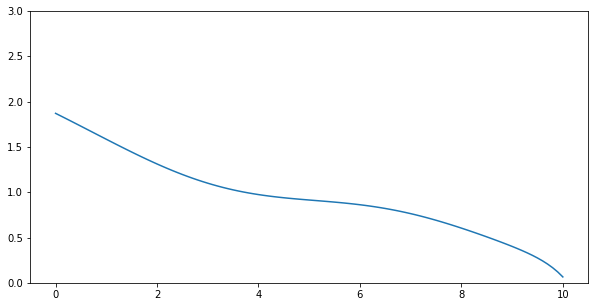

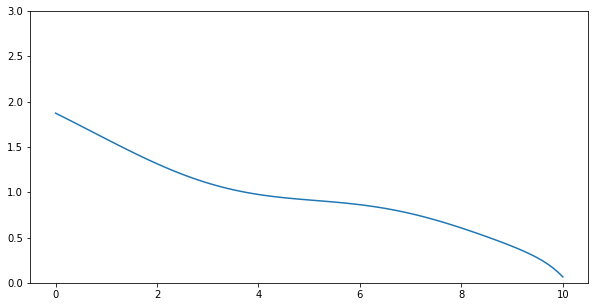

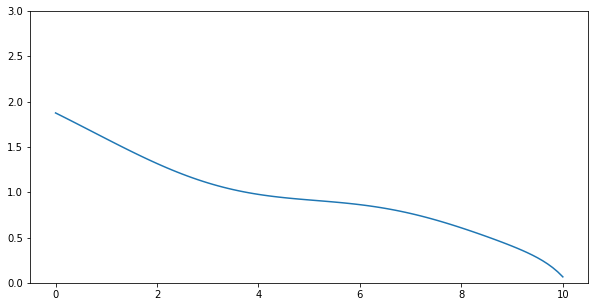

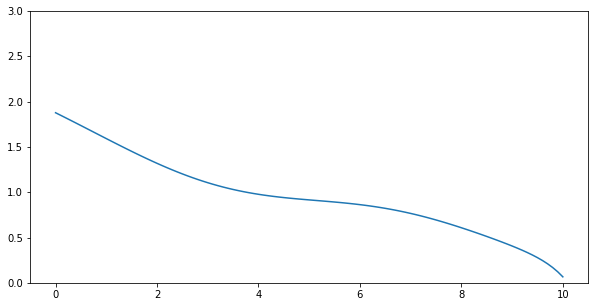

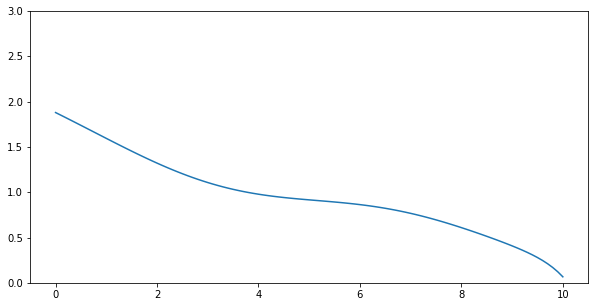

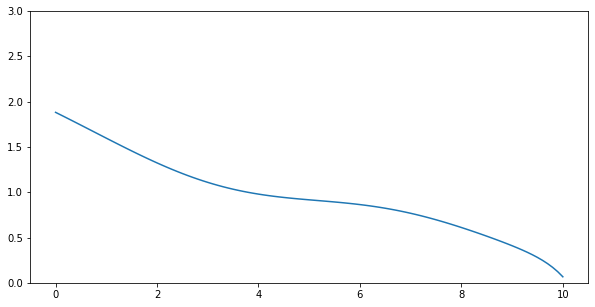

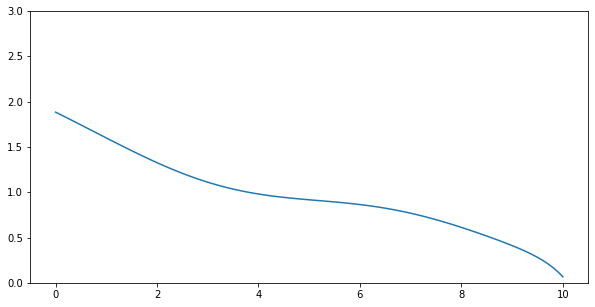

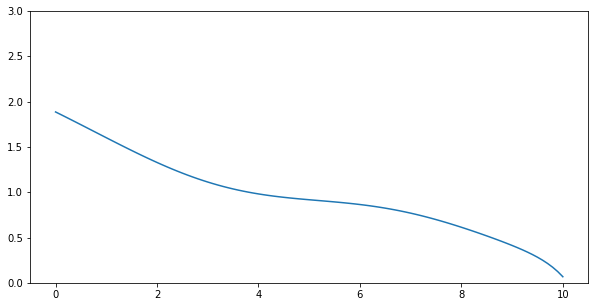

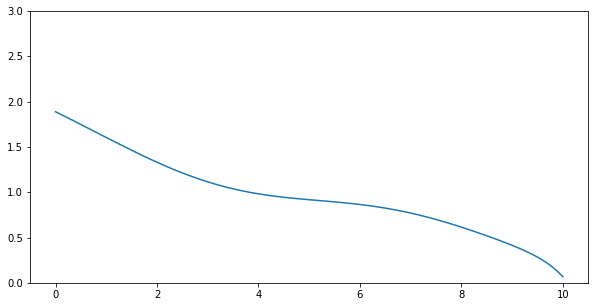

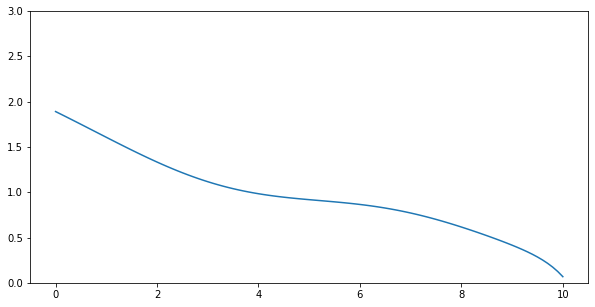

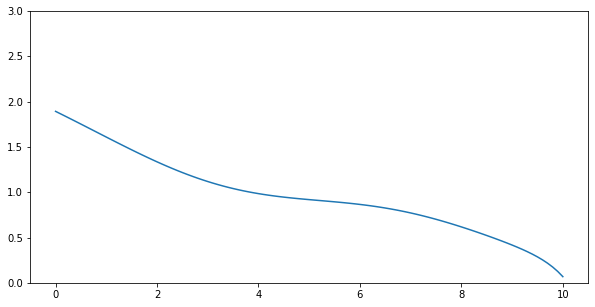

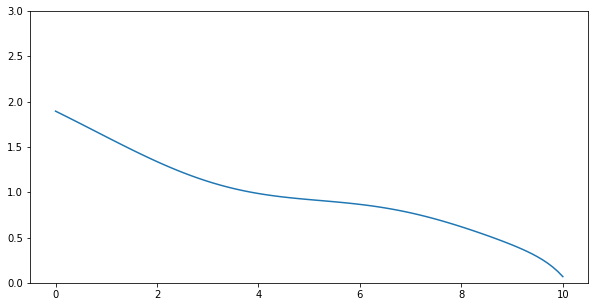

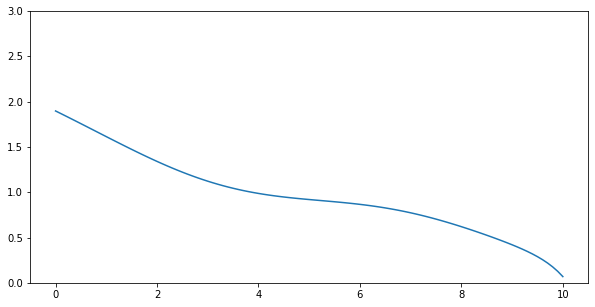

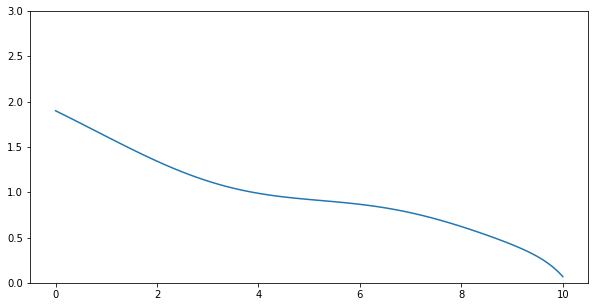

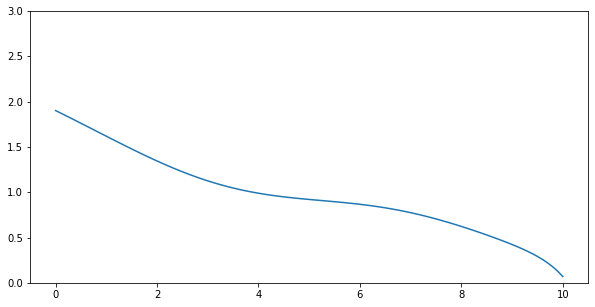

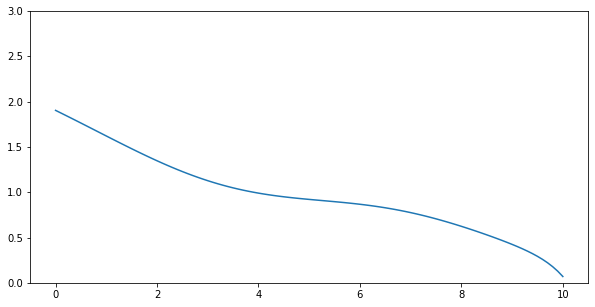

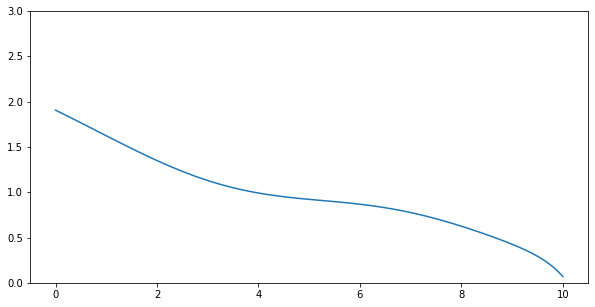

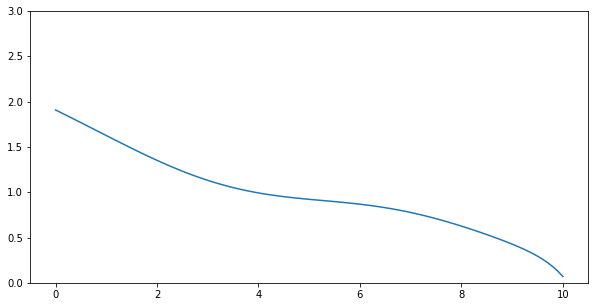

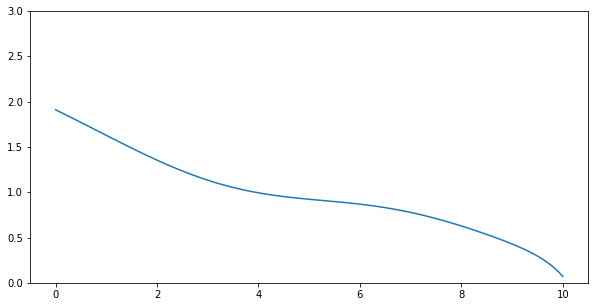

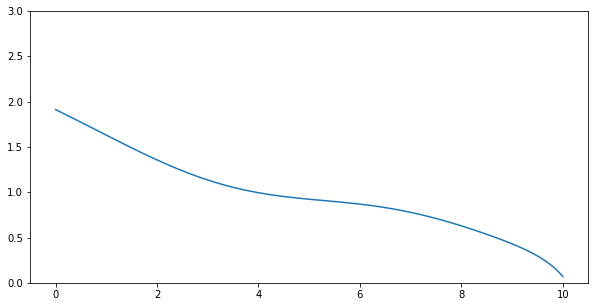

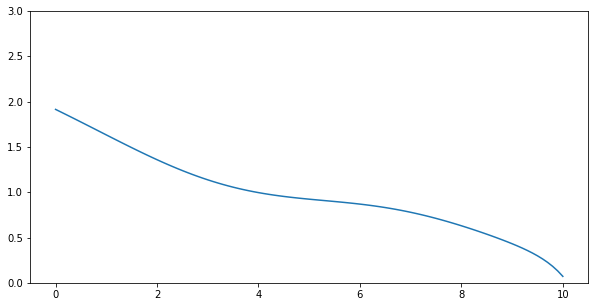

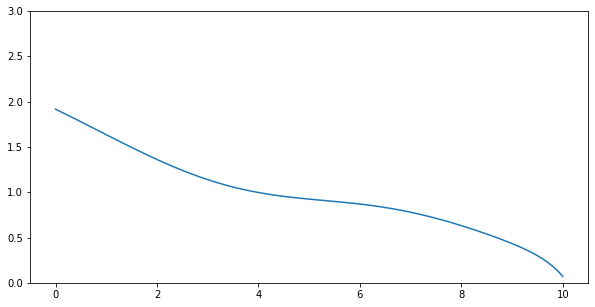

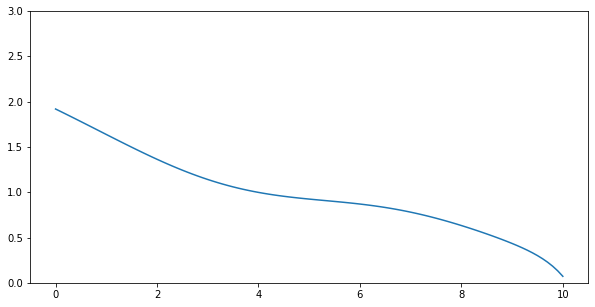

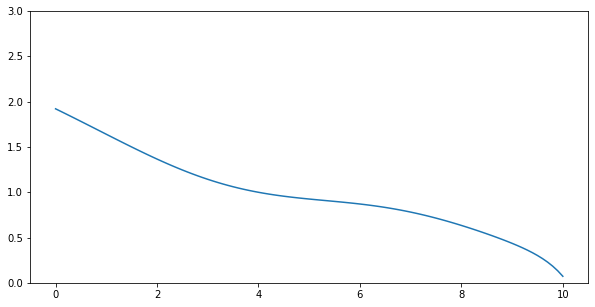

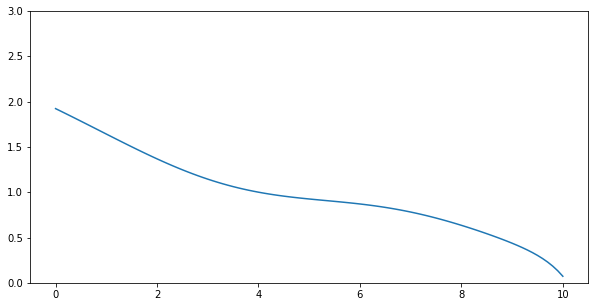

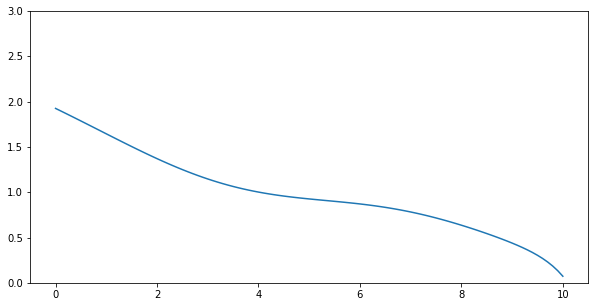

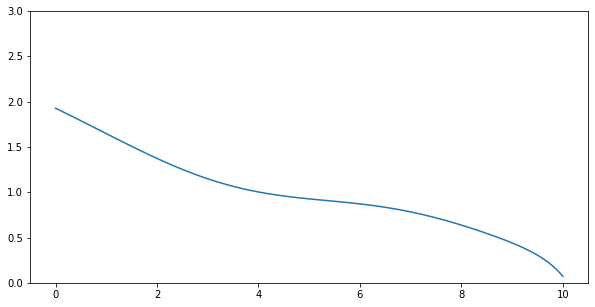

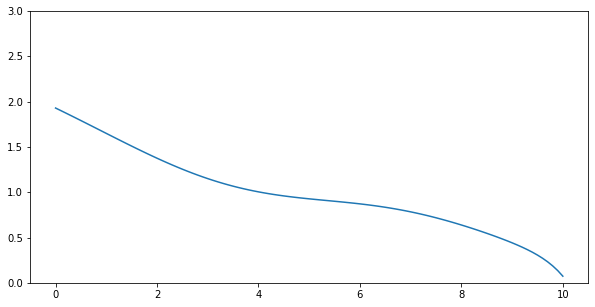

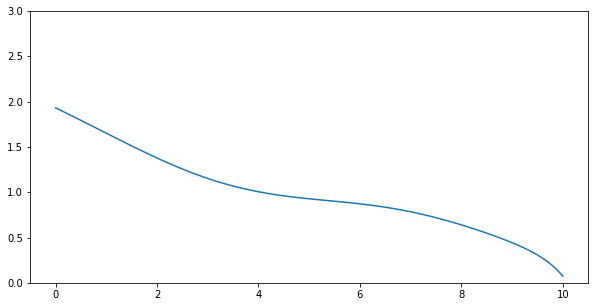

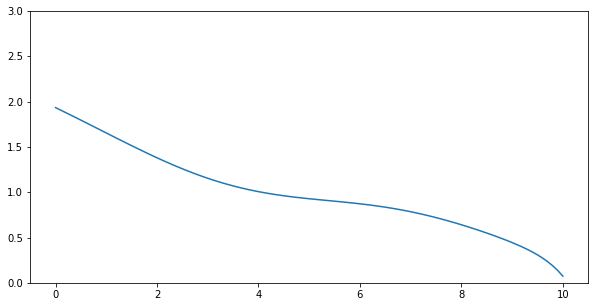

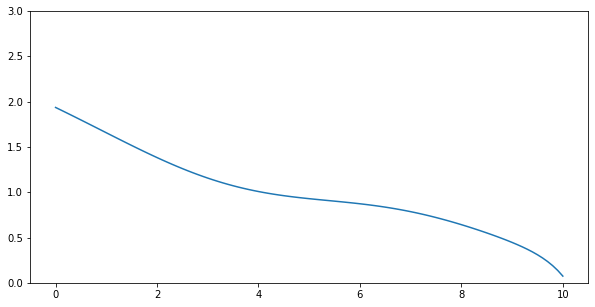

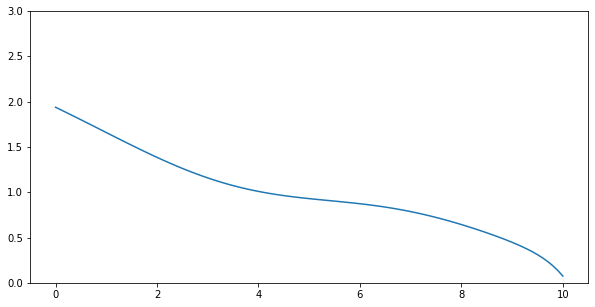

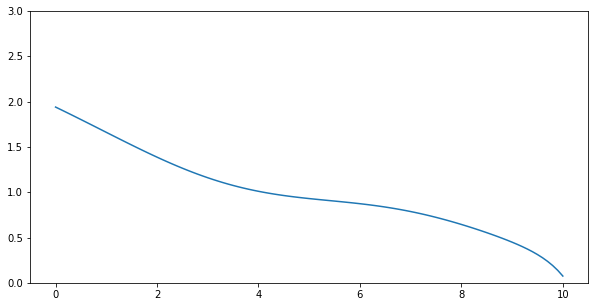

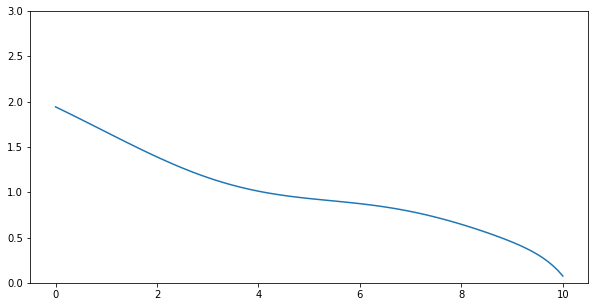

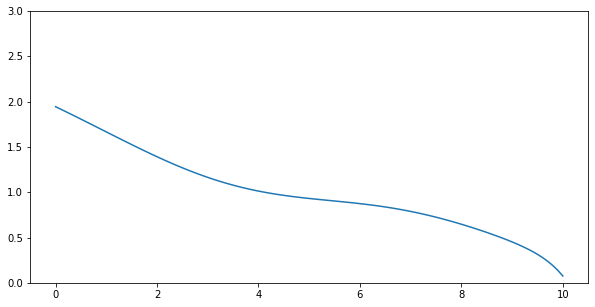

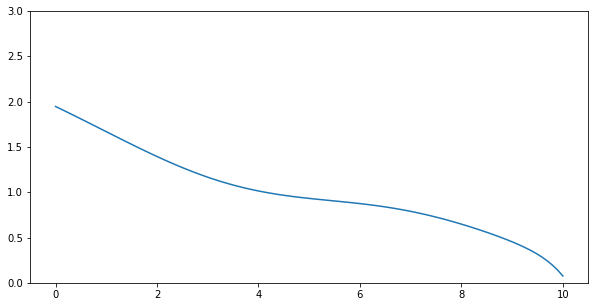

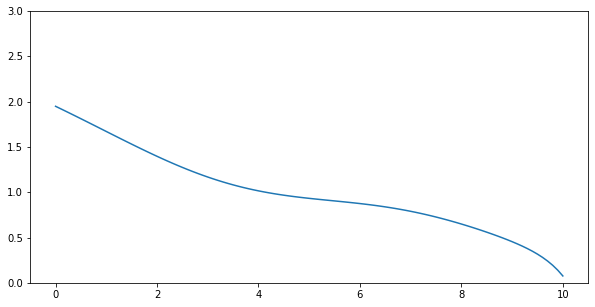

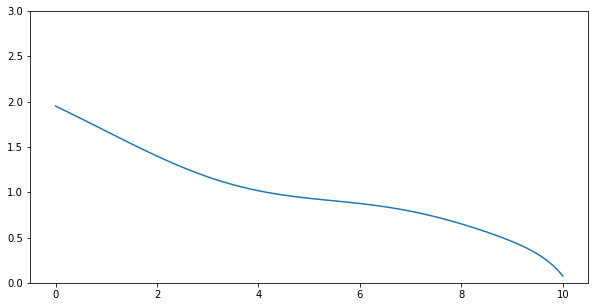

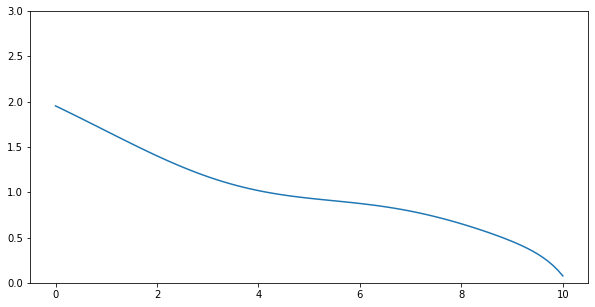

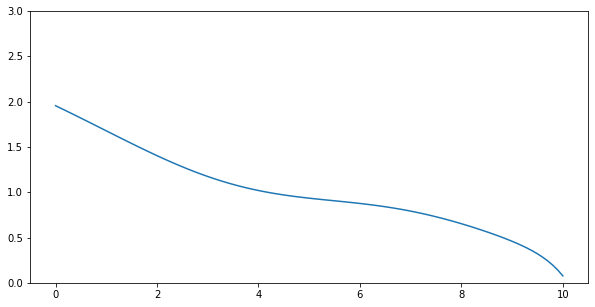

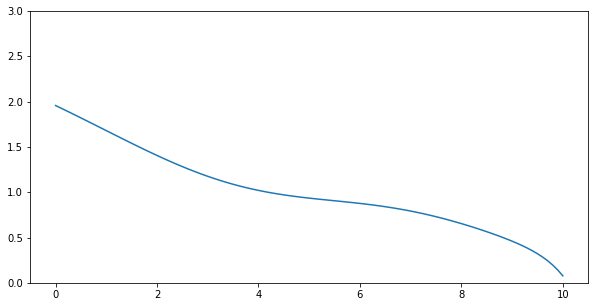

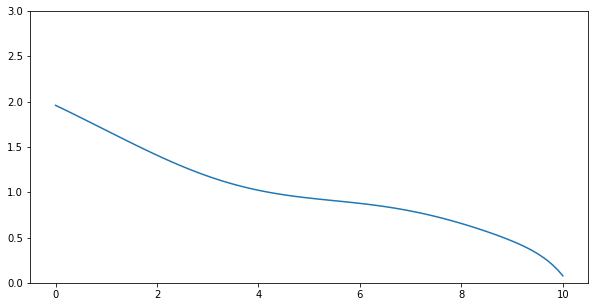

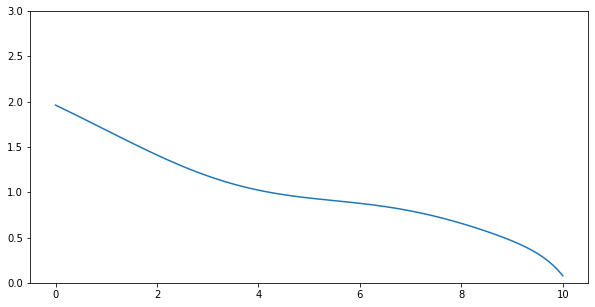

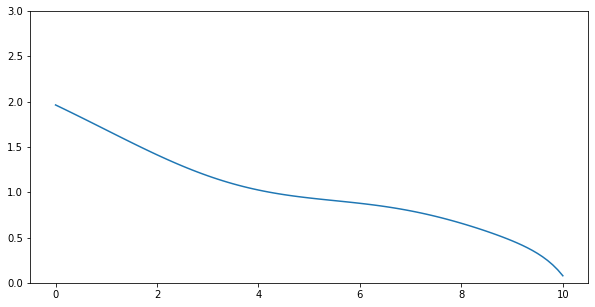

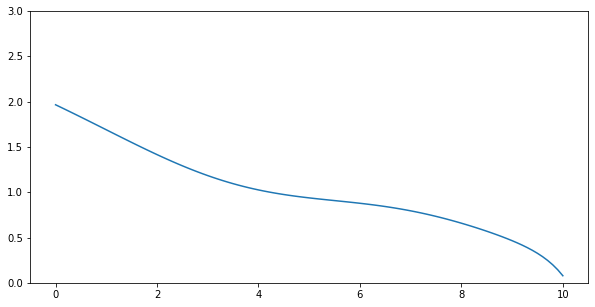

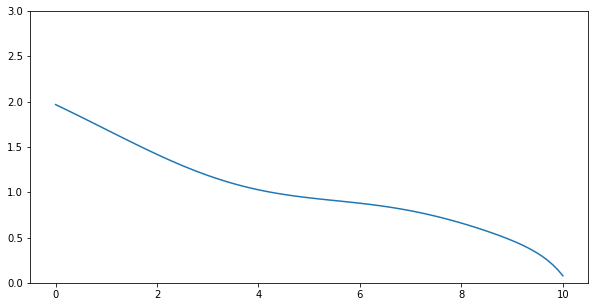

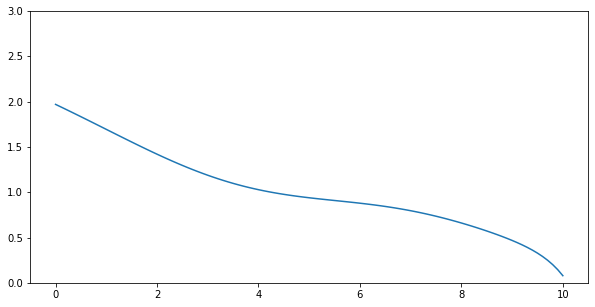

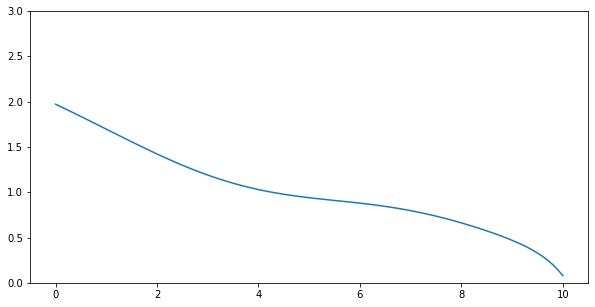

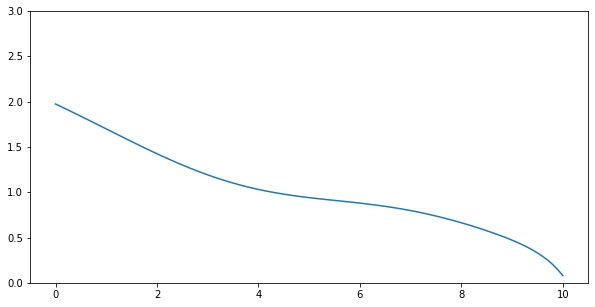

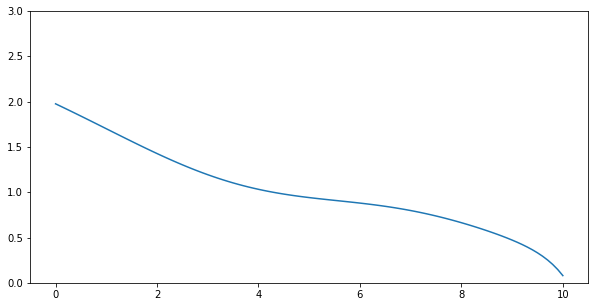

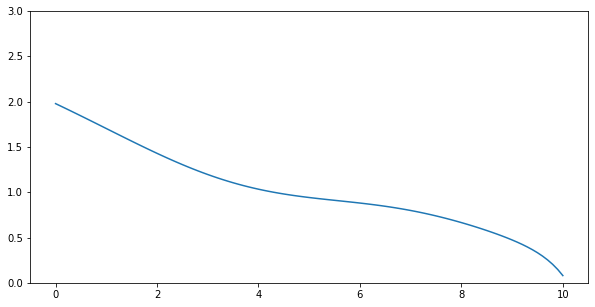

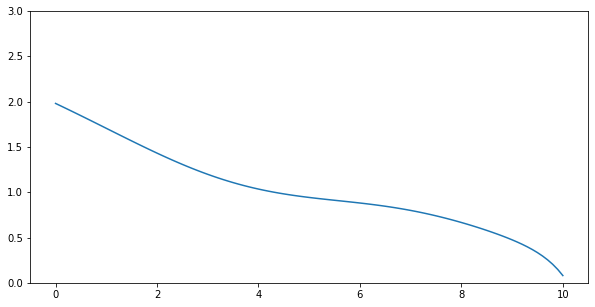

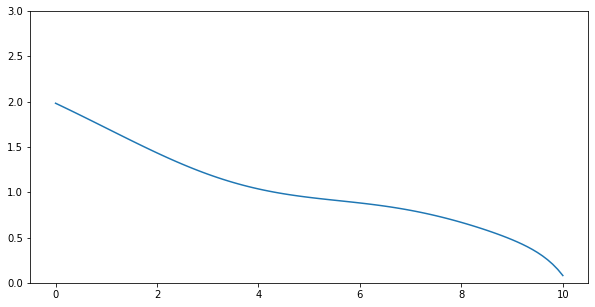

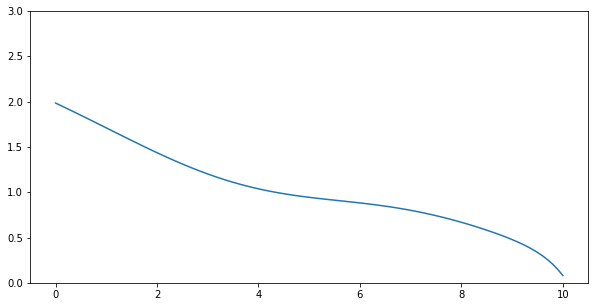

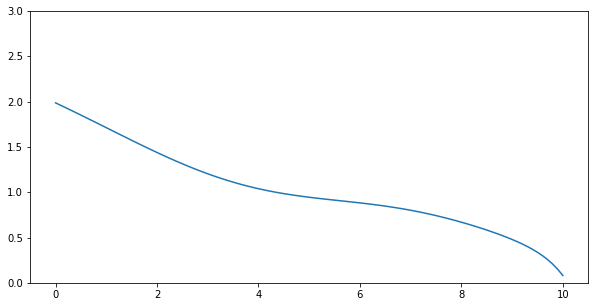

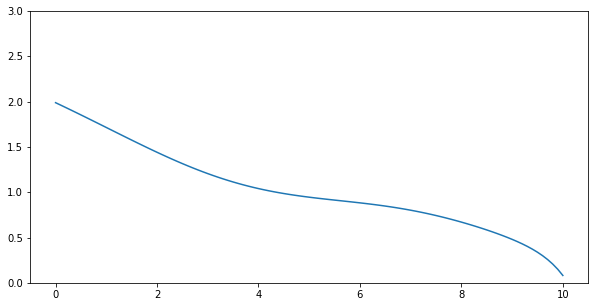

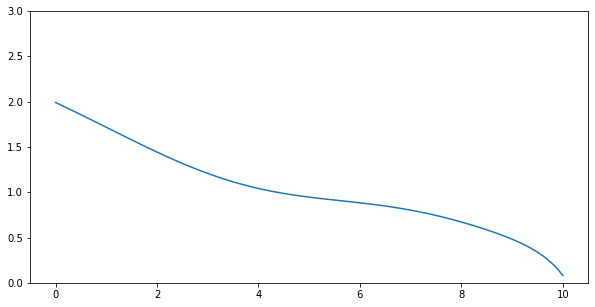

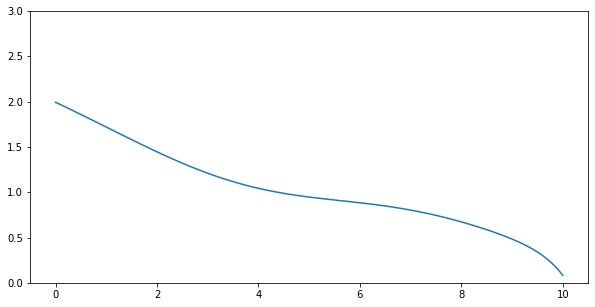

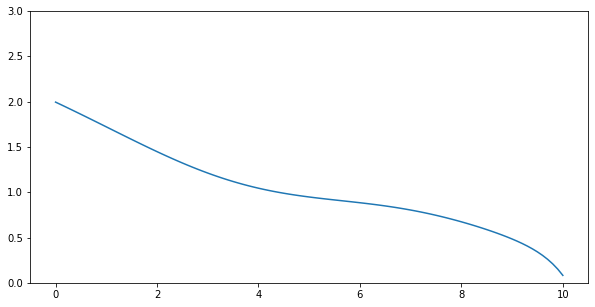

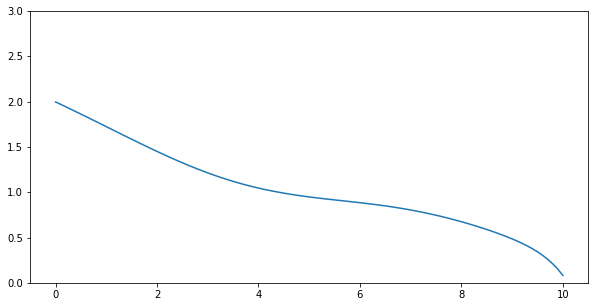

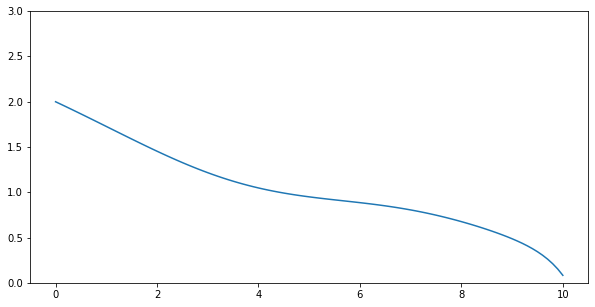

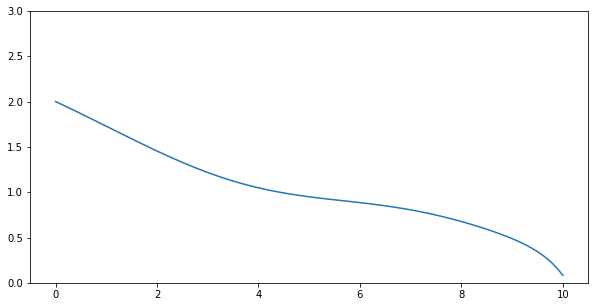

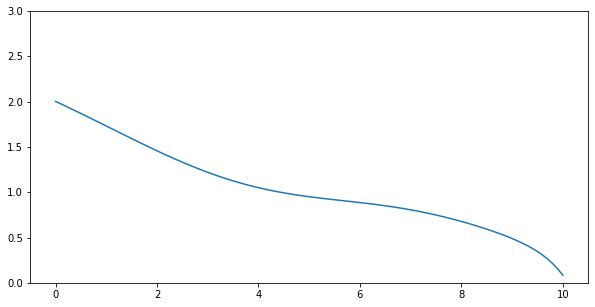

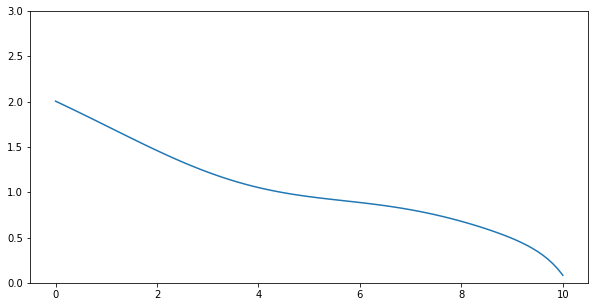

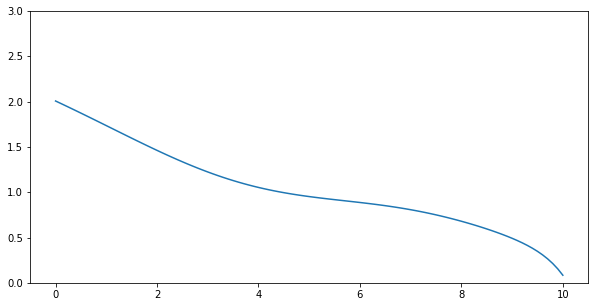

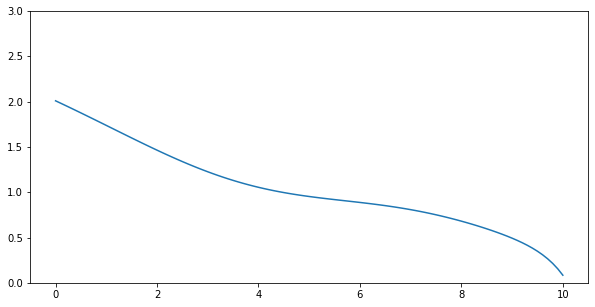

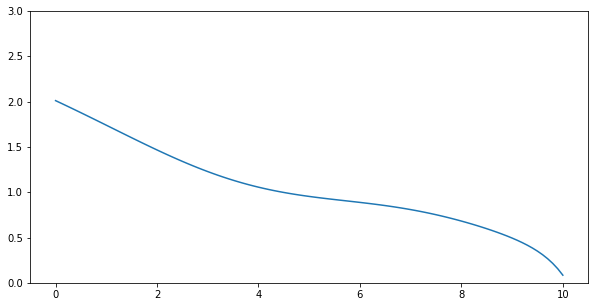

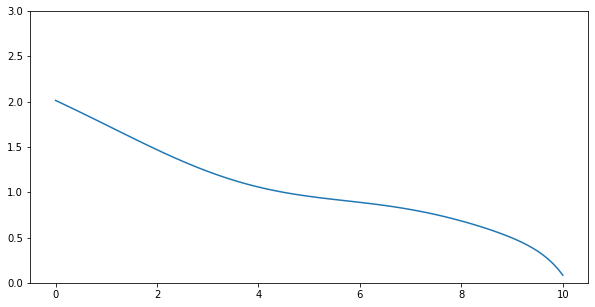

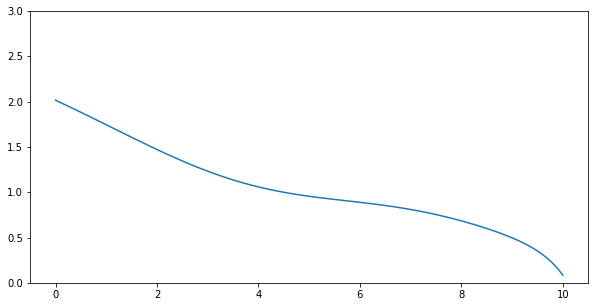

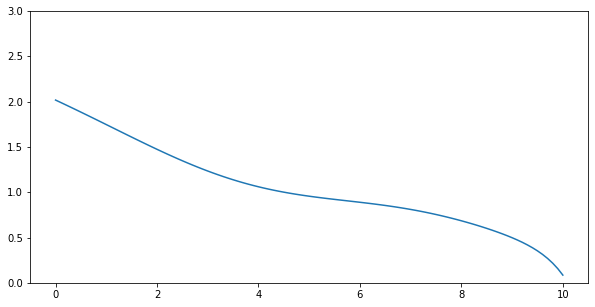

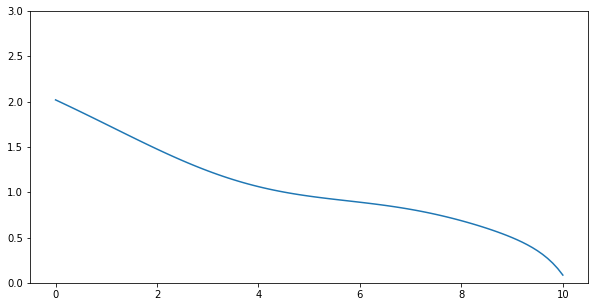

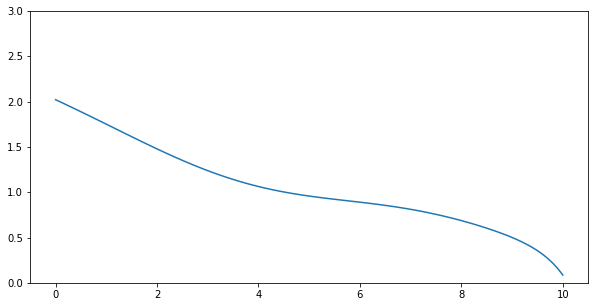

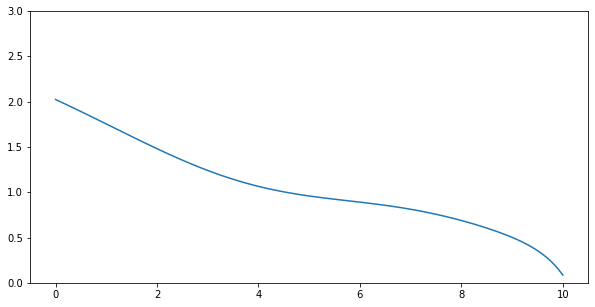

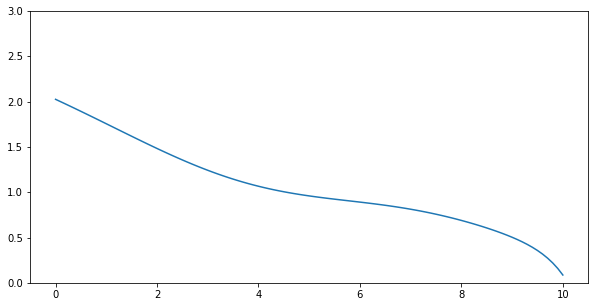

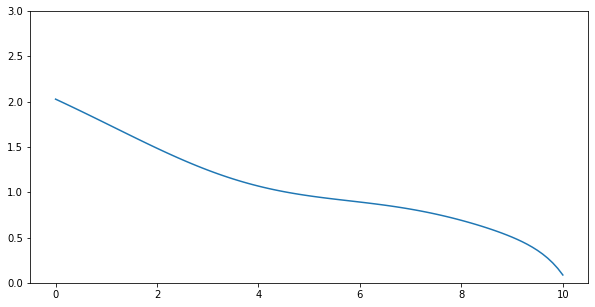

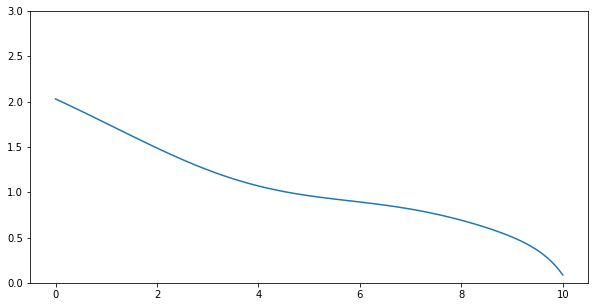

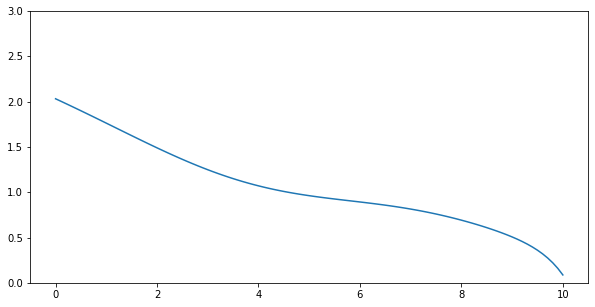

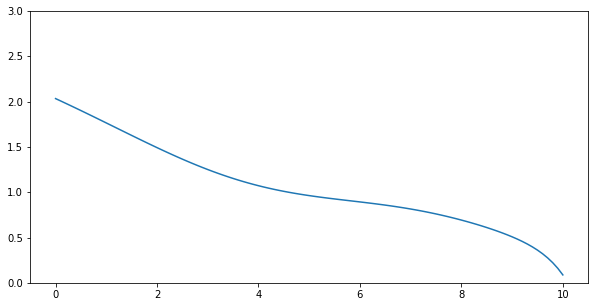

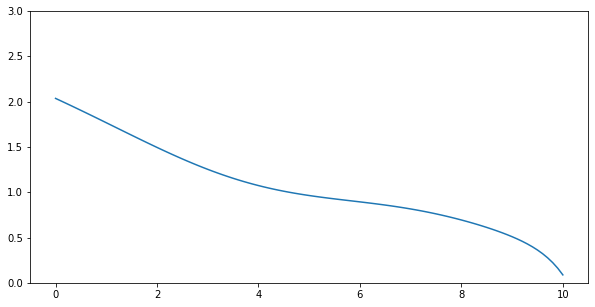

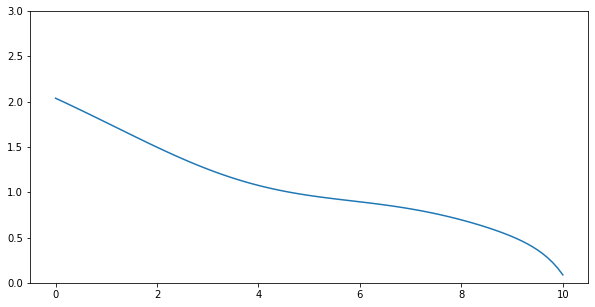

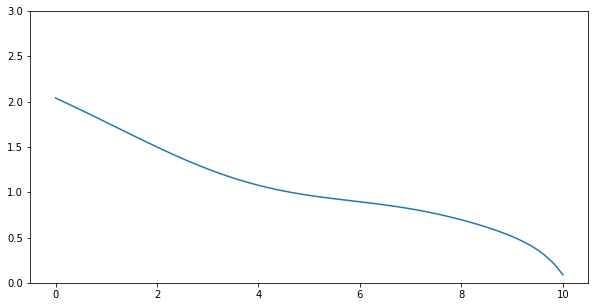

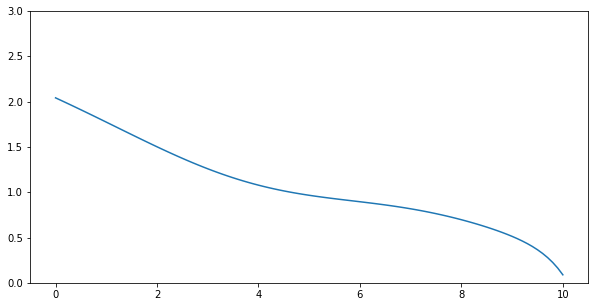

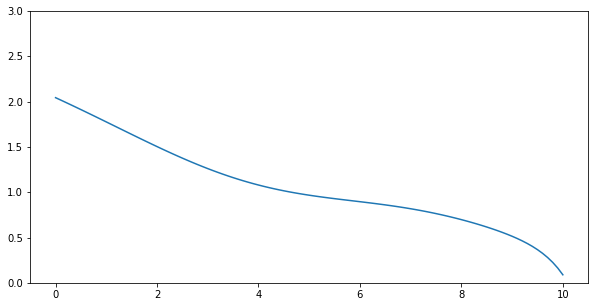

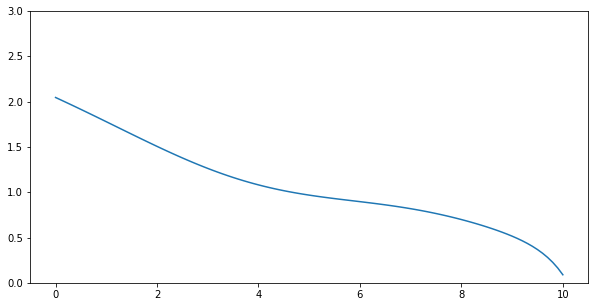

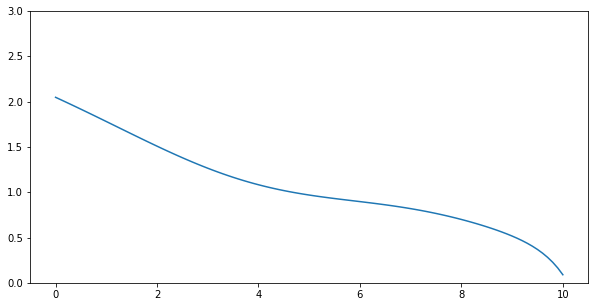

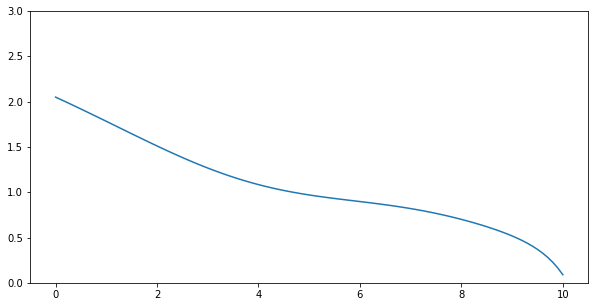

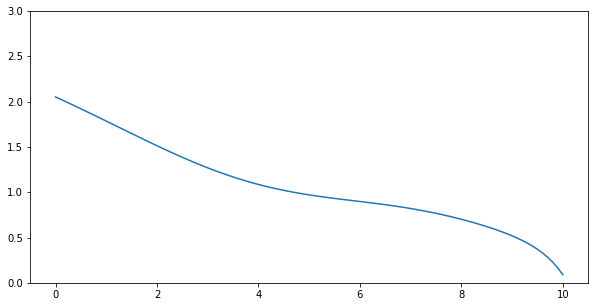

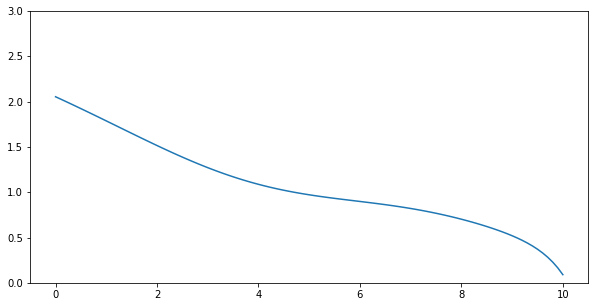

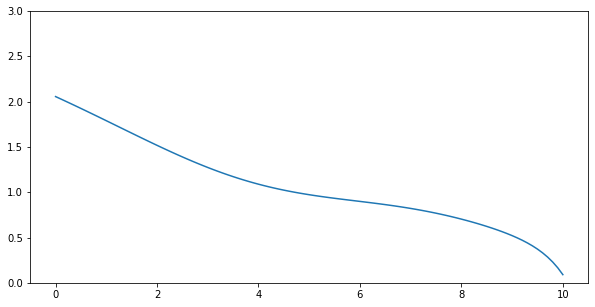

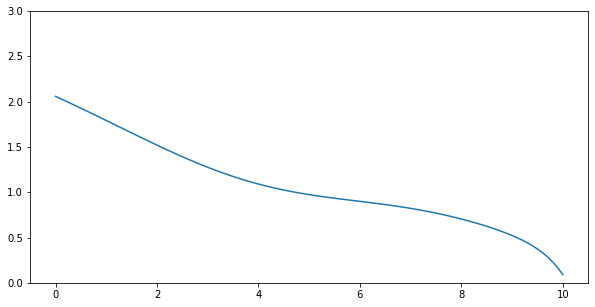

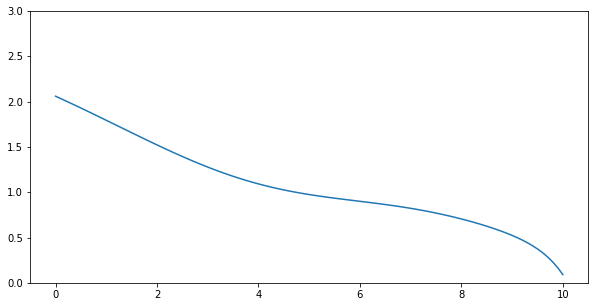

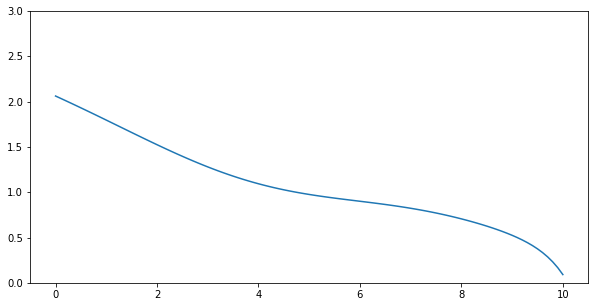

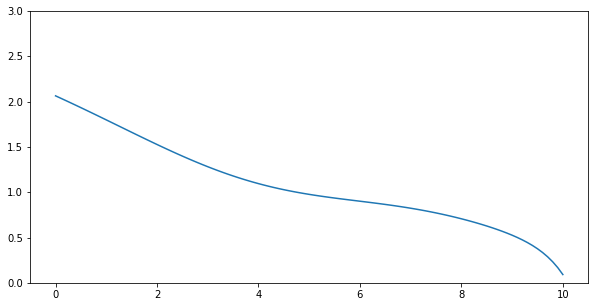

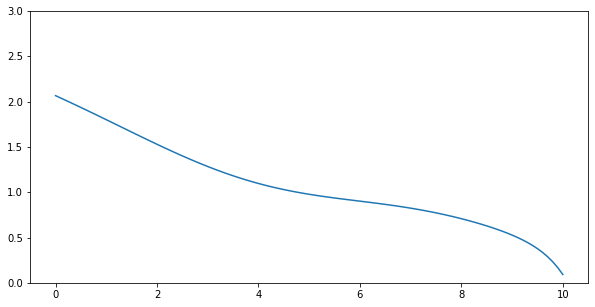

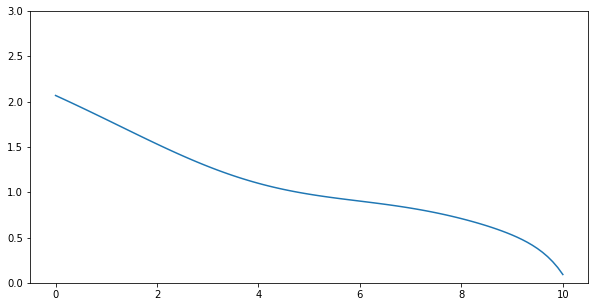

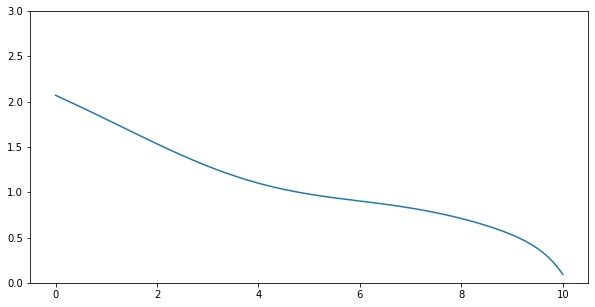

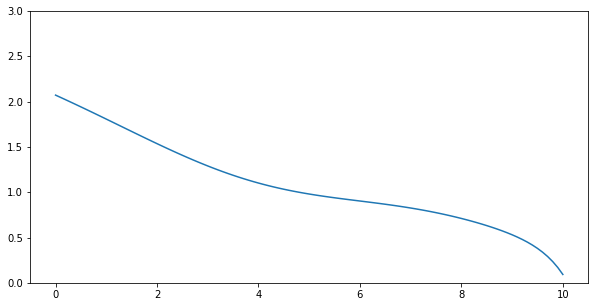

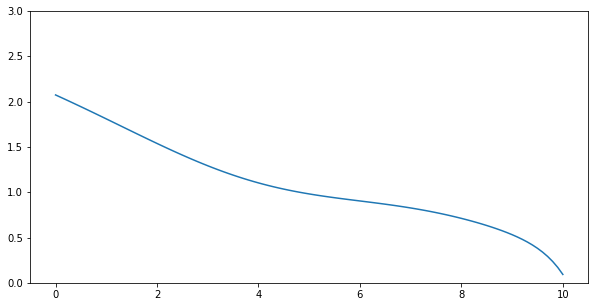

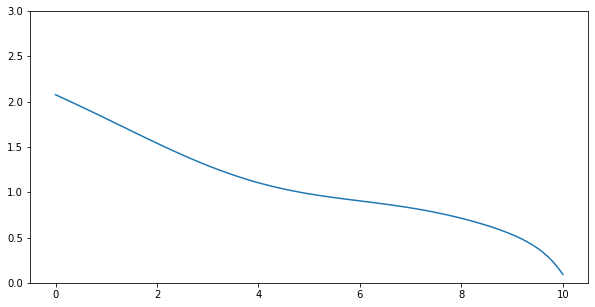

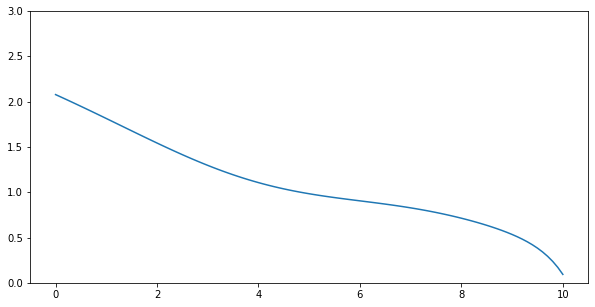

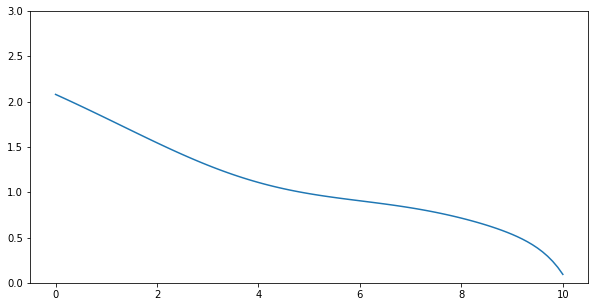

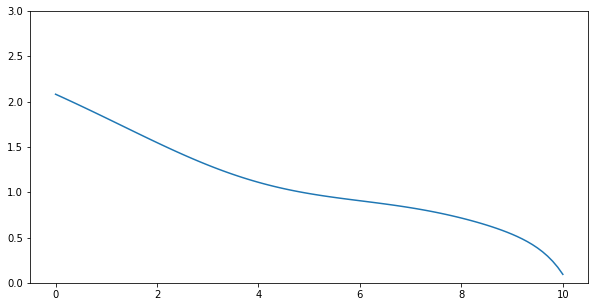

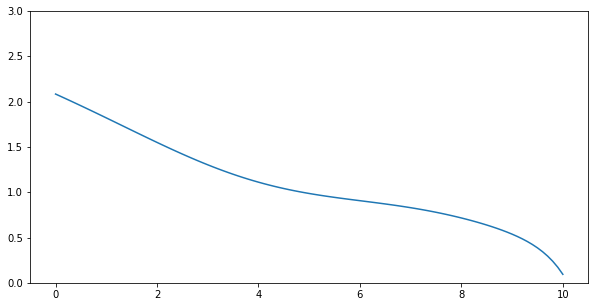

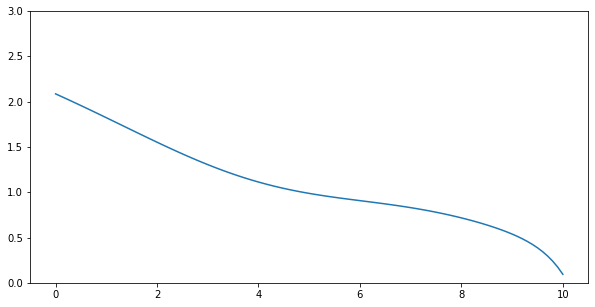

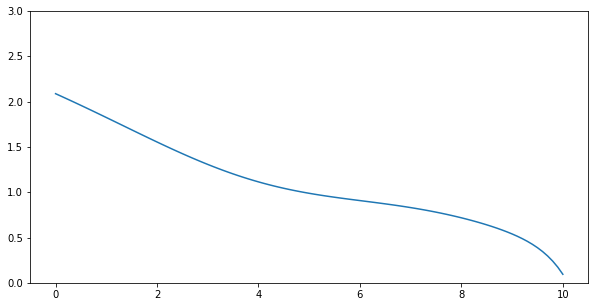

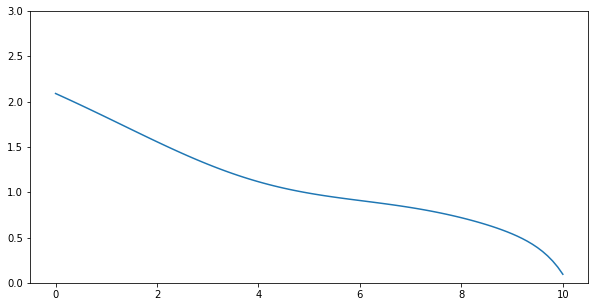

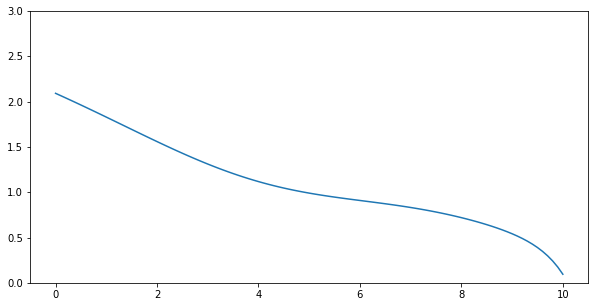

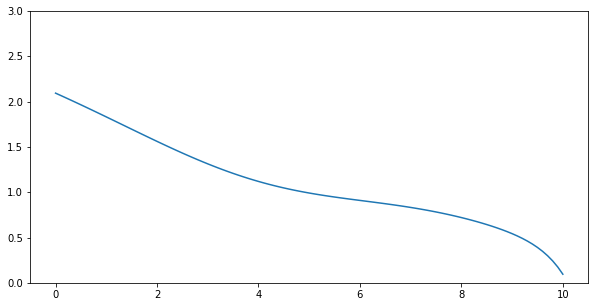

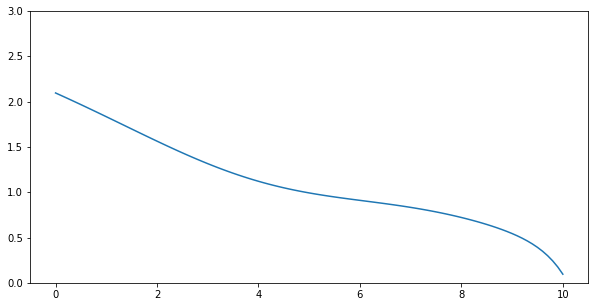

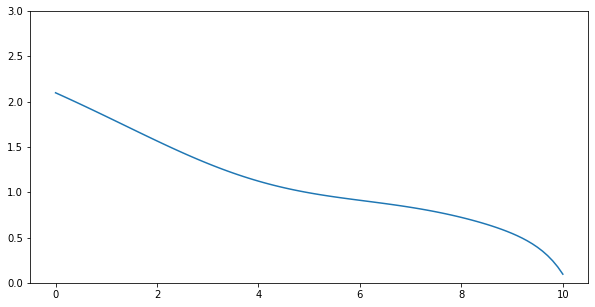

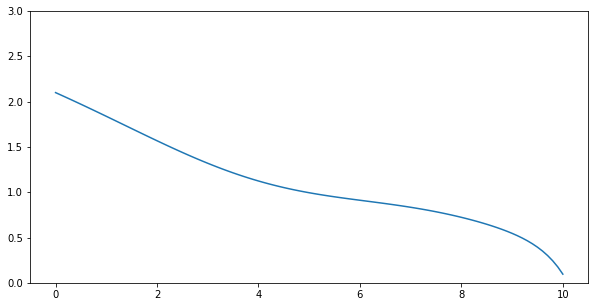

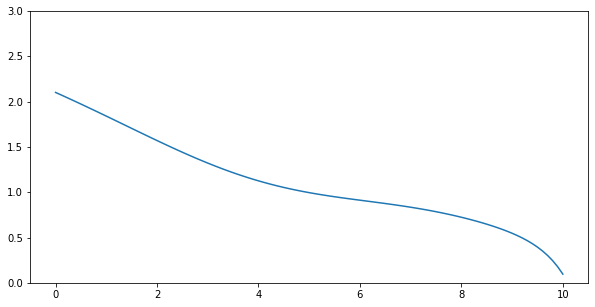

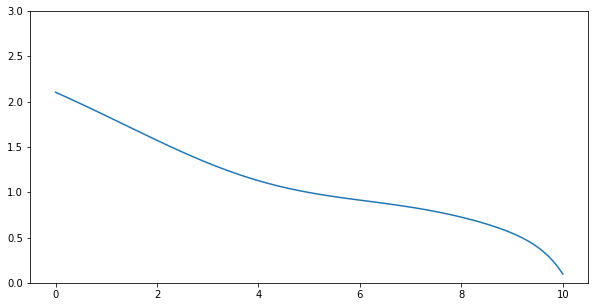

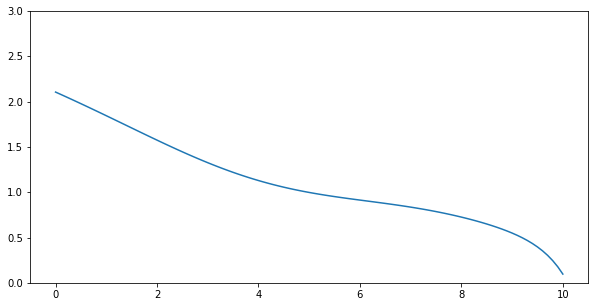

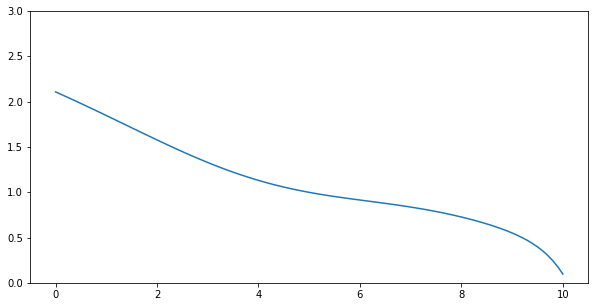

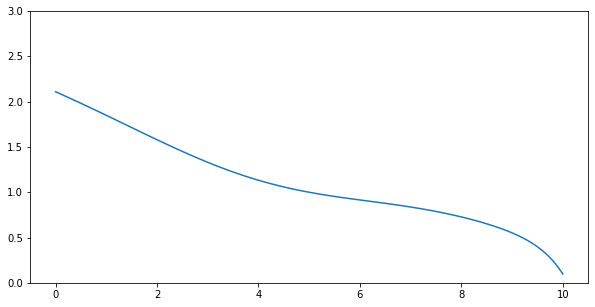

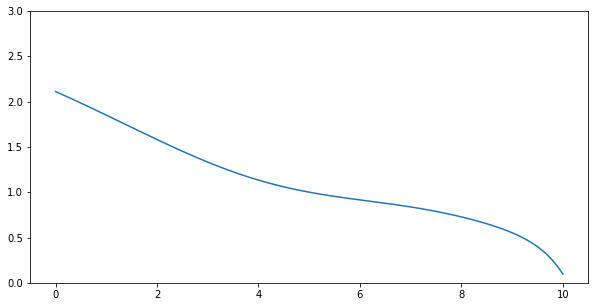

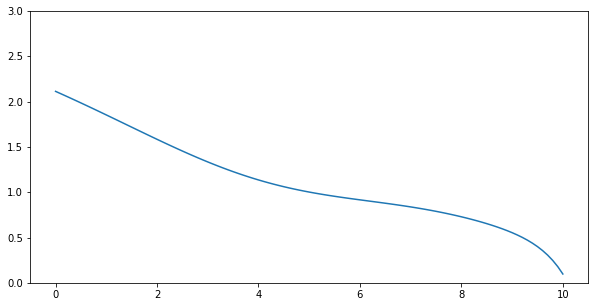

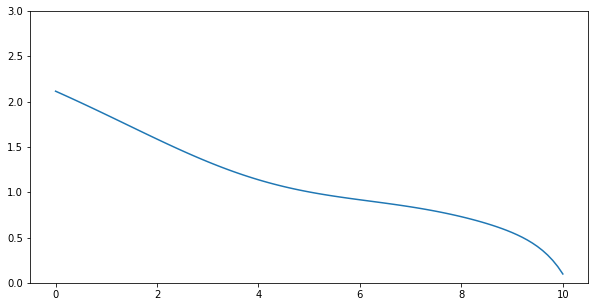

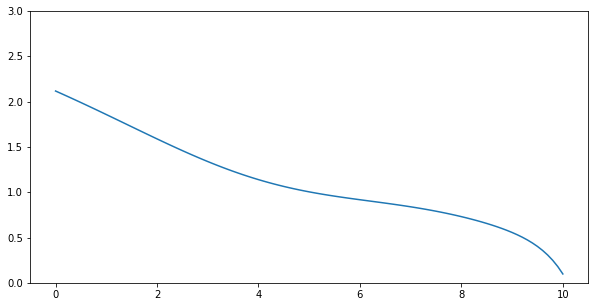

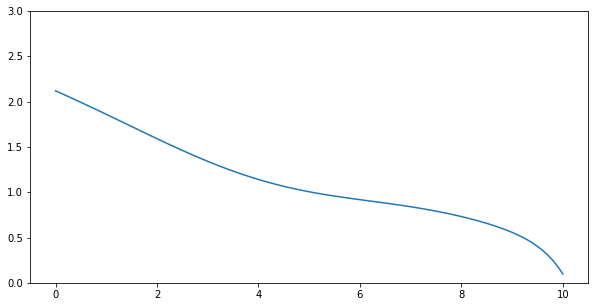

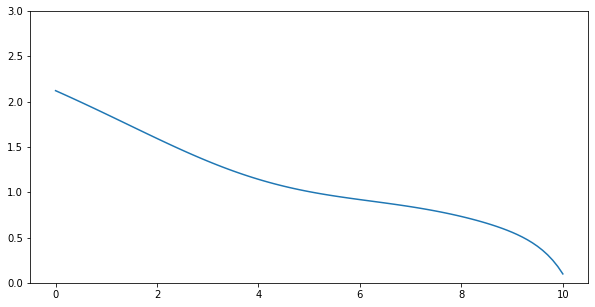

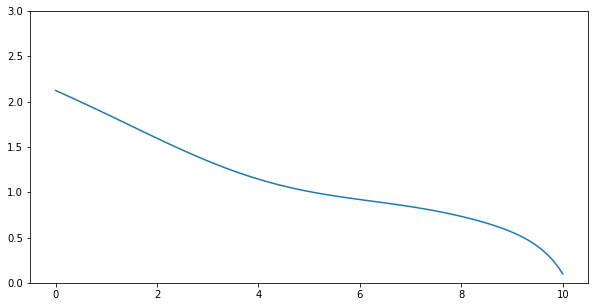

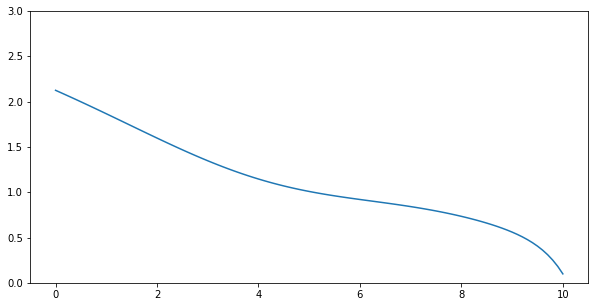

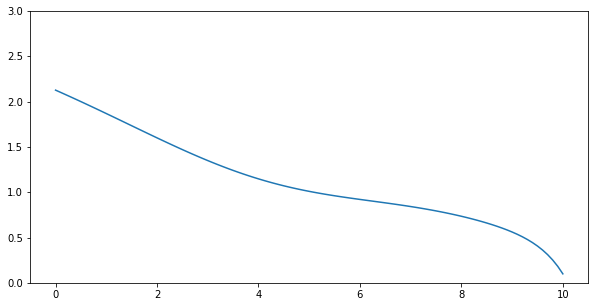

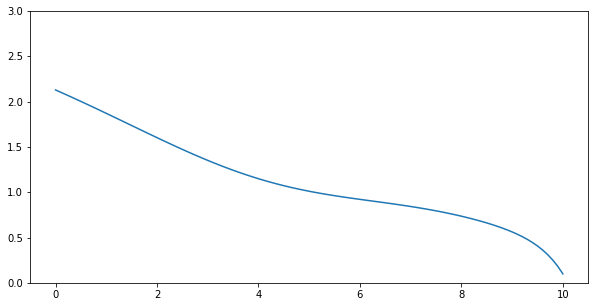

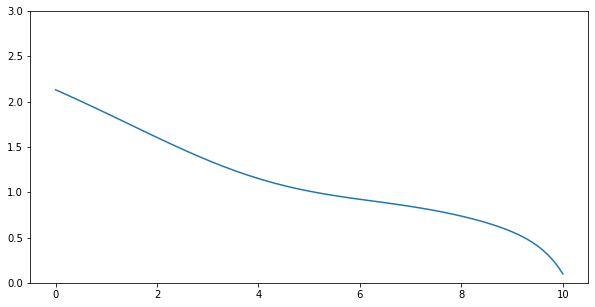

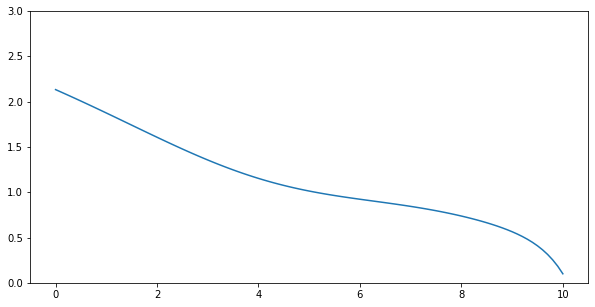

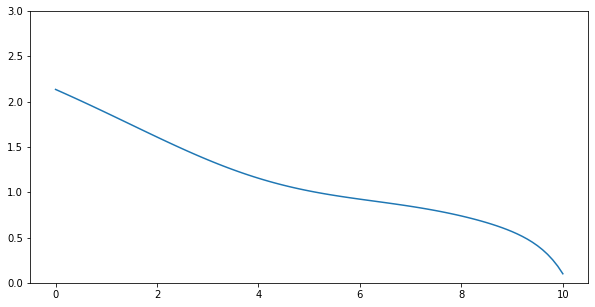

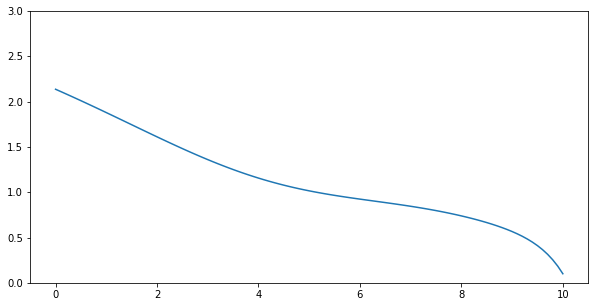

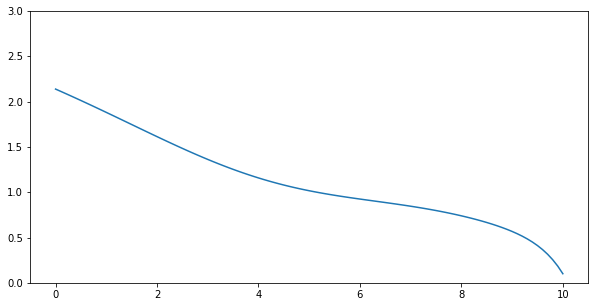

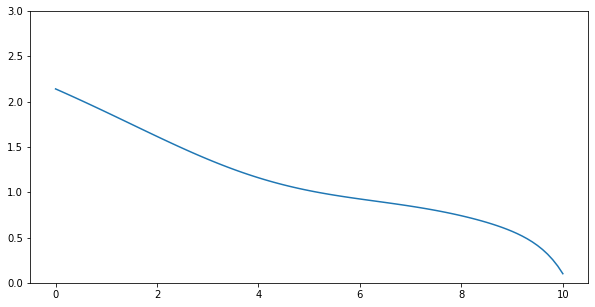

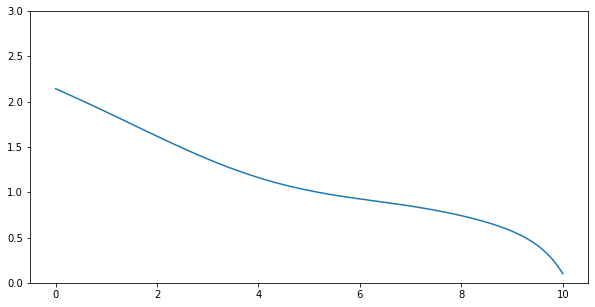

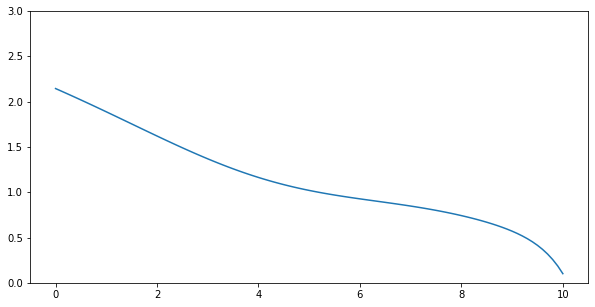

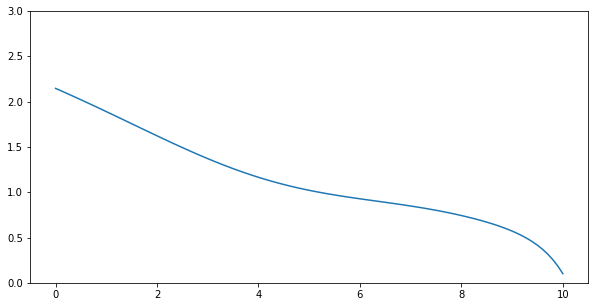

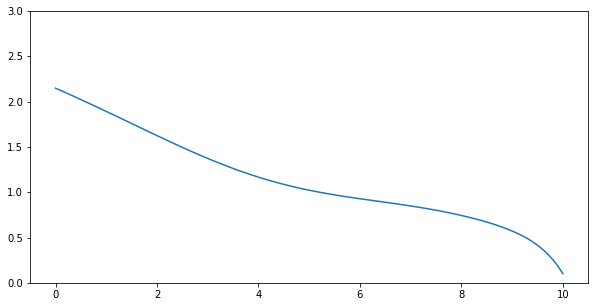

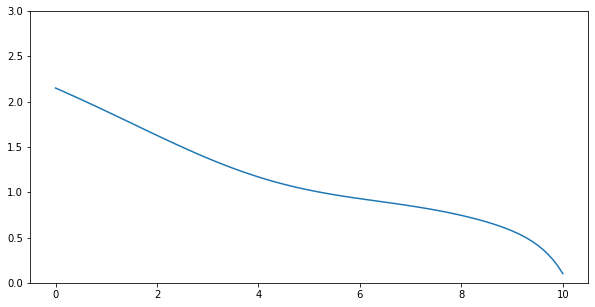

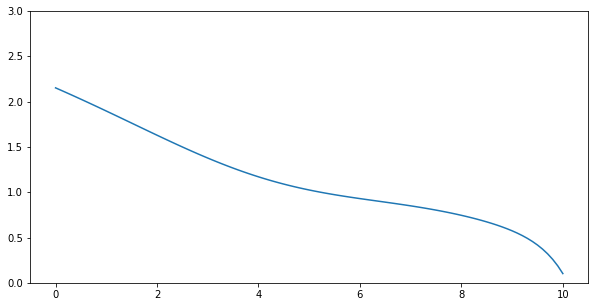

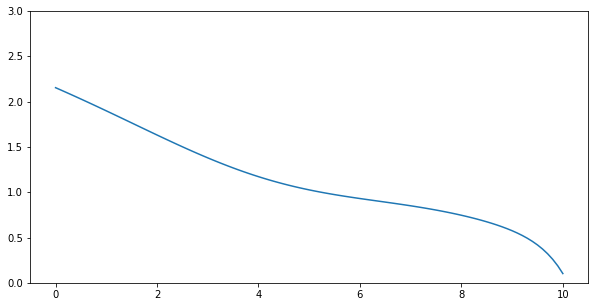

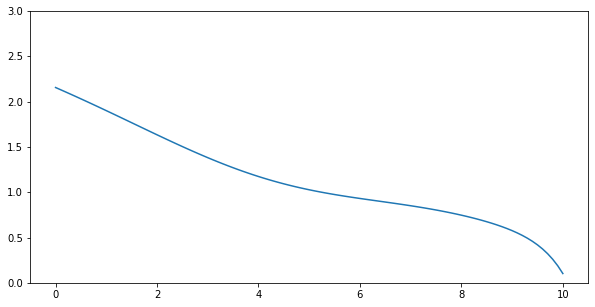

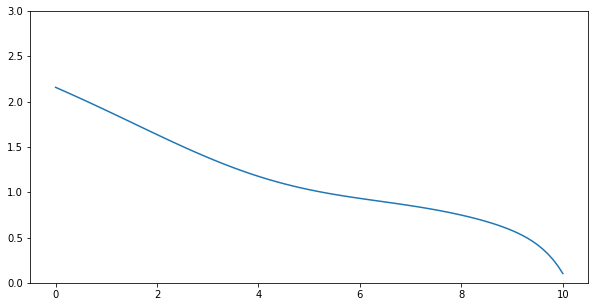

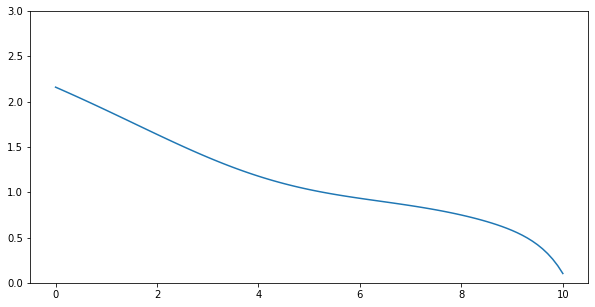

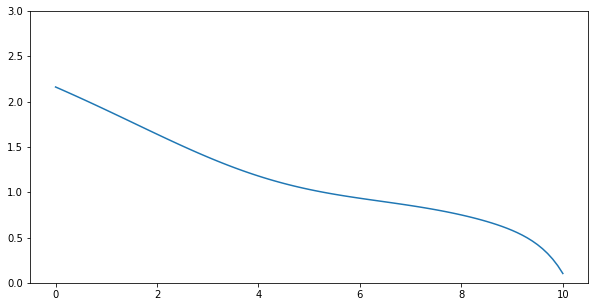

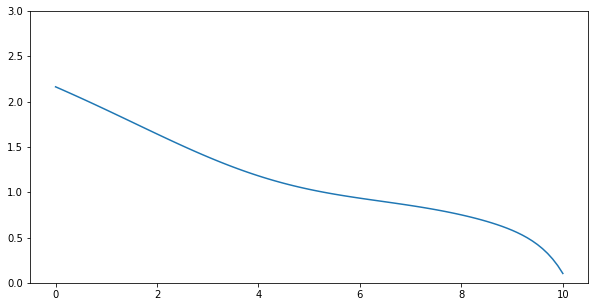

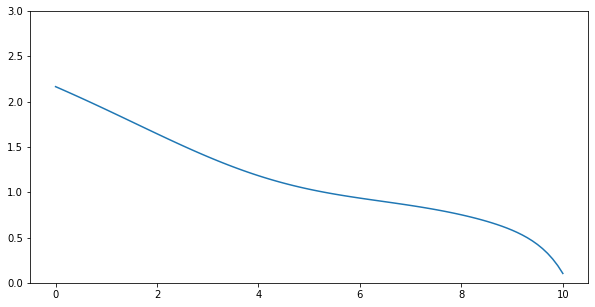

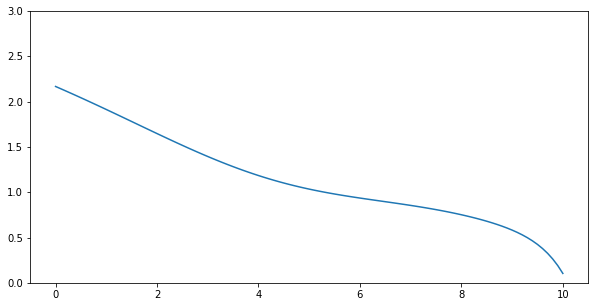

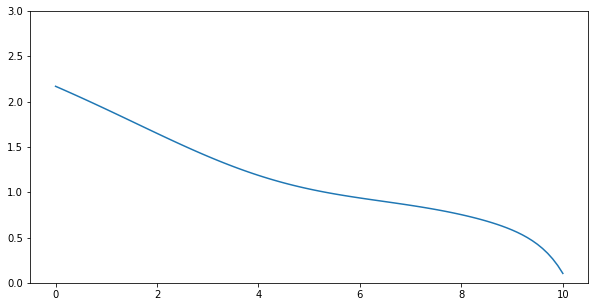

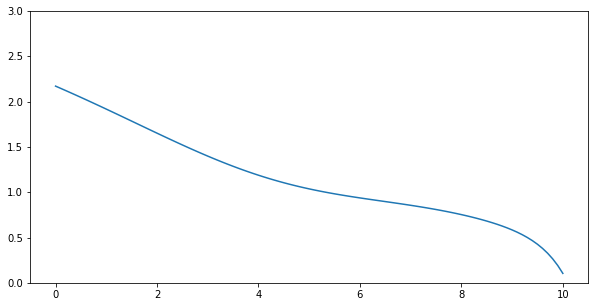

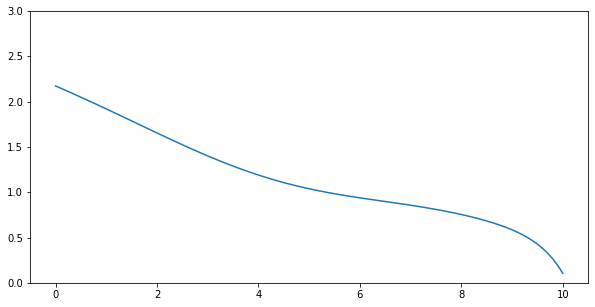

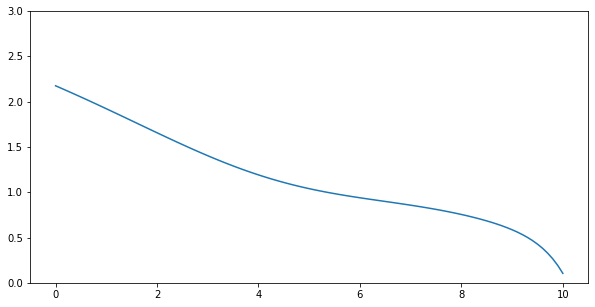

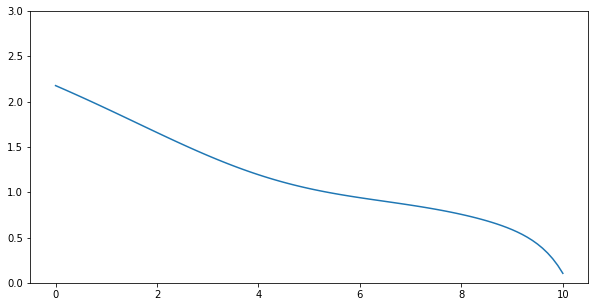

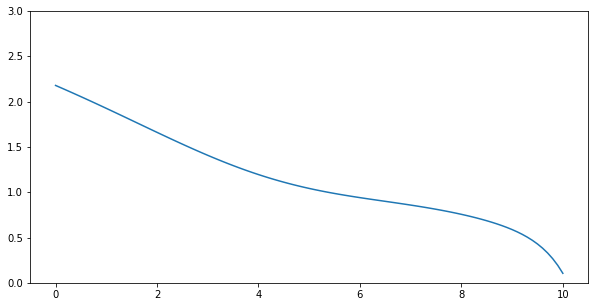

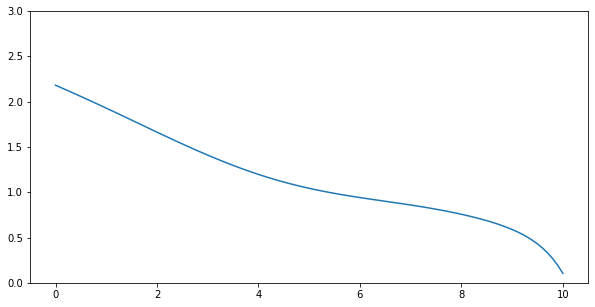

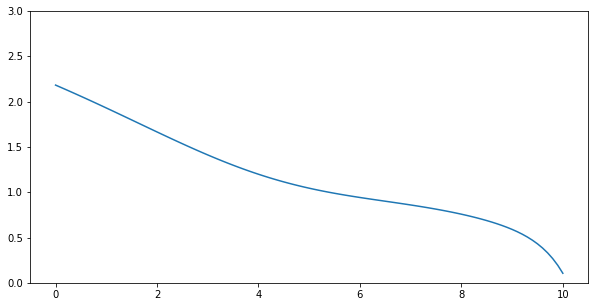

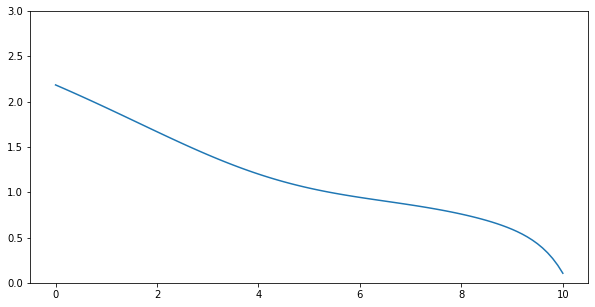

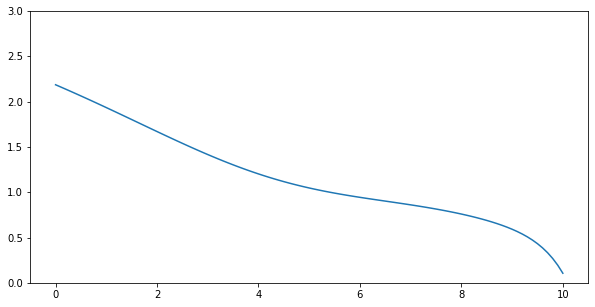

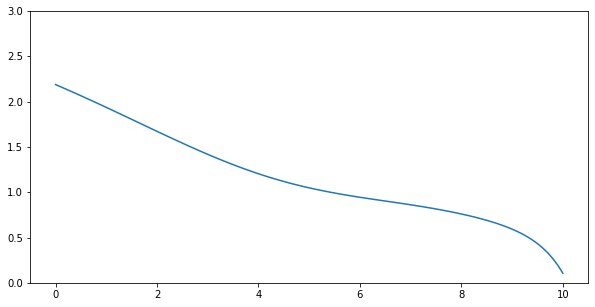

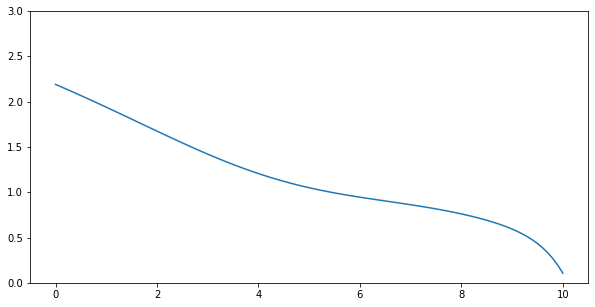

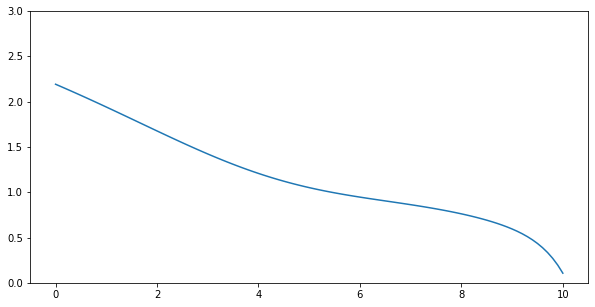

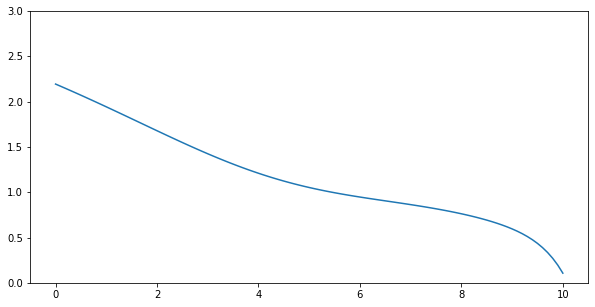

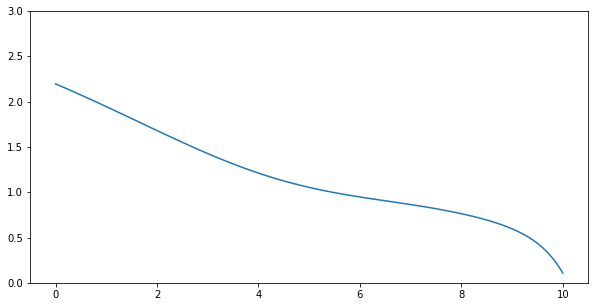

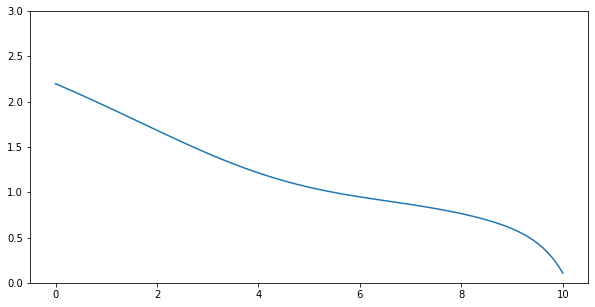

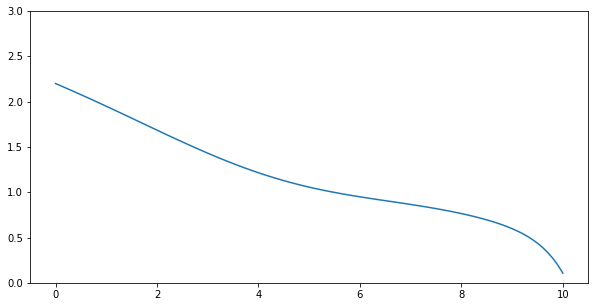

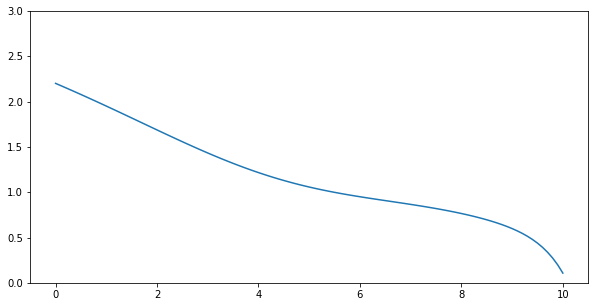

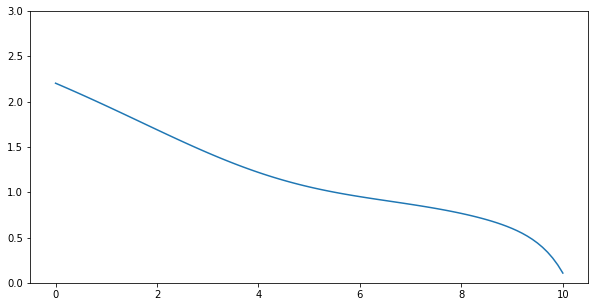

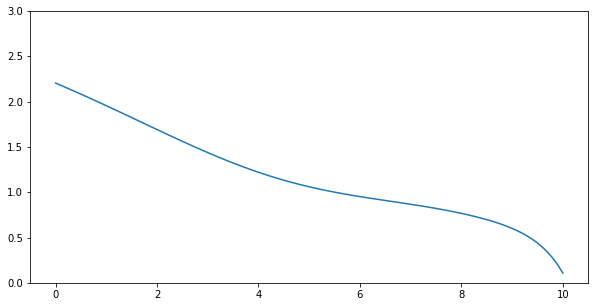

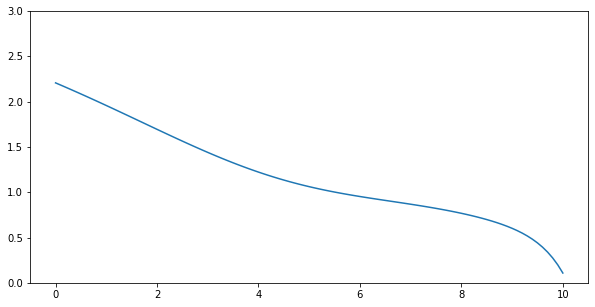

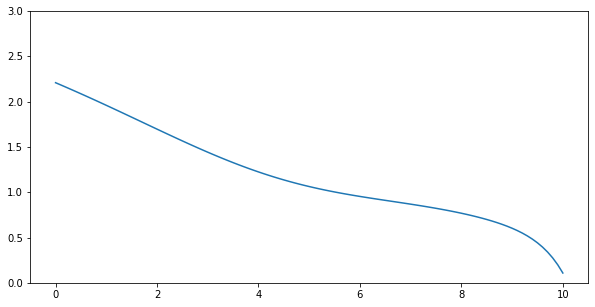

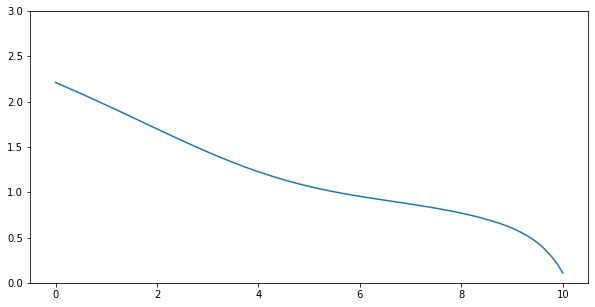

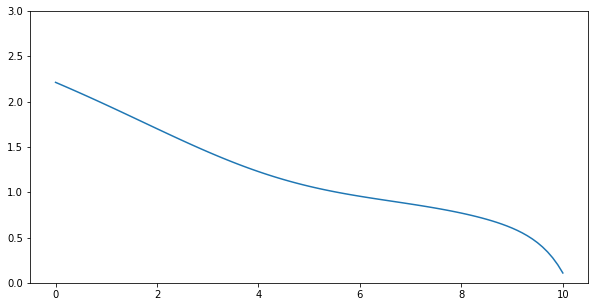

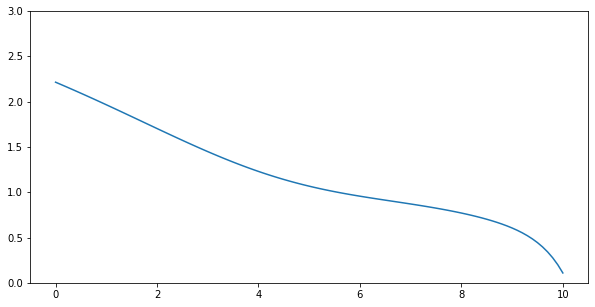

In [8]:
def plot_img(cur_index):
    xs = [
        a + i * dx
        for i in range(K)
    ]
    

    fig, ax = plt.subplots(figsize=(10,5))
    ax.plot(xs, Ts[cur_index])

    ax.set_ylim(0, 3.)

    fig.canvas.draw()
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

    return image

kwargs_write = {'fps': 24.0, 'quantizer':'nq'}
frames = [plot_img(i) for i in tqdm_notebook(range(len(Ts)))]
imageio.mimsave('./T.gif', frames, fps=24)